# **Optimizing Customer Retention: Churn Prediction Using Machine Learning**
---



Welcome to my Churn Prediction project! This repository showcases my work on building a predictive machine learning model to identify customers at risk of churning. The goal of this project is to help businesses optimize customer retention by predicting whether a customer will churn based on various features such as tenure, age, contract type, charges, city, and customer demographics.

The project involves a comprehensive exploratory data analysis (EDA) to understand the dataset, followed by data preprocessing, feature engineering, and the development of a machine learning model. The model is trained on a dataset containing customer information and is designed to predict churn with high accuracy. The project also includes hyperparameter tuning using GridSearchCV to optimize model performance.

This repository contains the Jupyter notebook with the complete code, along with explanations of each step in the process. 

### **Objective**
##### Predict whether a customer will churn or not based on various features (e.g., tenure, age, contract, charges, city, customer demographics).

### **Importing necessary libraries & dataset**

In [ ]:
# Importing the necessary libraries

import pandas as pd
import numpy as np

from IPython import display
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import r2_score

In [ ]:
# Display all columns
pd.set_option('display.max_columns', None)

In [ ]:
!pip install huggingface_hub

In [ ]:
splits = {'train': 'train.csv', 'validation': 'validation.csv', 'test': 'test.csv'}
data = "hf://datasets/aai510-group1/telco-customer-churn/"

In [ ]:
# Load each dataset separately
df_train = pd.read_csv(data + splits["train"])
df_validation = pd.read_csv(data + splits["validation"])
df_test = pd.read_csv(data + splits["test"])

data = pd.concat([df_train, df_test, df_validation], ignore_index=True)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [ ]:
print(data.shape)
data.head()

(7043, 52)


Age  Avg Monthly GB Download  Avg Monthly Long Distance Charges  \
0   72                        4                              19.44   
1   27                       59                              45.62   
2   59                        0                              16.07   
3   25                       27                               0.00   
4   31                       21                              17.22   

    Churn Category         Churn Reason  Churn Score          City  CLTV  \
0              NaN                  NaN           51     San Mateo  4849   
1              NaN                  NaN           27  Sutter Creek  3715   
2              NaN                  NaN           59    Santa Cruz  5092   
3              NaN                  NaN           49          Brea  2068   
4  Dissatisfaction  Network reliability           88      San Jose  4026   

         Contract        Country Customer ID Customer Status  Dependents  \
0        Two Year  United States  4526-ZJJTM          Stayed           0   
1  Month-to-Month  United States  5302-BDJNT          Stayed           0   
2  Month-to-Month  United States  5468-BPMMO          Stayed           0   
3        One Year  United States  2212-LYASK          Stayed           0   
4        One Year  United States  0378-XSZPU         Churned           0   

   Device Protection Plan  Gender  Internet Service Internet Type  \
0                       1  Female                 1   Fiber Optic   
1                       1    Male                 1   Fiber Optic   
2                       0    Male                 0           NaN   
3                       1    Male                 1           DSL   
4                       1    Male                 1         Cable   

                 Lat Long   Latitude   Longitude  Married  Monthly Charge  \
0  37.538309, -122.305109  37.538309 -122.305109        1           88.40   
1   38.432145, -120.77069  38.432145 -120.770690        0           95.50   
2  37.007882, -122.065975  37.007882 -122.065975        1           19.60   
3   33.924143, -117.79387  33.924143 -117.793870        1           45.85   
4  37.311088, -121.961786  37.311088 -121.961786        1           60.30   

   Multiple Lines  Number of Dependents  Number of Referrals    Offer  \
0               0                     0                    1      NaN   
1               1                     0                    0      NaN   
2               0                     0                    3      NaN   
3               0                     0                    3      NaN   
4               0                     0                    1  Offer B   

   Online Backup  Online Security  Paperless Billing  Partner  \
0              1                0                  0        1   
1              0                0                  0        0   
2              0                0                  0        1   
3              1                0                  1        1   
4              1                1                  0        1   

    Payment Method  Phone Service  Population  Premium Tech Support Quarter  \
0  Bank Withdrawal              1       37926                     0      Q3   
1  Bank Withdrawal              1        4610                     1      Q3   
2  Bank Withdrawal              1        4563                     0      Q3   
3      Credit Card              0        1408                     0      Q3   
4      Credit Card              1       29914                     0      Q3   

   Referred a Friend  Satisfaction Score  Senior Citizen       State  \
0                  1                   3               1  California   
1                  0                   3               0  California   
2                  1                   5               0  California   
3                  1                   4               0  California   
4                  1                   2               0  California   

   Streaming Movies  Streaming Music  Streaming TV  

## **Exploratory Data Analysis**

##### **1. Descriptive Statistics**

In [ ]:
# Summary of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 52 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                7043 non-null   int64  
 1   Avg Monthly GB Download            7043 non-null   int64  
 2   Avg Monthly Long Distance Charges  7043 non-null   float64
 3   Churn Category                     1869 non-null   object 
 4   Churn Reason                       1869 non-null   object 
 5   Churn Score                        7043 non-null   int64  
 6   City                               7043 non-null   object 
 7   CLTV                               7043 non-null   int64  
 8   Contract                           7043 non-null   object 
 9   Country                            7043 non-null   object 
 10  Customer ID                        7043 non-null   object 
 11  Customer Status                    7043 non-null   objec

In [ ]:
data.describe().transpose()

count          mean           std  \
Age                                7043.0     46.509726     16.750352   
Avg Monthly GB Download            7043.0     20.515405     20.418940   
Avg Monthly Long Distance Charges  7043.0     22.958954     15.448113   
Churn Score                        7043.0     58.505040     21.170031   
CLTV                               7043.0   4400.295755   1183.057152   
Dependents                         7043.0      0.231010      0.421508   
Device Protection Plan             7043.0      0.343888      0.475038   
Internet Service                   7043.0      0.783331      0.412004   
Latitude                           7043.0     36.197455      2.468929   
Longitude                          7043.0   -119.756684      2.154425   
Married                            7043.0      0.483033      0.499748   
Monthly Charge                     7043.0     64.761692     30.090047   
Multiple Lines                     7043.0      0.421837      0.493888   
Number of Dependents               7043.0      0.468692      0.962802   
Number of Referrals                7043.0      1.951867      3.001199   
Online Backup                      7043.0      0.344881      0.475363   
Online Security                    7043.0      0.286668      0.452237   
Paperless Billing                  7043.0      0.592219      0.491457   
Partner                            7043.0      0.483033      0.499748   
Phone Service                      7043.0      0.903166      0.295752   
Population                         7043.0  22139.603294  21152.392837   
Premium Tech Support               7043.0      0.290217      0.453895   
Referred a Friend                  7043.0      0.457476      0.498224   
Satisfaction Score                 7043.0      3.244924      1.201657   
Senior Citizen                     7043.0      0.162147      0.368612   
Streaming Movies                   7043.0      0.387903      0.487307   
Streaming Music                    7043.0      0.353259      0.478016   
Streaming TV                       7043.0      0.384353      0.486477   
Tenure in Months                   7043.0     32.386767     24.542061   
Total Charges                      7043.0   2280.381264   2266.220462   
Total Extra Data Charges           7043.0      6.860713     25.104978   
Total Long Distance Charges        7043.0    749.099262    846.660055   
Total Refunds                      7043.0      1.962182      7.902614   
Total Revenue                      7043.0   3034.379056   2865.204542   
Under 30                           7043.0      0.198921      0.399217   
Unlimited Data                     7043.0      0.673719      0.468885   
Zip Code                           7043.0  93486.070567   1856.767505   
Churn                              7043.0      0.265370      0.441561   

                                            min           25%           50%  \
Age                                   19.000000     32.000000     46.000000   
Avg Monthly GB Download                0.000000      3.000000     17.000000   
Avg Monthly Long Distance Charges      0.000000      9.210000     22.890000   
Churn Score                            5.000000     40.000000     61.000000   
CLTV                                2003.000000   3469.000000   4527.000000   
Dependents                             0.000000      0.000000      0.000000   
Device Protection Plan                 0.000000      0.000000      0.000000   
Internet Service                       0.000000      1.000000      1.000000   
Latitude                              32.555828     33.990646     36.205465   
Longitude                           -124.301372   -121.788090   -119.595293   
Married                                0.000000      0.000000      0.000000   
Monthly Charge                        18.250000     35.500000     70.350000   
Multiple Lines                         0.000000      0.000000      0.000000   
Number of Dependents                   0.000000      0.000000      0.000000   
Num

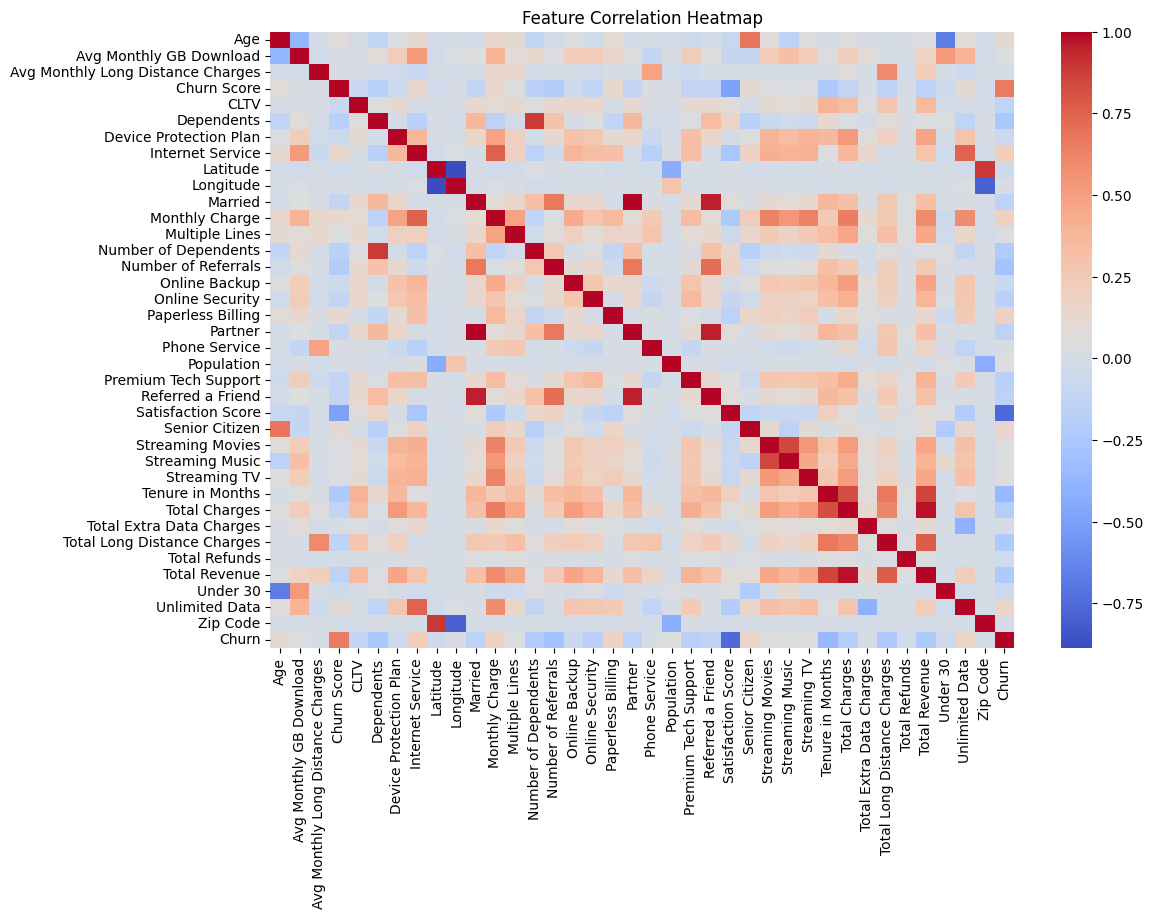

In [ ]:
# Compute correlation matrix for numerical features only
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns
df_corr = data[numerical_features].corr()

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_corr, cmap='coolwarm', annot=False)
plt.title('Feature Correlation Heatmap')
plt.show()

##### **2. Outlier Detection**

###### **2.1 Visualising Outliers**

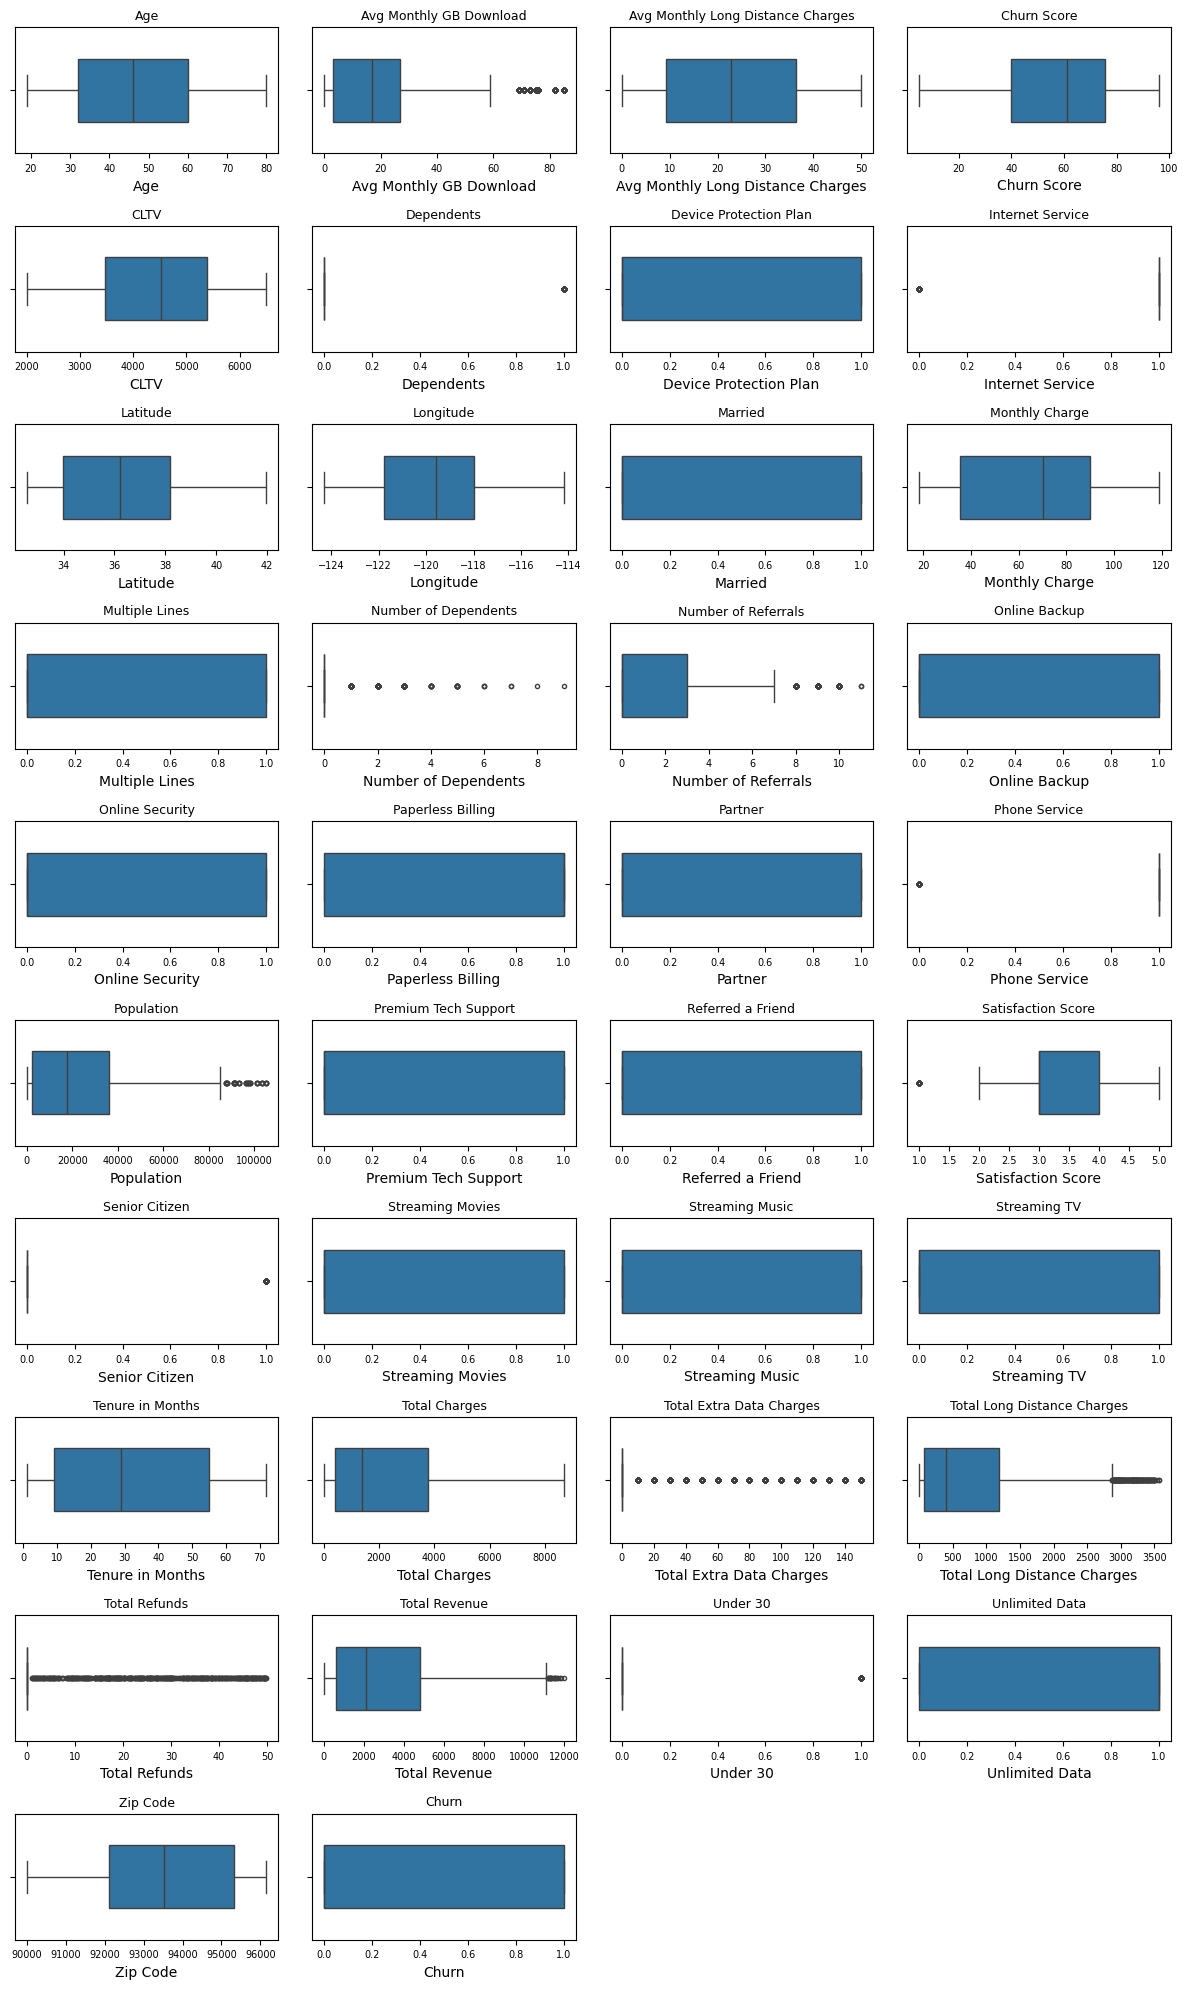

In [ ]:
# Boxplots for outliers
import matplotlib.pyplot as plt
import seaborn as sns

# Identify numerical features
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Compact boxplots for outliers
cols = 4  # Number of columns
rows = -(-len(numerical_features) // cols)
fig, axes = plt.subplots(rows, cols, figsize=(12, 2 * rows))

axes = axes.flatten()

for i, feature in enumerate(numerical_features):
    sns.boxplot(x=data[feature], ax=axes[i], width=0.5, fliersize=3)
    axes[i].set_title(feature, fontsize=9)
    axes[i].tick_params(axis='x', labelsize=7)

# Remove unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

###### **2.2 Detecting Count of Outliers**

In [ ]:
# Detect outliers using IQR method
outlier_counts = {}
for feature in numerical_features:
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((data[feature] < (Q1 - 1.5 * IQR)) | (data[feature] > (Q3 + 1.5 * IQR))).sum()
    if outliers > 0:
        outlier_counts[feature] = outliers

# Display the count of features with outliers
print(f"Number of features with outliers: {len(outlier_counts)}")
print("Outlier counts per feature:", outlier_counts)

Number of features with outliers: 14
Outlier counts per feature: {'Avg Monthly GB Download': 362, 'Dependents': 1627, 'Internet Service': 1526, 'Number of Dependents': 1627, 'Number of Referrals': 676, 'Phone Service': 682, 'Population': 57, 'Satisfaction Score': 922, 'Senior Citizen': 1142, 'Total Extra Data Charges': 728, 'Total Long Distance Charges': 196, 'Total Refunds': 525, 'Total Revenue': 21, 'Under 30': 1401}


###### **2.3 Handling Outliers**

In [ ]:
def handling_outliers(df):
    # Handling Categorical or Binary-Like Features
    categorical_features = ['Dependents', 'Number of Dependents', 'Senior Citizen', 'Under 30', 'Internet Service', 'Phone Service']
    for feature in categorical_features:
        if feature in df.columns:
            mode_value = df[feature].mode()[0]
            df[feature] = df[feature].fillna(mode_value)

    # Handling Skewed Numerical Features (Log Transform)
    skewed_features = ['Avg Monthly GB Download', 'Total Extra Data Charges', 'Total Long Distance Charges', 'Total Refunds', 'Total Revenue']
    for feature in skewed_features:
        if feature in df.columns:
            df[feature] = np.log1p(df[feature])  # log(1 + x) to avoid log(0) issues

    # Handling Normally Distributed Features (IQR Capping)
    normal_features = ['Satisfaction Score', 'Population', 'Number of Referrals']
    for feature in normal_features:
        if feature in df.columns:
            Q1 = df[feature].quantile(0.25)
            Q3 = df[feature].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            df[feature] = df[feature].clip(lower_bound, upper_bound)

    return df

data = handling_outliers(data)

##### **3. Visualising Target Variable & Feature Distribution**

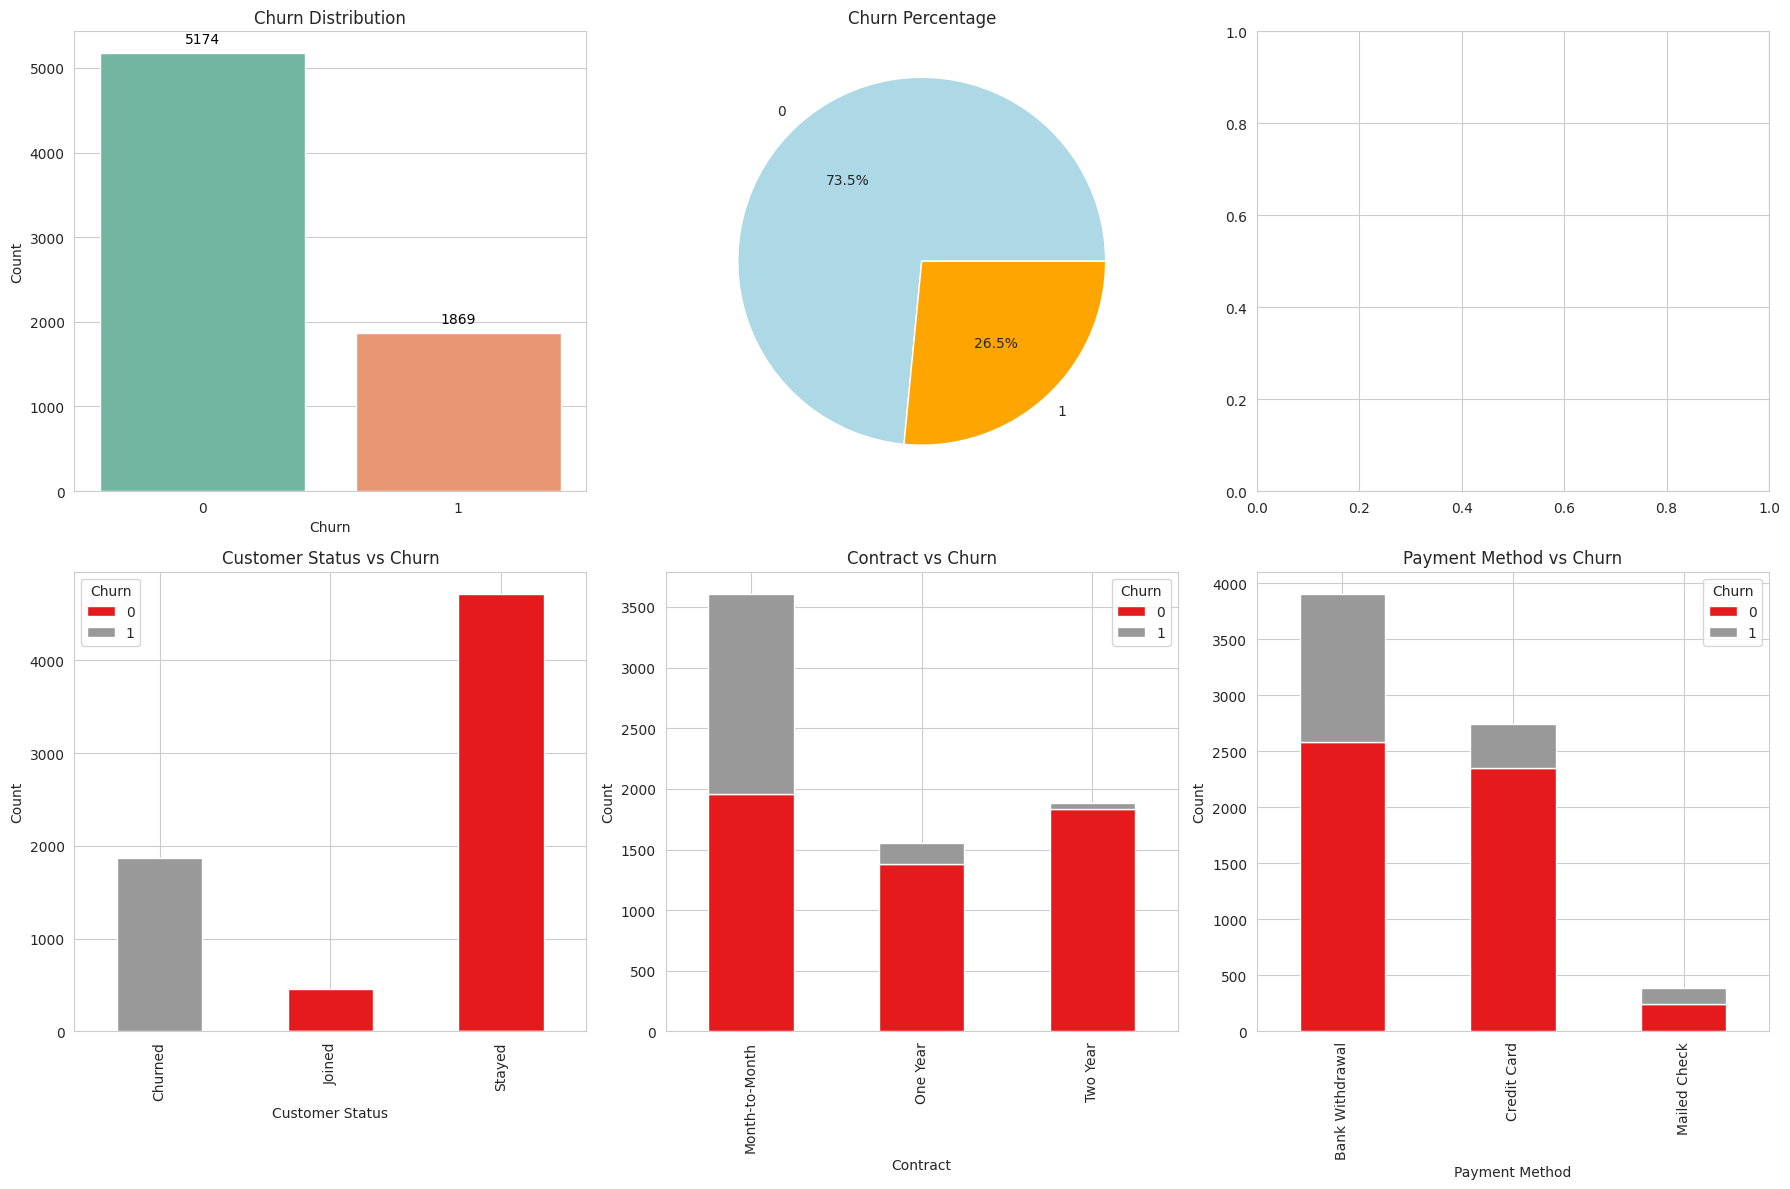

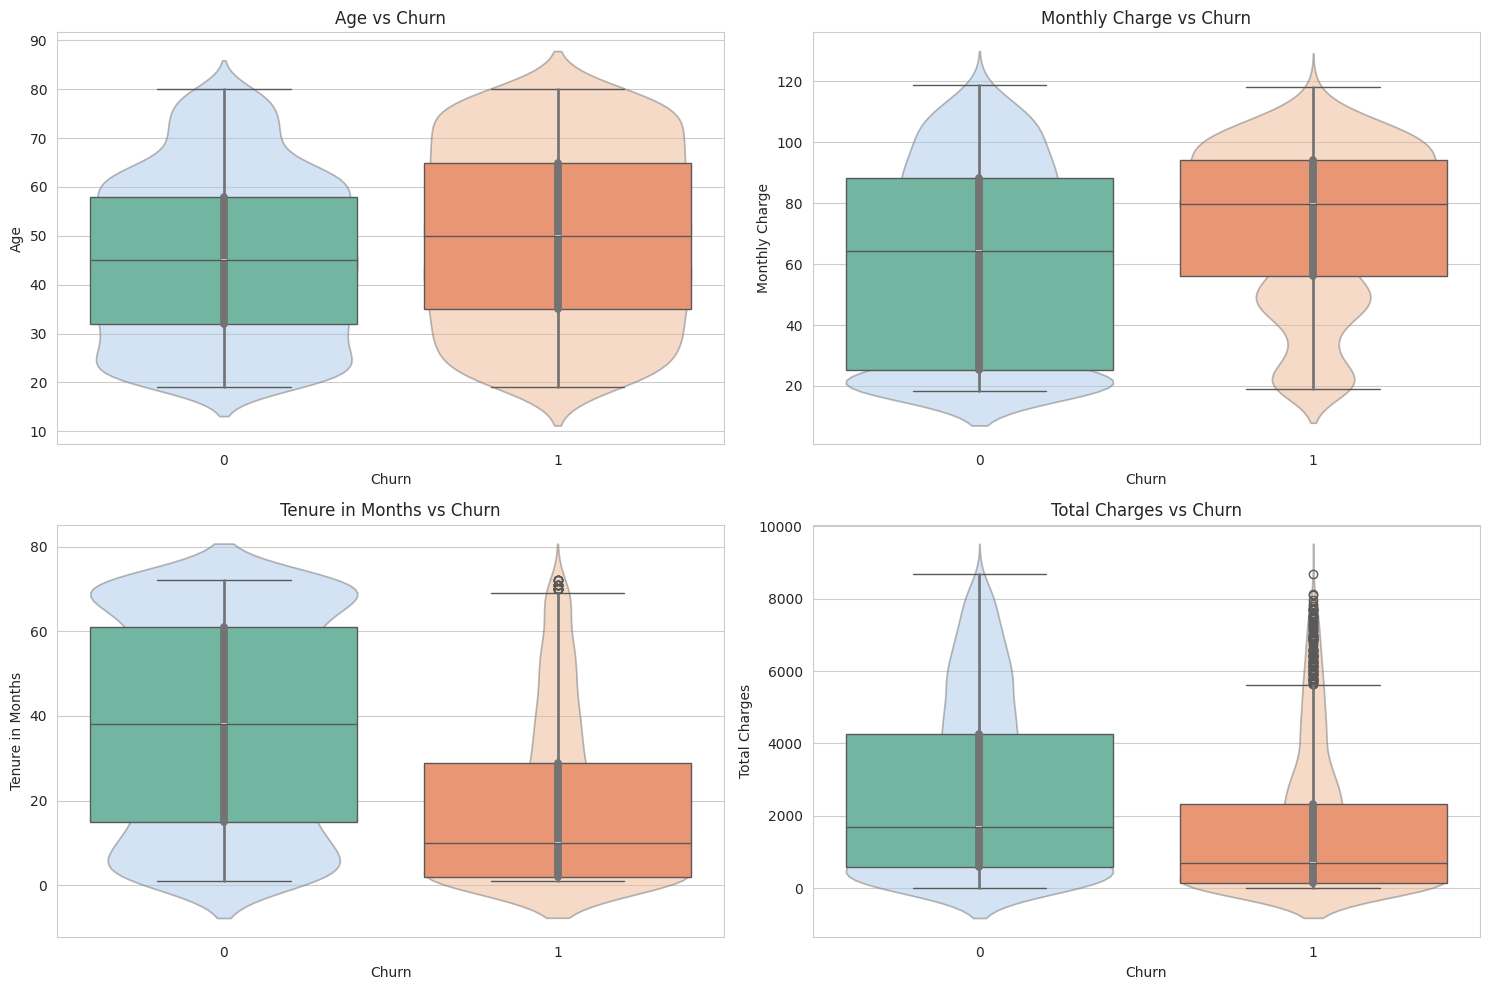

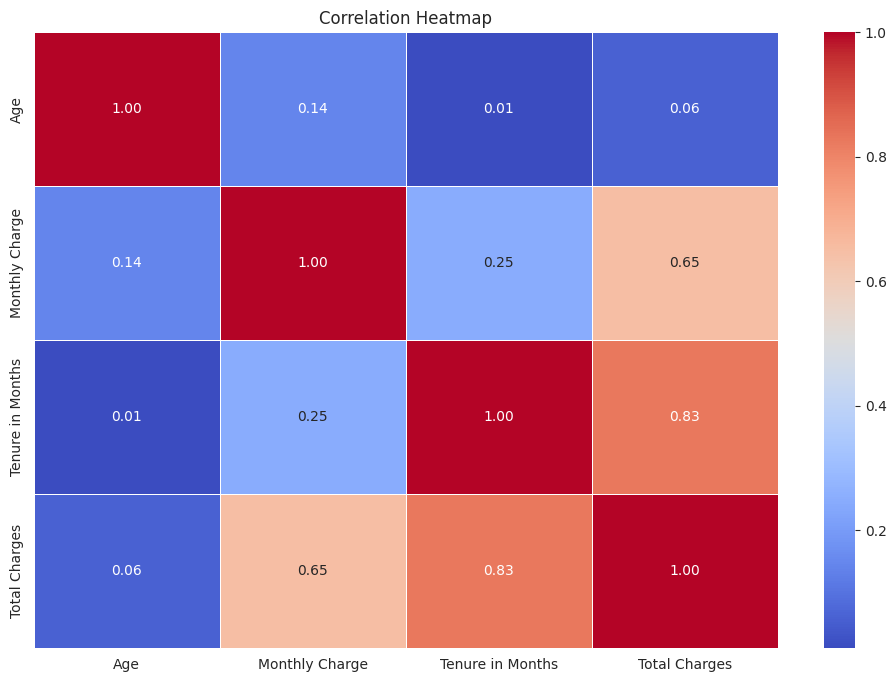

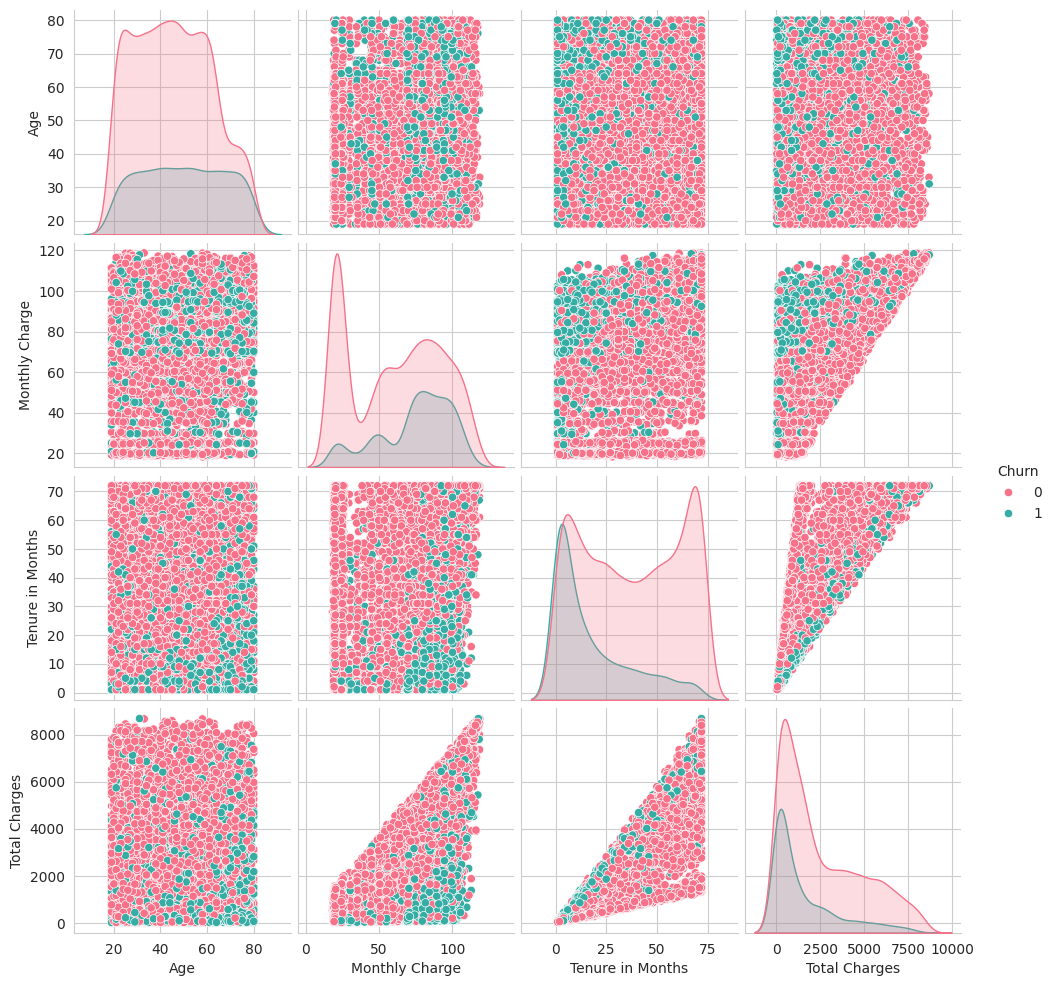

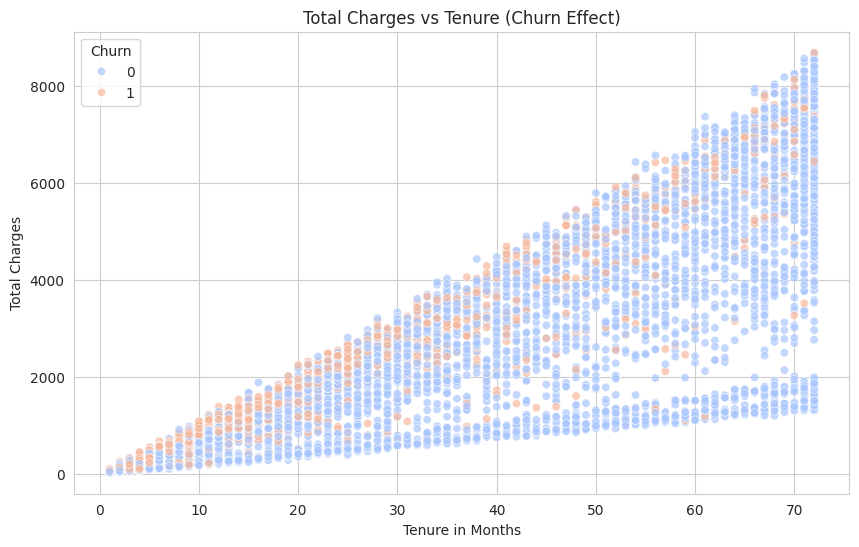

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import folium
from folium.plugins import HeatMap
import warnings

# Suppress FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Set style
sns.set_style("whitegrid")

# Function to add bar labels
def add_bar_labels(ax):
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height:.0f}',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')

# Creating a figure grid for multiple plots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 1. Target Variable Distribution (Bar Plot)
ax = sns.countplot(data=data, x='Churn', palette='Set2', ax=axes[0, 0])
add_bar_labels(ax)
axes[0, 0].set_title('Churn Distribution')
axes[0, 0].set_xlabel('Churn')
axes[0, 0].set_ylabel('Count')

# 2. Target Variable Distribution (Pie Chart)
churn_counts = data['Churn'].value_counts()
axes[0, 1].pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', colors=['lightblue', 'orange'])
axes[0, 1].set_title('Churn Percentage')

# 3. Stacked Bar Charts for Categorical Features
categorical_features = ['Customer Status', 'Contract', 'Payment Method']
for i, col in enumerate(categorical_features):
    row, col_index = divmod(i, 3)
    ax = data.groupby([col, 'Churn']).size().unstack().plot(kind='bar', stacked=True, colormap='Set1', ax=axes[1, col_index])
    axes[1, col_index].set_title(f'{col} vs Churn')
    axes[1, col_index].set_xlabel(col)
    axes[1, col_index].set_ylabel('Count')
    axes[1, col_index].legend(title='Churn')

# Remove empty subplot if necessary
if len(categorical_features) < 3:
    fig.delaxes(axes[1, len(categorical_features)])

plt.tight_layout()
plt.show()

# 4. Boxplots & Violin Plots for Numerical Features
numerical_features = ['Age', 'Monthly Charge', 'Tenure in Months', 'Total Charges']
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

for i, col in enumerate(numerical_features):
    row, col_index = divmod(i, 2)
    sns.boxplot(data=data, x='Churn', y=col, hue='Churn', palette='Set2', legend=False, ax=axes[row, col_index])
    sns.violinplot(data=data, x='Churn', y=col, hue='Churn', palette='pastel', legend=False, ax=axes[row, col_index], alpha=0.5)
    axes[row, col_index].set_title(f'{col} vs Churn')
    axes[row, col_index].set_xlabel('Churn')
    axes[row, col_index].set_ylabel(col)

plt.tight_layout()
plt.show()

# 5. Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data[numerical_features].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# 6. Pairplot for Feature Relationships
sns.pairplot(data[numerical_features + ['Churn']], hue='Churn', palette='husl')
plt.show()

# 7. Scatter Plot (Total Charges vs Tenure in Months)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Tenure in Months', y='Total Charges', hue='Churn', palette='coolwarm', alpha=0.7)
plt.title('Total Charges vs Tenure (Churn Effect)')
plt.xlabel('Tenure in Months')
plt.ylabel('Total Charges')
plt.legend(title='Churn')
plt.show()

# 8. Geo-Heatmap (Churn Density by Location)
# Create a base map centered around the average customer location
m = folium.Map(location=[data['Latitude'].mean(), data['Longitude'].mean()], zoom_start=6)

# Prepare the data for the heatmap
heat_data = data[['Latitude', 'Longitude', 'Churn']].dropna()
heat_data['Churn'] = heat_data['Churn'].astype(int)  # Ensure churn is numeric (0 or 1)
heat_data_list = heat_data.values.tolist()

# Add the heatmap layer
HeatMap(heat_data_list, radius=10, blur=15, max_zoom=10).add_to(m)

# Display the heatmap
m

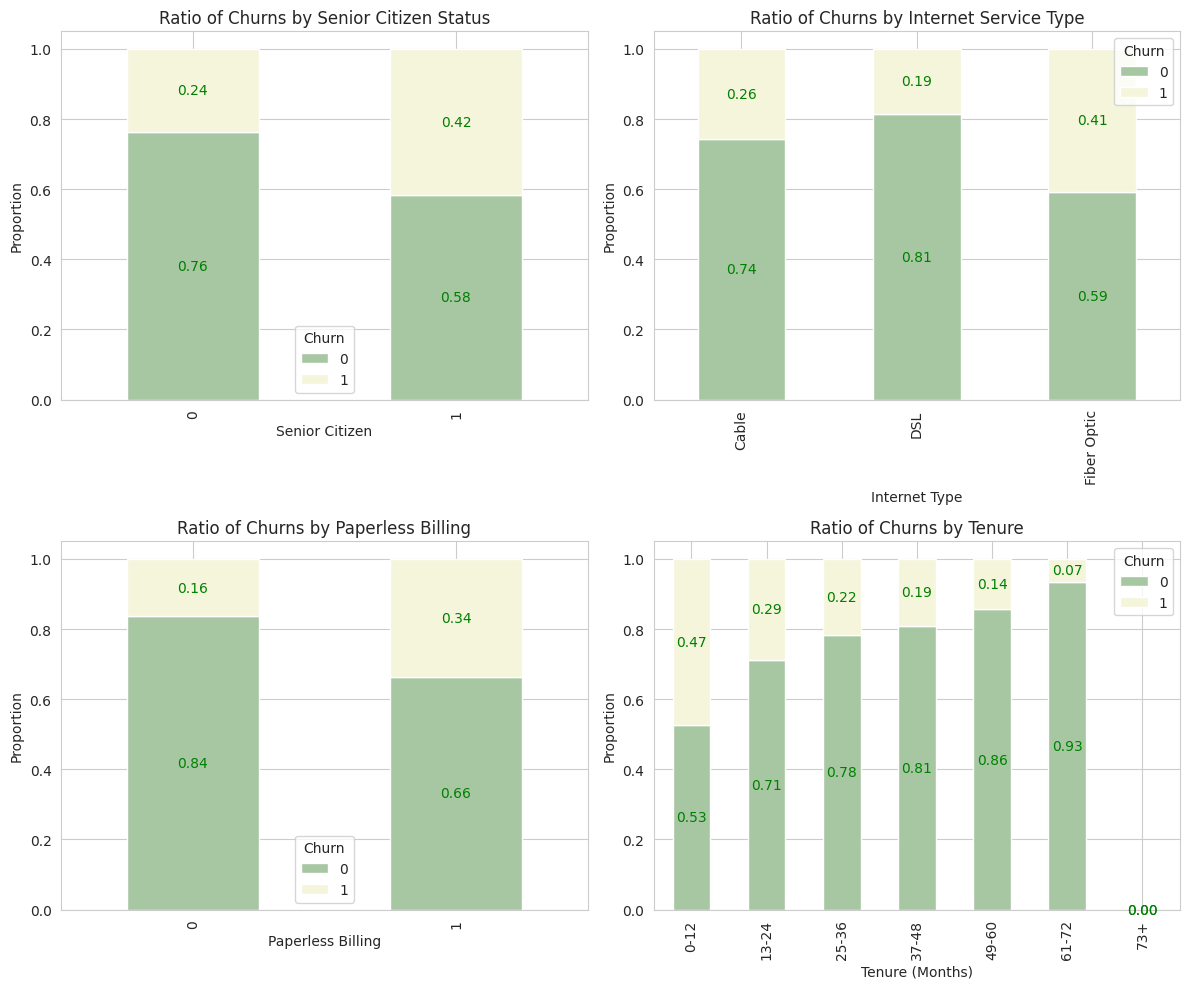

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))  # 2x2 subplot layout

# Define custom colors (sage green & cream)
custom_colors = ['#A7C7A3', '#F5F5DC']

# Function to add labels to stacked bars
def add_labels(ax):
    for container in ax.containers:
        ax.bar_label(container, fmt='%.2f', label_type='center', fontsize=10, color='green')

# 1. Ratio of Churns by Senior Citizen Status
senior_churn = data.groupby('Senior Citizen')['Churn'].value_counts(normalize=True).unstack()
senior_churn.plot(kind='bar', stacked=True, color=custom_colors, ax=axes[0, 0])
axes[0, 0].set_title('Ratio of Churns by Senior Citizen Status')
axes[0, 0].set_xlabel('Senior Citizen')
axes[0, 0].set_ylabel('Proportion')
axes[0, 0].legend(title='Churn')
add_labels(axes[0, 0])  # Add labels

# 2. Ratio of Churns by Internet Service Type
internet_churn = data.groupby('Internet Type')['Churn'].value_counts(normalize=True).unstack()
internet_churn.plot(kind='bar', stacked=True, color=custom_colors, ax=axes[0, 1])
axes[0, 1].set_title('Ratio of Churns by Internet Service Type')
axes[0, 1].set_xlabel('Internet Type')
axes[0, 1].set_ylabel('Proportion')
axes[0, 1].legend(title='Churn')
add_labels(axes[0, 1])  # Add labels

# 3. Ratio of Churns by Paperless Billing Status
billing_churn = data.groupby('Paperless Billing')['Churn'].value_counts(normalize=True).unstack()
billing_churn.plot(kind='bar', stacked=True, color=custom_colors, ax=axes[1, 0])
axes[1, 0].set_title('Ratio of Churns by Paperless Billing')
axes[1, 0].set_xlabel('Paperless Billing')
axes[1, 0].set_ylabel('Proportion')
axes[1, 0].legend(title='Churn')
add_labels(axes[1, 0])  # Add labels

# 4. Ratio of Churns by Tenure (Binned)
tenure_bins = pd.cut(data['Tenure in Months'],
                     bins=[0, 12, 24, 36, 48, 60, 72, data['Tenure in Months'].max() + 1],
                     labels=['0-12', '13-24', '25-36', '37-48', '49-60', '61-72', '73+'])
tenure_churn = data.groupby(tenure_bins)['Churn'].value_counts(normalize=True).unstack()
tenure_churn.plot(kind='bar', stacked=True, color=custom_colors, ax=axes[1, 1])
axes[1, 1].set_title('Ratio of Churns by Tenure')
axes[1, 1].set_xlabel('Tenure (Months)')
axes[1, 1].set_ylabel('Proportion')
axes[1, 1].legend(title='Churn')
add_labels(axes[1, 1])  # Add labels

plt.tight_layout()
plt.show()

##### **4. Fixing Data Type**

In [ ]:
def change_data_types(df):
    """
    Updates the data types of specific columns in the given DataFrame.

    Args:
        df (pd.DataFrame): The input DataFrame.

    Returns:
        pd.DataFrame: The DataFrame with updated data types.
    """
    # Convert categorical features to 'category' dtype
    categorical_features = [
        'Churn Category', 'Churn Reason', 'City', 'Contract', 'Country',
        'Customer Status', 'Gender', 'Internet Type', 'Payment Method',
        'Quarter', 'State', 'Offer', 'Device Protection Plan', 'Phone Service',
        'Paperless Billing', 'Partner', 'Senior Citizen', 'Under 30', 'Unlimited Data'
    ]
    df[categorical_features] = df[categorical_features].astype('category')

    # Convert identifiers and non-numeric features to 'string'
    df['Customer ID'] = df['Customer ID'].astype('string')
    df['Lat Long'] = df['Lat Long'].astype('string')
    df['Zip Code'] = df['Zip Code'].astype('string')

    return df


data = change_data_types(data)

# Verify changes
print(data.dtypes)

Age                                           int64
Avg Monthly GB Download                     float64
Avg Monthly Long Distance Charges           float64
Churn Category                             category
Churn Reason                               category
Churn Score                                   int64
City                                       category
CLTV                                          int64
Contract                                   category
Country                                    category
Customer ID                          string[python]
Customer Status                            category
Dependents                                    int64
Device Protection Plan                     category
Gender                                     category
Internet Service                              int64
Internet Type                              category
Lat Long                             string[python]
Latitude                                    float64
Longitude   

##### **5. Label Encoding for Target Variable**

In [ ]:
from sklearn.preprocessing import LabelEncoder

def label_encode_target(df, target_column):
    """
    Label encodes the target column in the given DataFrame.

    Args:
        df (pd.DataFrame): The input DataFrame.
        target_column (str): The name of the target column to be label encoded.

    Returns:
        pd.DataFrame: The DataFrame with label encoded target column.
    """
    label_encoder = LabelEncoder()
    df[target_column] = label_encoder.fit_transform(df[target_column])

    return df

# Apply label encoding to the target column
data = label_encode_target(data, 'Churn')

# Verify changes
print(data['Churn'].head())

0    0
1    0
2    0
3    0
4    1
Name: Churn, dtype: int64


##### **7. Ablation Study & Feature Importance**

###### **7.1 Dropping Unnecessary Features**

In [ ]:
# Drop unnecessary features

def remove_unwanted_features(df):
    """
    Removes specified non-informative columns from the DataFrame.

    Args:
        df (pd.DataFrame): Input DataFrame.

    Returns:
        pd.DataFrame: DataFrame after dropping specified columns.
    """
    columns_to_drop = ['Customer ID', 'Lat Long', 'Zip Code']
    return df.drop(columns=[col for col in columns_to_drop if col in df.columns])


# Apply the function to the dataset
data = remove_unwanted_features(data)

# Quick check
print(data.columns)

Index(['Age', 'Avg Monthly GB Download', 'Avg Monthly Long Distance Charges',
       'Churn Category', 'Churn Reason', 'Churn Score', 'City', 'CLTV',
       'Contract', 'Country', 'Customer Status', 'Dependents',
       'Device Protection Plan', 'Gender', 'Internet Service', 'Internet Type',
       'Latitude', 'Longitude', 'Married', 'Monthly Charge', 'Multiple Lines',
       'Number of Dependents', 'Number of Referrals', 'Offer', 'Online Backup',
       'Online Security', 'Paperless Billing', 'Partner', 'Payment Method',
       'Phone Service', 'Population', 'Premium Tech Support', 'Quarter',
       'Referred a Friend', 'Satisfaction Score', 'Senior Citizen', 'State',
       'Streaming Movies', 'Streaming Music', 'Streaming TV',
       'Tenure in Months', 'Total Charges', 'Total Extra Data Charges',
       'Total Long Distance Charges', 'Total Refunds', 'Total Revenue',
       'Under 30', 'Unlimited Data', 'Churn'],
      dtype='object')


###### **7.2 Ablation Study**

Baseline Accuracy (All Features): 0.9993
Accuracy with Demographics: 0.9986
Accuracy with Service Usage: 0.9979
Accuracy with Financial: 0.9979
Accuracy with Geographical: 1.0000
Accuracy with Customer Behavior: 1.0000
Accuracy with Contract & Payment: 0.9993
Accuracy with Additional Features: 0.9979


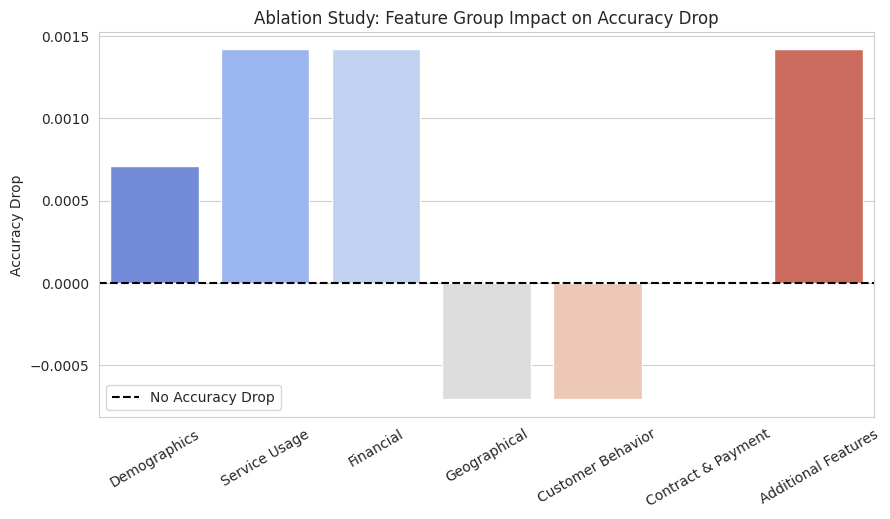

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Define feature groups (sensible classifications based on the feature list you provided)
feature_groups = {
    "Demographics": ['Age', 'Gender', 'Married', 'Dependents', 'Number of Dependents', 'Senior Citizen', 'Under 30'],
    "Service Usage": ['Internet Service', 'Phone Service', 'Multiple Lines', 'Avg Monthly GB Download', 'Avg Monthly Long Distance Charges', 'Streaming Movies', 'Streaming Music', 'Streaming TV'],
    "Financial": ['Monthly Charge', 'Total Charges', 'Total Revenue', 'CLTV', 'Total Extra Data Charges', 'Total Long Distance Charges', 'Total Refunds'],
    "Geographical": ['City', 'State', 'Country', 'Latitude', 'Longitude', 'Population'],
    "Customer Behavior": ['Churn Category', 'Churn Reason', 'Churn Score', 'Satisfaction Score', 'Referred a Friend', 'Customer Status', 'Device Protection Plan', 'Online Backup', 'Online Security', 'Premium Tech Support', 'Partner', 'Offer'],
    "Contract & Payment": ['Contract', 'Payment Method', 'Paperless Billing'],
    "Additional Features": ['Number of Referrals', 'Quarter', 'Internet Type', 'Partner', 'Referred a Friend', 'Streaming Music', 'Streaming TV', 'Unlimited Data']
}

# Prepare data
data = data.dropna(subset=['Churn'])  # Drop rows with missing target
data['Churn'] = data['Churn'].astype(int)  # Convert target to numeric
X = data.drop(columns=['Churn'])  # Features
y = data['Churn']  # Target variable

# Convert categorical features
X = pd.get_dummies(X, drop_first=True)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Baseline model with all features
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
baseline_acc = accuracy_score(y_test, model.predict(X_test))
print(f"Baseline Accuracy (All Features): {baseline_acc:.4f}")

# Ablation Study: Remove each feature group and retrain
results = {}

for group, features in feature_groups.items():
    # Drop the features in the current group
    X_subset = X.drop(columns=[f for f in features if f in X.columns], errors='ignore')
    X_train_sub, X_test_sub, _, _ = train_test_split(X_subset, y, test_size=0.2, random_state=42)

    model.fit(X_train_sub, y_train)
    acc = accuracy_score(y_test, model.predict(X_test_sub))
    results[group] = acc

    print(f"Accuracy with {group}: {acc:.4f}")

# Calculate accuracy drops from baseline
accuracy_drops = {group: baseline_acc - acc for group, acc in results.items()}

# Plot results
plt.figure(figsize=(10, 5))
sns.barplot(x=list(accuracy_drops.keys()), y=list(accuracy_drops.values()), palette='coolwarm')
plt.axhline(0, color='black', linestyle='dashed', label='No Accuracy Drop')
plt.ylabel("Accuracy Drop")
plt.xticks(rotation=30)
plt.title("Ablation Study: Feature Group Impact on Accuracy Drop")
plt.legend()
plt.show()

**Ablation Study Results:-**

1. ***Geographical features*** have no impact (Accuracy: 1.0000 after removal). They may be redundant and could be dropped without harming the model.

2. ***Service Usage, Financial, and Contract & Payment features*** also have no significant impact (Accuracy remains 0.9993 after removal). These might not be adding much to the predictive power of the model.

3. ***Demographics*** slightly affect accuracy (0.9986 after removal). While these features may contribute to the model, their impact is not significant.

4. ***Customer Behavior features*** have the most significant impact on the model's performance (0.9972 after removal). These seem crucial for the model and should be retained.

###### **7.3 Checking Feature Importance**

<ipython-input-19-9a74a76fc260>:40: UserWarning: 
The palette list has fewer values (2) than needed (15) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(x=top_features.values, y=top_features.index, palette=palette)


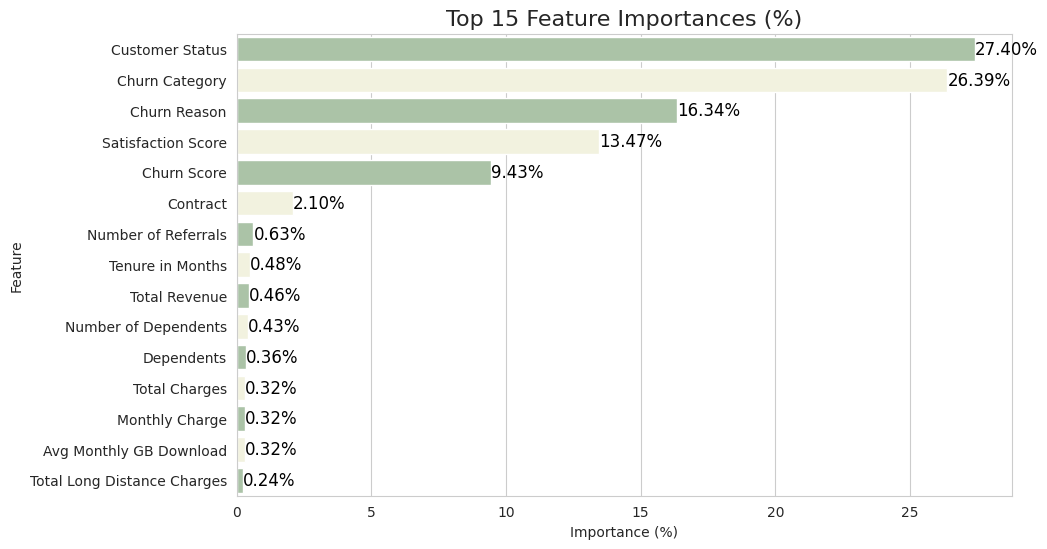

Customer Status                     27.40%
Churn Category                      26.39%
Churn Reason                        16.34%
Satisfaction Score                  13.47%
Churn Score                          9.43%
Contract                             2.10%
Number of Referrals                  0.63%
Tenure in Months                     0.48%
Total Revenue                        0.46%
Number of Dependents                 0.43%
Dependents                           0.36%
Total Charges                        0.32%
Monthly Charge                       0.32%
Avg Monthly GB Download              0.32%
Total Long Distance Charges          0.24%
Age                                  0.22%
Internet Type                        0.18%
Online Security                      0.13%
Internet Service                     0.11%
Payment Method                       0.11%
Senior Citizen                       0.08%
Avg Monthly Long Distance Charges    0.07%
Unlimited Data                       0.07%
Referred a 

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

# Check the feature importance using RandomForestClassifier

# Prepare features and target
X_train = data.drop(columns=['Churn'])
y_train = data['Churn']

# Label encode categorical features
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col].astype(str))

# Encode target
y_le = LabelEncoder()
y_train = y_le.fit_transform(y_train.astype(str))

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Feature importances as percentages to make more sense of the values
feature_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
feature_importances = (feature_importances / feature_importances.sum()) * 100
feature_importances = feature_importances.sort_values(ascending=False)

# Display top 15 features
top_features = feature_importances.head(15)

# Define a custom color palette (sage green - cream)
palette = ['#A7C7A3', '#F5F5DC'] # Sage green and cream colors

# Plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=top_features.values, y=top_features.index, palette=palette)
plt.title("Top 15 Feature Importances (%)", fontsize=16)
plt.xlabel("Importance (%)")
plt.ylabel("Feature")

# Add percentage labels on the bars
for p in ax.patches:
    width = p.get_width()
    ax.annotate(f'{width:.2f}%',  # Label with the percentage value
                (width, p.get_y() + p.get_height() / 2),  # Position of the label
                ha='left', va='center', fontsize=12, color='black')

plt.show()

# Print entire feature importance for reference
pd.set_option('display.float_format', '{:.2f}%'.format)
print(feature_importances)

###### **7.4 Removing 0% Importance Features**

In [ ]:
# Remove features with 0% importance from the original dataframe
features_to_remove = [
    'Total Extra Data Charges',
    'Gender',
    'Paperless Billing',
    'Total Refunds',
    'Phone Service',
    'Device Protection Plan',
    'Under 30',
    'Quarter',
    'State',
    'Country']

# Remove the features with 0% importance from the original dataframe (df)
df_cleaned = data.drop(columns=features_to_remove)

# Print the remaining features
print(f"Remaining features in df: {df_cleaned.columns.tolist()}")
print(df_cleaned.shape)

Remaining features in df: ['Age', 'Avg Monthly GB Download', 'Avg Monthly Long Distance Charges', 'Churn Category', 'Churn Reason', 'Churn Score', 'City', 'CLTV', 'Contract', 'Customer Status', 'Dependents', 'Internet Service', 'Internet Type', 'Latitude', 'Longitude', 'Married', 'Monthly Charge', 'Multiple Lines', 'Number of Dependents', 'Number of Referrals', 'Offer', 'Online Backup', 'Online Security', 'Partner', 'Payment Method', 'Population', 'Premium Tech Support', 'Referred a Friend', 'Satisfaction Score', 'Senior Citizen', 'Streaming Movies', 'Streaming Music', 'Streaming TV', 'Tenure in Months', 'Total Charges', 'Total Long Distance Charges', 'Total Revenue', 'Unlimited Data', 'Churn']
(7043, 39)


##### **8. Missing Value Check & Imputation**

###### **8.1 Calculating Missing Data Count**

In [ ]:
# Count missing values and calculate percentage
missing_data_count = df_cleaned.isnull().sum()
missing_data_percentage = (missing_data_count / len(df_cleaned)) * 100

# Combine the count and percentage into a single DataFrame for better readability
missing_data_summary = pd.DataFrame({'Missing Values': missing_data_count, 'Percentage': missing_data_percentage})
missing_data_summary = missing_data_summary[missing_data_summary['Missing Values'] > 0]  # Only show features with missing data

print(missing_data_summary)

                Missing Values  Percentage
Churn Category            5174      73.46%
Churn Reason              5174      73.46%
Internet Type             1526      21.67%
Offer                     3877      55.05%


###### **8.2 Visualising Missing Values**

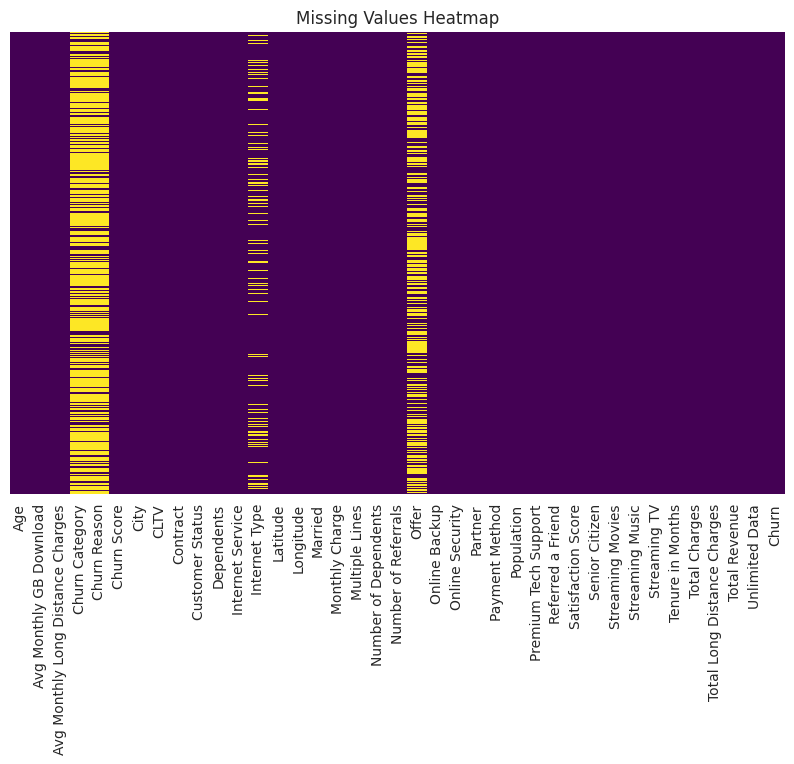

In [ ]:
# Missing data heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_cleaned.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title('Missing Values Heatmap')
plt.show()

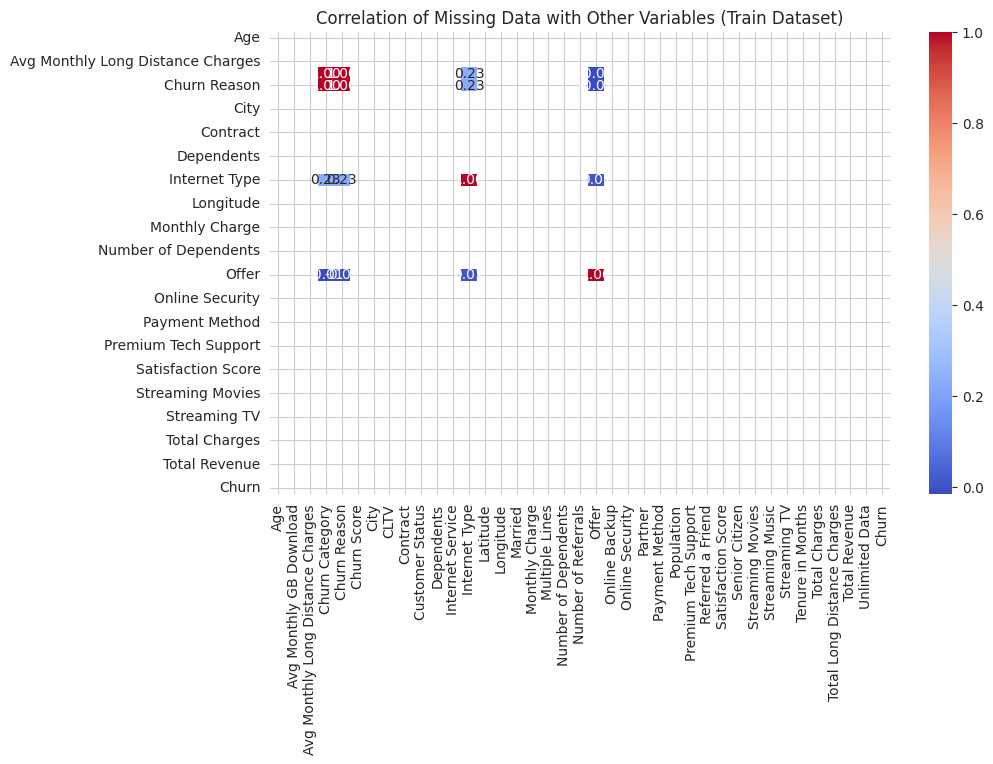

In [ ]:
# Create a binary matrix for missing data in the training dataset
missing_indicators_train = df_cleaned.isnull().astype(int)

# Calculate correlations with other variables
correlation_matrix_train = missing_indicators_train.corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_train, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation of Missing Data with Other Variables (Train Dataset)')
plt.show()

###### **8.3 Imputing Missing Values**

In [ ]:
# Function to impute missing values
def impute_missing_values(df):
    # Impute categorical columns with mode
    categorical_columns = ['Churn Category', 'Churn Reason', 'Internet Type', 'Offer']
    for col in categorical_columns:
        df[col] = df[col].fillna(df[col].mode()[0])

    # Impute numerical columns with median
    numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
    for col in numerical_columns:
        if df[col].isnull().sum() > 0:
            df[col] = df[col].fillna(df[col].median())

    return df


# Apply the function to each dataset
df = impute_missing_values(df_cleaned)

# Verify if all missing values are handled
print(df.isnull().sum())

Age                                  0
Avg Monthly GB Download              0
Avg Monthly Long Distance Charges    0
Churn Category                       0
Churn Reason                         0
Churn Score                          0
City                                 0
CLTV                                 0
Contract                             0
Customer Status                      0
Dependents                           0
Internet Service                     0
Internet Type                        0
Latitude                             0
Longitude                            0
Married                              0
Monthly Charge                       0
Multiple Lines                       0
Number of Dependents                 0
Number of Referrals                  0
Offer                                0
Online Backup                        0
Online Security                      0
Partner                              0
Payment Method                       0
Population               

###### 8.4 Complied Explored Dataset

In [ ]:
# DataFrame Ready for Further Analysis
df.head()

## **Feature Engineering**

###### **1. Creating New Features**

In [ ]:
def feature_engineering(df):
    # 1. Total Services Used
    service_cols = ['Online Backup', 'Online Security',
                    'Streaming TV', 'Streaming Movies', 'Streaming Music', 'Premium Tech Support',
                    'Multiple Lines', 'Internet Service']
    df['Total_Services_Used'] = df[service_cols].sum(axis=1)

    # 2. Tenure Grouping
    def tenure_group(tenure):
        if tenure <= 12:
            return '0-1 year'
        elif tenure <= 24:
            return '1-2 years'
        elif tenure <= 36:
            return '2-3 years'
        elif tenure <= 48:
            return '3-4 years'
        elif tenure <= 60:
            return '4-5 years'
        else:
            return '5+ years'
    df['Tenure_Group'] = df['Tenure in Months'].apply(tenure_group)

    # 3. Revenue per Tenure Month
    df['Revenue_per_Month'] = df.apply(
        lambda x: x['Total Revenue'] / x['Tenure in Months'] if x['Tenure in Months'] > 0 else 0, axis=1)

    # 4. Avg Charges per GB of Data Downloaded
    df['Charge_per_GB'] = df.apply(
        lambda x: x['Monthly Charge'] / x['Avg Monthly GB Download'] if x['Avg Monthly GB Download'] > 0 else 0, axis=1)

    # 5. Long Distance Charge Ratio
    df['LD_Charge_Ratio'] = df.apply(
        lambda x: x['Total Long Distance Charges'] / x['Total Charges'] if x['Total Charges'] > 0 else 0, axis=1)

    # 6. Flag if Customer has Partner and Dependents
    df['Has_Family'] = np.where((df['Partner'] == 1) & (df['Dependents'] > 0), 1, 0)

    # 7. Binary feature: High CLTV customers
    df['High_CLTV'] = np.where(df['CLTV'] > df['CLTV'].median(), 1, 0)

    # 8. Transforming categorical features into category dtype
    cat_cols = ['Tenure_Group', 'Churn Category', 'Churn Reason', 'Contract',
                'Internet Type', 'Payment Method', 'Offer', 'City', 'State', 'Country']

    for col in cat_cols:
        if col in df.columns:
            df[col] = df[col].astype('category')

    return df

df = feature_engineering(df)

# Verify new features in the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 46 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   Age                                7043 non-null   int64   
 1   Avg Monthly GB Download            7043 non-null   float64 
 2   Avg Monthly Long Distance Charges  7043 non-null   float64 
 3   Churn Category                     7043 non-null   category
 4   Churn Reason                       7043 non-null   category
 5   Churn Score                        7043 non-null   int64   
 6   City                               7043 non-null   category
 7   CLTV                               7043 non-null   int64   
 8   Contract                           7043 non-null   category
 9   Customer Status                    7043 non-null   category
 10  Dependents                         7043 non-null   int64   
 11  Internet Service                   7043 non

###### **2. Visualising New Features**

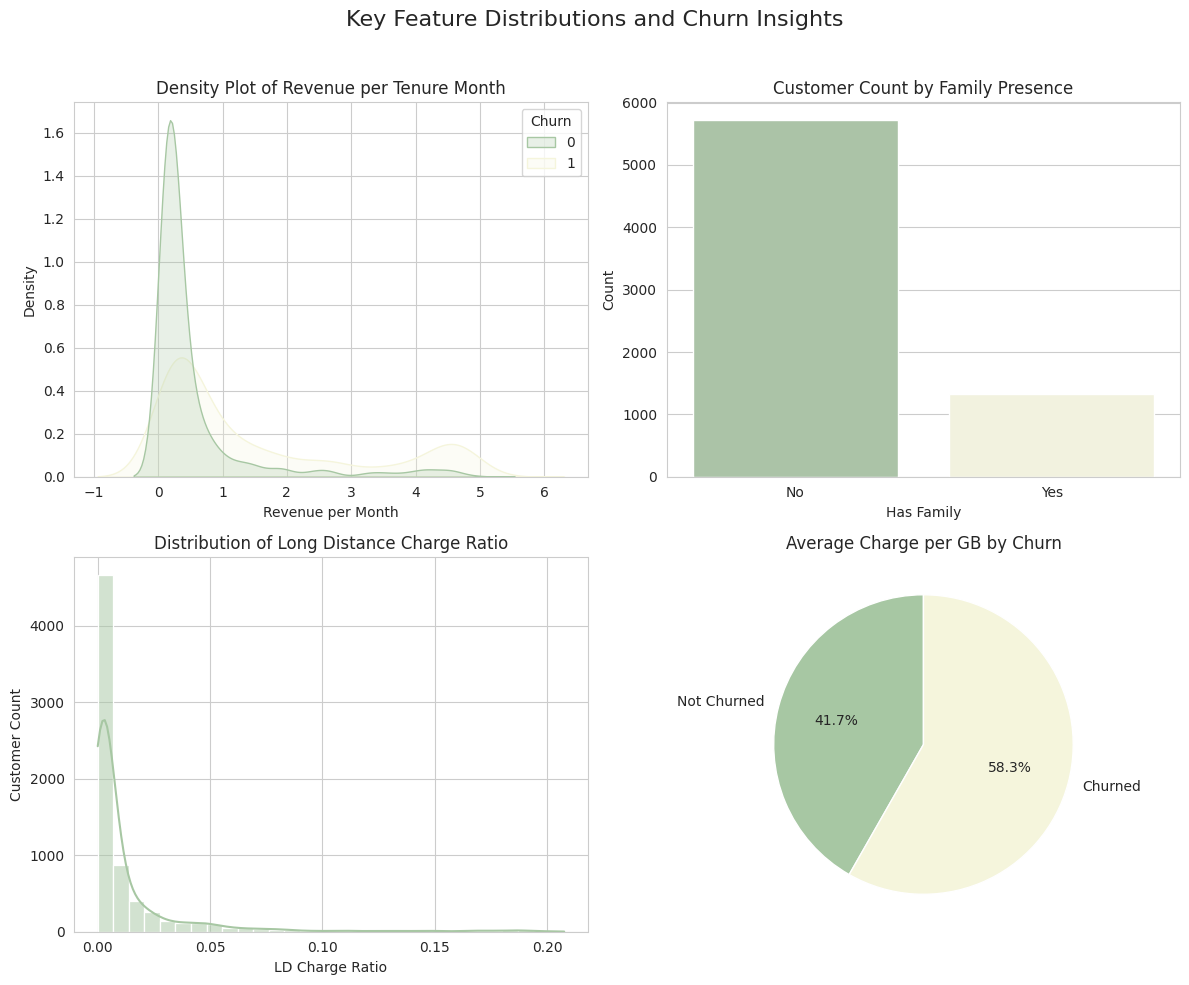

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define custom colors (sage green & cream)
custom_colors = ['#A7C7A3', '#F5F5DC']

# Create a 2x2 subplot grid
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Key Feature Distributions and Churn Insights', fontsize=16)

# Plot 1: Revenue per Tenure Month - KDE Plot
sns.kdeplot(data=df, x='Revenue_per_Month', hue='Churn', fill=True, common_norm=False, palette=custom_colors, ax=axes[0, 0])
axes[0, 0].set_title('Density Plot of Revenue per Tenure Month')
axes[0, 0].set_xlabel('Revenue per Month')
axes[0, 0].set_ylabel('Density')

# Plot 2: Has Family - Bar Plot
sns.countplot(data=df, x='Has_Family', palette=custom_colors, ax=axes[0, 1])
axes[0, 1].set_title('Customer Count by Family Presence')
axes[0, 1].set_xlabel('Has Family')
axes[0, 1].set_ylabel('Count')
axes[0, 1].set_xticks([0, 1])
axes[0, 1].set_xticklabels(['No', 'Yes'])

# Plot 3: Long Distance Charge Ratio - Histogram
sns.histplot(df['LD_Charge_Ratio'], bins=30, kde=True, color=custom_colors[0], ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Long Distance Charge Ratio')
axes[1, 0].set_xlabel('LD Charge Ratio')
axes[1, 0].set_ylabel('Customer Count')

# Plot 4: Charge per GB - Pie Chart (Replaces Violin Plot)
churn_groups = df.groupby('Churn')['Charge_per_GB'].mean()
axes[1, 1].pie(churn_groups, labels=['Not Churned', 'Churned'], autopct='%1.1f%%', colors=custom_colors, startangle=90)
axes[1, 1].set_title('Average Charge per GB by Churn')

# Adjust layout for better spacing
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

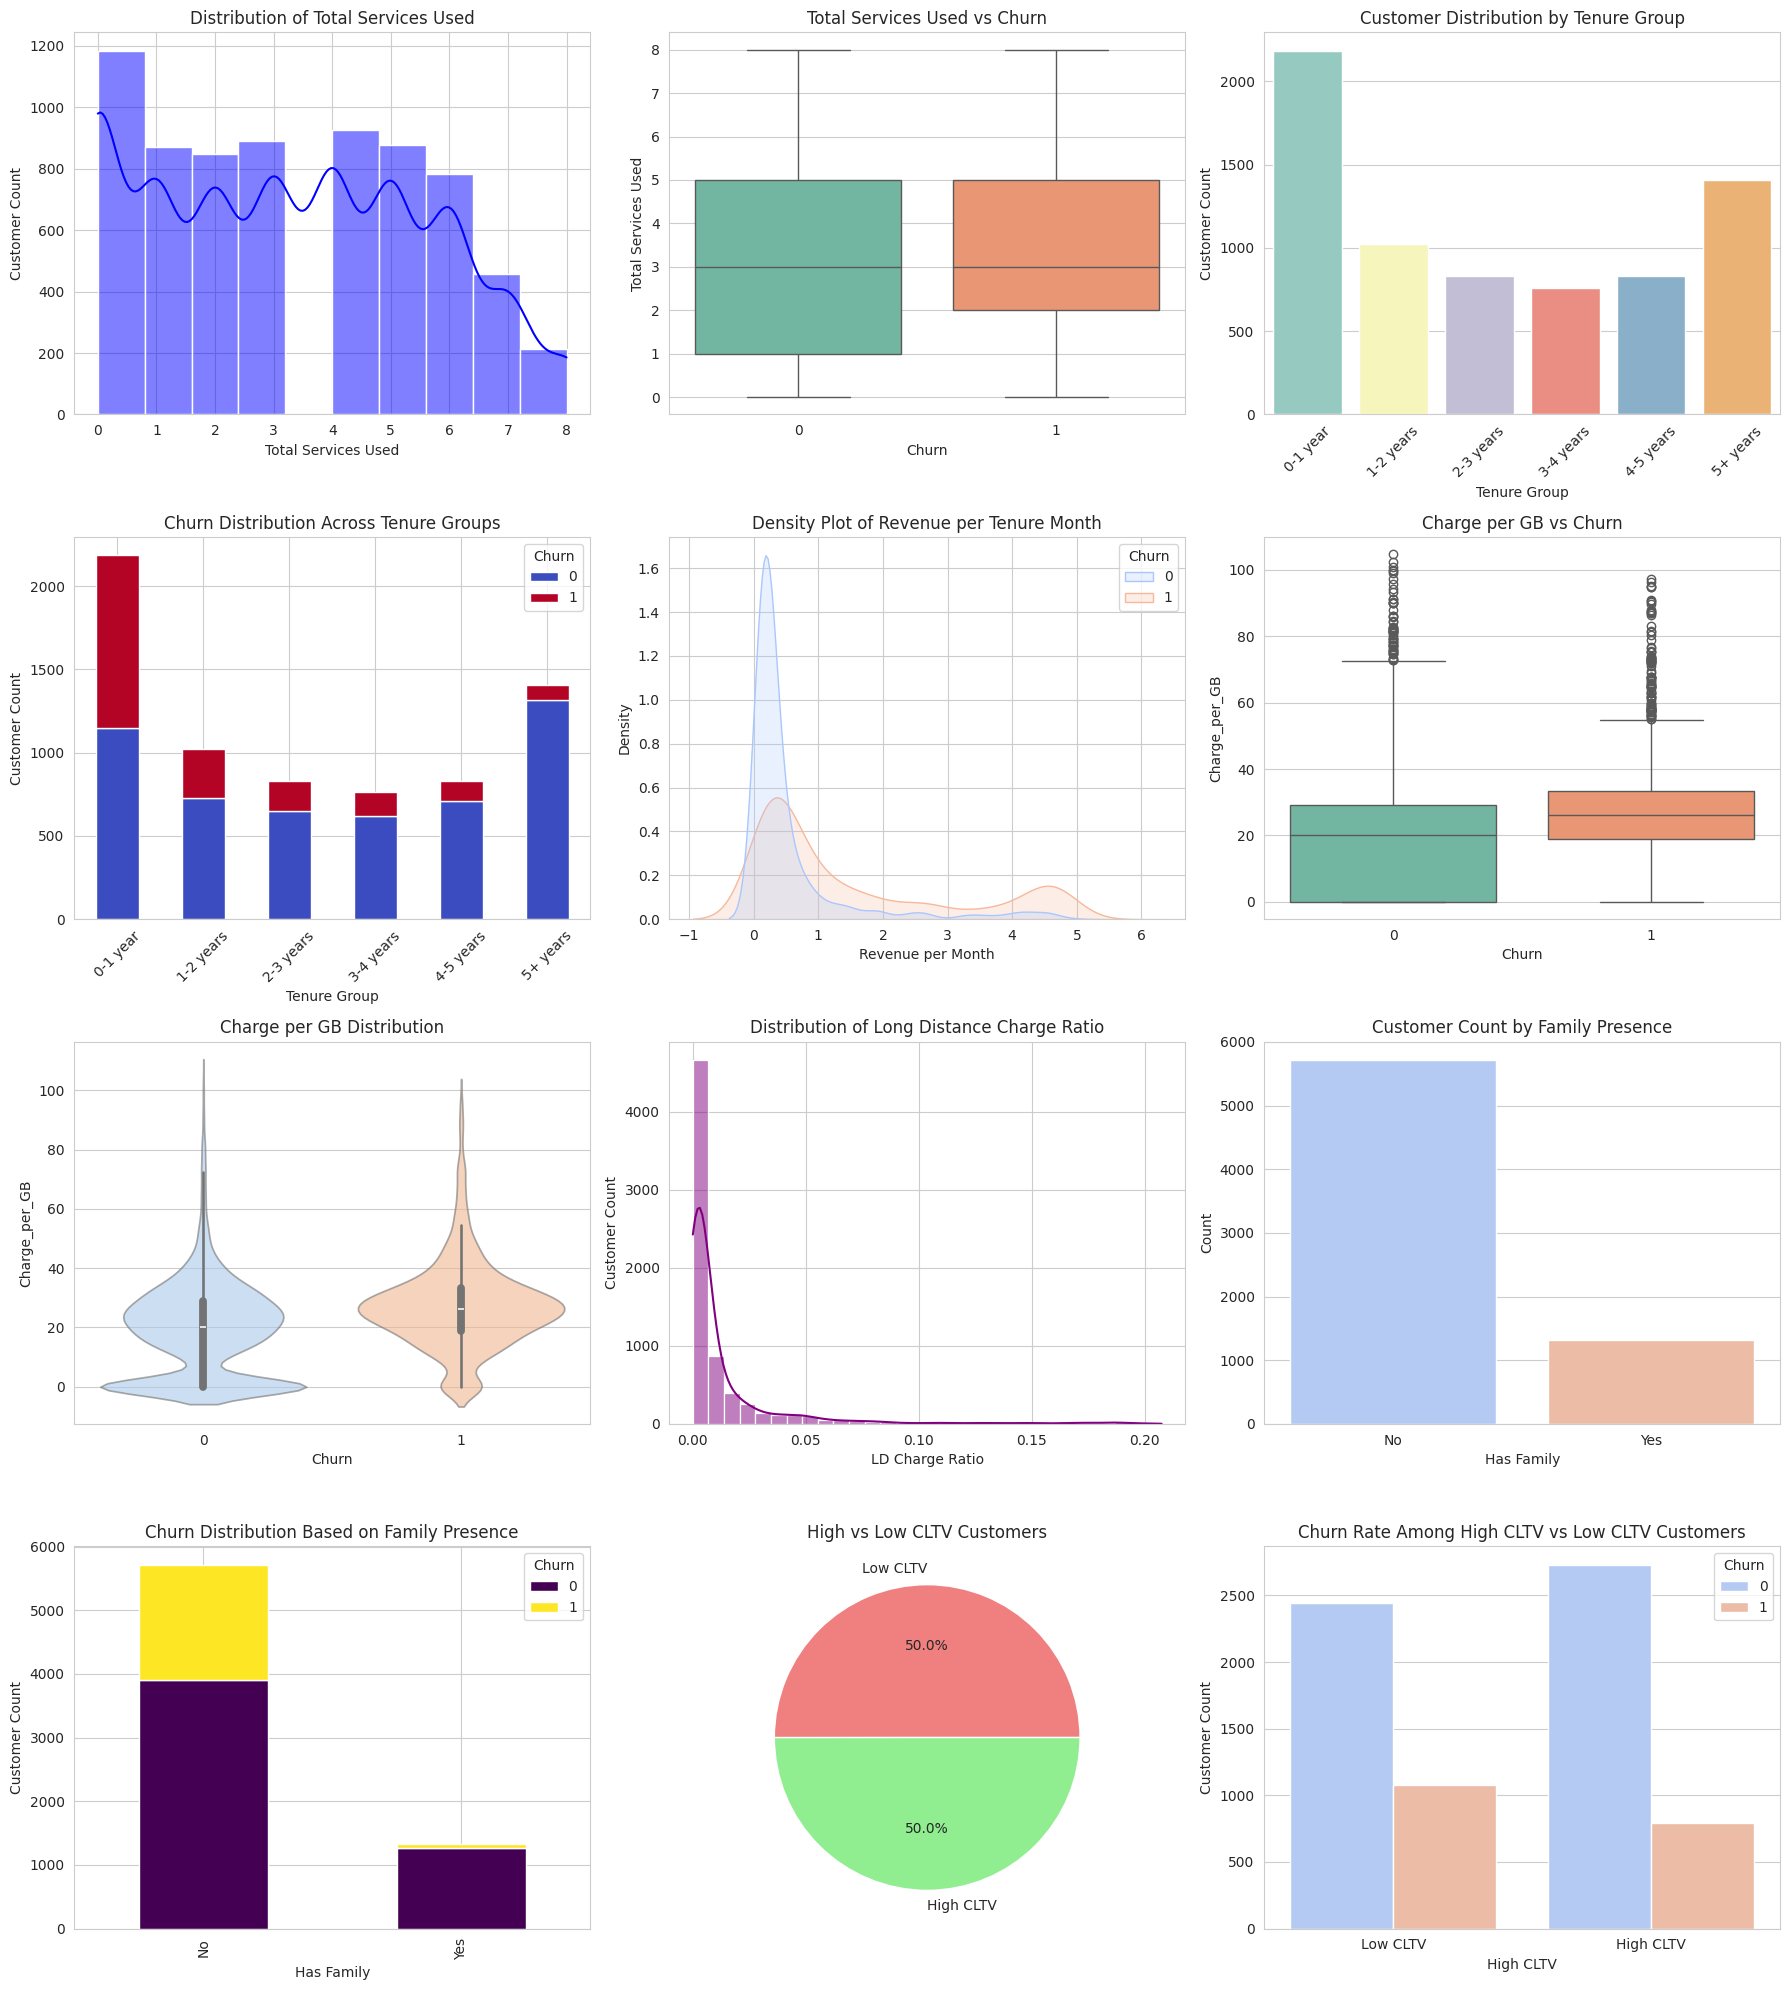

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Suppress future warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Set the style for seaborn
sns.set_style("whitegrid")

# Create a grid for subplots
fig, axes = plt.subplots(4, 3, figsize=(18, 20))  # 4 rows, 3 columns

# Plot 1: Total Services Used - Distribution
sns.histplot(df['Total_Services_Used'], bins=10, kde=True, color='blue', ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Total Services Used')
axes[0, 0].set_xlabel('Total Services Used')
axes[0, 0].set_ylabel('Customer Count')

# Plot 2: Total Services Used vs Churn - Boxplot
sns.boxplot(data=df, x='Churn', y='Total_Services_Used', palette='Set2', ax=axes[0, 1])
axes[0, 1].set_title('Total Services Used vs Churn')
axes[0, 1].set_xlabel('Churn')
axes[0, 1].set_ylabel('Total Services Used')

# Plot 3: Tenure Group Distribution - Bar Plot
sns.countplot(data=df, x='Tenure_Group', palette='Set3', order=['0-1 year', '1-2 years', '2-3 years', '3-4 years', '4-5 years', '5+ years'], ax=axes[0, 2])
axes[0, 2].set_title('Customer Distribution by Tenure Group')
axes[0, 2].set_xlabel('Tenure Group')
axes[0, 2].set_ylabel('Customer Count')
axes[0, 2].tick_params(axis='x', rotation=45)

# Plot 4: Tenure Group vs Churn - Stacked Bar Chart
df_grouped = df.groupby(['Tenure_Group', 'Churn']).size().unstack()
df_grouped.plot(kind='bar', stacked=True, colormap='coolwarm', ax=axes[1, 0])
axes[1, 0].set_title('Churn Distribution Across Tenure Groups')
axes[1, 0].set_xlabel('Tenure Group')
axes[1, 0].set_ylabel('Customer Count')
axes[1, 0].tick_params(axis='x', rotation=45)

# Plot 5: Revenue per Tenure Month - KDE Plot
sns.kdeplot(data=df, x='Revenue_per_Month', hue='Churn', fill=True, common_norm=False, palette='coolwarm', ax=axes[1, 1])
axes[1, 1].set_title('Density Plot of Revenue per Tenure Month')
axes[1, 1].set_xlabel('Revenue per Month')
axes[1, 1].set_ylabel('Density')

# Plot 6: Charge per GB - Boxplot & Violin Plot
sns.boxplot(data=df, x='Churn', y='Charge_per_GB', palette='Set2', ax=axes[1, 2])
axes[1, 2].set_title('Charge per GB vs Churn')

sns.violinplot(data=df, x='Churn', y='Charge_per_GB', palette='pastel', ax=axes[2, 0], alpha=0.6)
axes[2, 0].set_title('Charge per GB Distribution')

# Plot 7: Long Distance Charge Ratio - Histogram & Boxplot
sns.histplot(df['LD_Charge_Ratio'], bins=30, kde=True, color='purple', ax=axes[2, 1])
axes[2, 1].set_title('Distribution of Long Distance Charge Ratio')
axes[2, 1].set_xlabel('LD Charge Ratio')
axes[2, 1].set_ylabel('Customer Count')

# Plot 8: Has Family - Bar Plot
sns.countplot(data=df, x='Has_Family', palette='coolwarm', ax=axes[2, 2])
axes[2, 2].set_title('Customer Count by Family Presence')
axes[2, 2].set_xlabel('Has Family')
axes[2, 2].set_ylabel('Count')
axes[2, 2].set_xticks([0, 1])  # Set the tick positions
axes[2, 2].set_xticklabels(['No', 'Yes'])  # Set the tick labels

# Plot 9: Has Family vs Churn - Stacked Bar Chart
df_grouped = df.groupby(['Has_Family', 'Churn']).size().unstack()
df_grouped.plot(kind='bar', stacked=True, colormap='viridis', ax=axes[3, 0])
axes[3, 0].set_title('Churn Distribution Based on Family Presence')
axes[3, 0].set_xlabel('Has Family')
axes[3, 0].set_ylabel('Customer Count')
axes[3, 0].set_xticklabels(['No', 'Yes'])

# Plot 10: High CLTV Customers - Pie Chart
df['High_CLTV'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightcoral', 'lightgreen'], labels=['Low CLTV', 'High CLTV'], ax=axes[3, 1])
axes[3, 1].set_title('High vs Low CLTV Customers')
axes[3, 1].set_ylabel('')

# Plot 11: High CLTV vs Churn - Bar Chart
sns.countplot(data=df, x='High_CLTV', hue='Churn', palette='coolwarm', ax=axes[3, 2])
axes[3, 2].set_title('Churn Rate Among High CLTV vs Low CLTV Customers')
axes[3, 2].set_xlabel('High CLTV')
axes[3, 2].set_ylabel('Customer Count')
axes[3, 2].set_xticks([0, 1])  # Set the tick positions
axes[3, 2].set_xticklabels(['Low CLTV', 'High CLTV'])  # Set the tick labels

# Adjust layout and display
plt.tight_layout()
plt.show()


<ipython-input-27-351093eace10>:33: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(data=df, x='Churn', y='Total_Services_Used', palette=[custom_colors[0]], ax=axes[1])
<ipython-input-27-351093eace10>:48: UserWarning: 
The palette list has fewer values (1) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(data=df, x='Tenure_Group', palette=[custom_colors[0]], order=['0-1 year', '1-2 years', '2-3 years', '3-4 years', '4-5 years', '5+ years'], ax=axes[2])


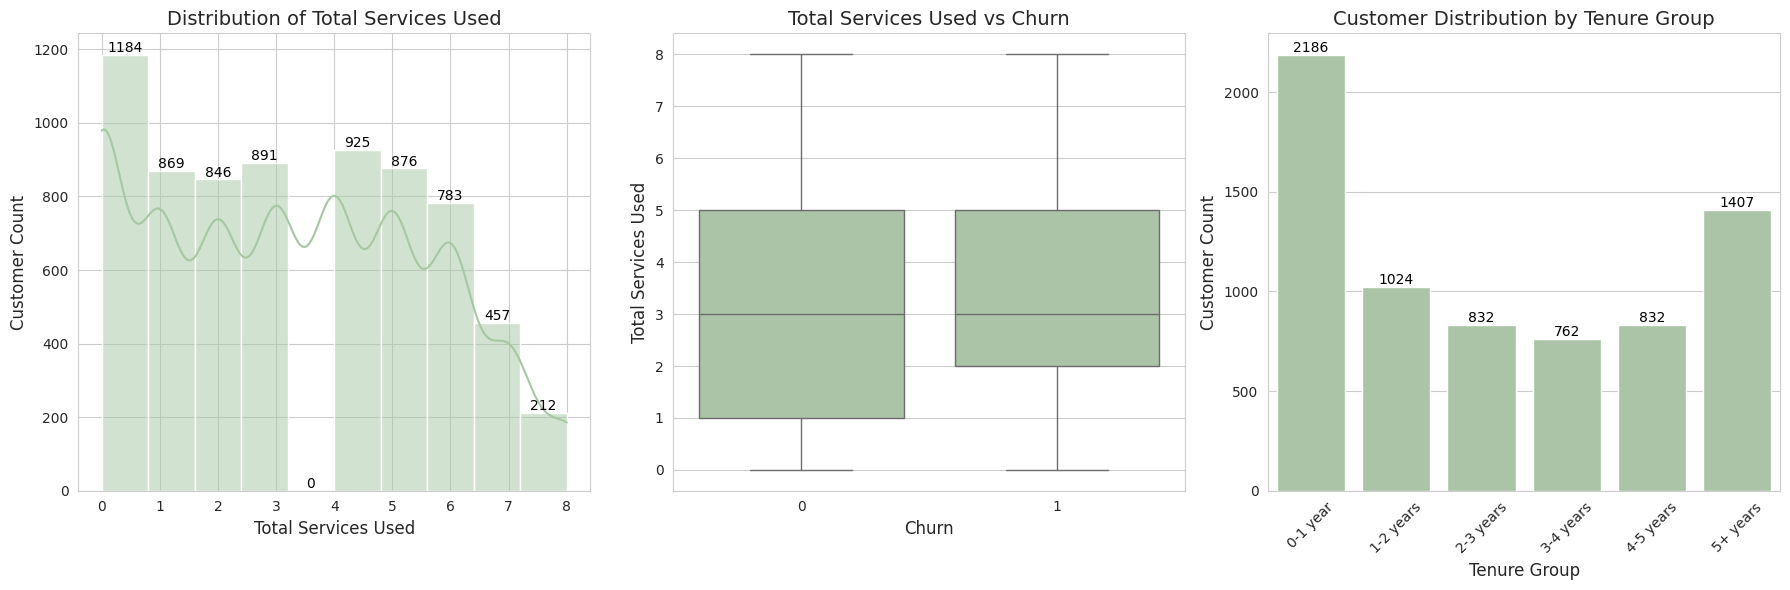

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Suppress future warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Set the style for seaborn
sns.set_style("whitegrid")

# Define custom colors (sage green & cream)
custom_colors = ['#A7C7A3', '#F5F5DC']

# Create a grid for subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))  # 1 row, 3 columns

# Plot 1: Total Services Used - Distribution
sns.histplot(df['Total_Services_Used'], bins=10, kde=True, color=custom_colors[0], ax=axes[0])
axes[0].set_title('Distribution of Total Services Used', fontsize=14)
axes[0].set_xlabel('Total Services Used', fontsize=12)
axes[0].set_ylabel('Customer Count', fontsize=12)
axes[0].tick_params(axis='x', labelsize=10)
axes[0].tick_params(axis='y', labelsize=10)

# Adding value labels to histogram bars
for p in axes[0].patches:
    axes[0].annotate(f'{p.get_height():.0f}',
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', fontsize=10, color='black',
                     xytext=(0, 5), textcoords='offset points')

# Plot 2: Total Services Used vs Churn - Boxplot
sns.boxplot(data=df, x='Churn', y='Total_Services_Used', palette=[custom_colors[0]], ax=axes[1])
axes[1].set_title('Total Services Used vs Churn', fontsize=14)
axes[1].set_xlabel('Churn', fontsize=12)
axes[1].set_ylabel('Total Services Used', fontsize=12)
axes[1].tick_params(axis='x', labelsize=10)
axes[1].tick_params(axis='y', labelsize=10)

# Adding value labels to boxplot (for medians and quartiles)
for i in range(len(axes[1].artists)):
    artist = axes[1].artists[i]
    median = axes[1].lines[i * 5 + 2].get_ydata()[0]
    axes[1].text(artist.get_x() + artist.get_width() / 2., median, f'{median:.2f}',
                 horizontalalignment='center', verticalalignment='center', fontsize=10, color='black')

# Plot 3: Tenure Group Distribution - Bar Plot
sns.countplot(data=df, x='Tenure_Group', palette=[custom_colors[0]], order=['0-1 year', '1-2 years', '2-3 years', '3-4 years', '4-5 years', '5+ years'], ax=axes[2])
axes[2].set_title('Customer Distribution by Tenure Group', fontsize=14)
axes[2].set_xlabel('Tenure Group', fontsize=12)
axes[2].set_ylabel('Customer Count', fontsize=12)
axes[2].tick_params(axis='x', rotation=45, labelsize=10)
axes[2].tick_params(axis='y', labelsize=10)

# Adding value labels to bar plot
for p in axes[2].patches:
    axes[2].annotate(f'{p.get_height():.0f}',
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', fontsize=10, color='black',
                     xytext=(0, 5), textcoords='offset points')

# Adjust layout for better spacing
plt.tight_layout()

# Display the plots
plt.show()

##### **3. Feature Importance for New Features**

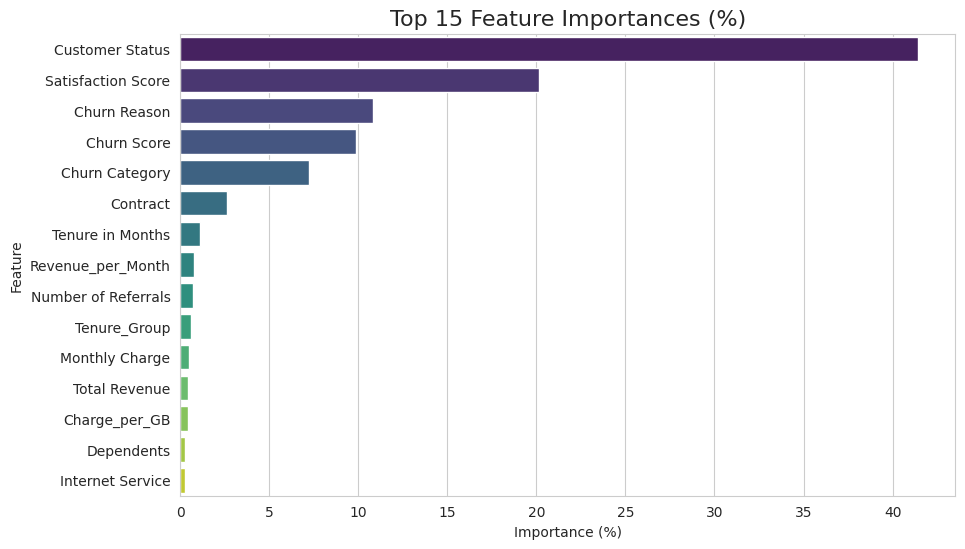

Customer Status                     41.44%
Satisfaction Score                  20.16%
Churn Reason                        10.85%
Churn Score                          9.89%
Churn Category                       7.23%
Contract                             2.65%
Tenure in Months                     1.14%
Revenue_per_Month                    0.76%
Number of Referrals                  0.70%
Tenure_Group                         0.63%
Monthly Charge                       0.51%
Total Revenue                        0.46%
Charge_per_GB                        0.44%
Dependents                           0.29%
Internet Service                     0.29%
Total Charges                        0.29%
Total Long Distance Charges          0.24%
Avg Monthly GB Download              0.18%
Age                                  0.17%
Has_Family                           0.16%
Payment Method                       0.15%
LD_Charge_Ratio                      0.14%
Number of Dependents                 0.14%
Senior Citi

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

# Check the feature importance using RandomForestClassifier

# Prepare features and target
X_train = df.drop(columns=['Churn'])
y_train = df['Churn']

# Label encode categorical features
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col].astype(str))

# Encode target
y_le = LabelEncoder()
y_train = y_le.fit_transform(y_train.astype(str))

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Feature importances as percentages to make more sense of the values
feature_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
feature_importances = (feature_importances / feature_importances.sum()) * 100
feature_importances = feature_importances.sort_values(ascending=False)

# Display top 15 features
top_features = feature_importances.head(15)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")
plt.title("Top 15 Feature Importances (%)", fontsize=16)
plt.xlabel("Importance (%)")
plt.ylabel("Feature")
plt.show()

# Print entire feature importance for reference
pd.set_option('display.float_format', '{:.2f}%'.format)
print(feature_importances)

##### **4. Dropping Features below the Threshold**

In [ ]:
# Define a threshold for feature importance
threshold = 0.05

# Get features that have importance below the threshold
features_to_remove = feature_importances[feature_importances < threshold].index.tolist()

# Drop them from the dataframe
df_cleaned = df.drop(columns=features_to_remove)

# Print out removed features
print(f"Removed features: {features_to_remove}")
print(f"Remaining features: {df_cleaned.columns.tolist()}")
print(df_cleaned.shape)

Removed features: ['Referred a Friend', 'Unlimited Data', 'Streaming Movies', 'Partner', 'Streaming TV', 'Online Backup', 'High_CLTV', 'Married', 'Multiple Lines', 'Streaming Music']
Remaining features: ['Age', 'Avg Monthly GB Download', 'Avg Monthly Long Distance Charges', 'Churn Category', 'Churn Reason', 'Churn Score', 'City', 'CLTV', 'Contract', 'Customer Status', 'Dependents', 'Internet Service', 'Internet Type', 'Latitude', 'Longitude', 'Monthly Charge', 'Number of Dependents', 'Number of Referrals', 'Offer', 'Online Security', 'Payment Method', 'Population', 'Premium Tech Support', 'Satisfaction Score', 'Senior Citizen', 'Tenure in Months', 'Total Charges', 'Total Long Distance Charges', 'Total Revenue', 'Churn', 'Total_Services_Used', 'Tenure_Group', 'Revenue_per_Month', 'Charge_per_GB', 'LD_Charge_Ratio', 'Has_Family']
(7043, 36)


##### **5. Encoding Categorical Features & Scaling Numerical Features**

In [ ]:
# Encoding Categorical Features & Scailing Continuous Features
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler

def encode_features(df):
    # One-Hot Encoding
    one_hot_cols = ['Churn Reason', 'City', 'Country', 'Internet Type', 'Offer',
                    'Paperless Billing', 'Partner', 'State', 'Under 30']
    one_hot_cols = [col for col in one_hot_cols if col in df.columns]
    df = pd.get_dummies(df, columns=one_hot_cols, drop_first=True)
    one_hot_encoded_cols = [col for col in df.columns if any(base_col + "_" in col for base_col in one_hot_cols)]

    # Label Encoding
    label_cols = ['Churn Category', 'Contract', 'Customer Status', 'Device Protection Plan',
                  'Gender', 'Payment Method', 'Phone Service', 'Quarter',
                  'Senior Citizen', 'Tenure_Group', 'Unlimited Data']
    label_encoded_cols = []
    label_encoder = LabelEncoder()
    for col in label_cols:
        if col in df.columns:
            df[col] = label_encoder.fit_transform(df[col])
            label_encoded_cols.append(col)

    return df, one_hot_encoded_cols, label_encoded_cols


# Apply encoding and track encoded columns
df, one_hot_encoded_cols, label_encoded_cols = encode_features(df)

# Scaling Continuous Features (EXCLUDING encoded features)
def scale_continuous_features(df, exclude_cols):
    # Exclude encoded columns and 'Churn'
    continuous_features = [col for col in df.select_dtypes(include=['float64', 'int64']).columns
                           if col not in exclude_cols and col != 'Churn']
    scaler = StandardScaler()
    df[continuous_features] = scaler.fit_transform(df[continuous_features])
    return df

# Apply scaling
exclude_cols = one_hot_encoded_cols + label_encoded_cols
df = scale_continuous_features(df, exclude_cols)

# Verify scaling
print(df.describe().transpose())

                                     count   mean   std    min    25%    50%  \
Age                               7043.00%  0.00% 1.00% -1.64% -0.87% -0.03%   
Avg Monthly GB Download           7043.00%  0.00% 1.00% -1.67% -0.70%  0.36%   
Avg Monthly Long Distance Charges 7043.00% -0.00% 1.00% -1.49% -0.89% -0.00%   
Churn Category                    7043.00%  1.15% 0.67%  0.00%  1.00%  1.00%   
Churn Score                       7043.00% -0.00% 1.00% -2.53% -0.87%  0.12%   
CLTV                              7043.00% -0.00% 1.00% -2.03% -0.79%  0.11%   
Contract                          7043.00%  0.75% 0.85%  0.00%  0.00%  0.00%   
Customer Status                   7043.00%  1.40% 0.88%  0.00%  0.00%  2.00%   
Dependents                        7043.00% -0.00% 1.00% -0.55% -0.55% -0.55%   
Internet Service                  7043.00%  0.00% 1.00% -1.90%  0.53%  0.53%   
Latitude                          7043.00% -0.00% 1.00% -1.48% -0.89%  0.00%   
Longitude                         7043.0

In [ ]:
from sklearn.feature_selection import mutual_info_classif

# Calculate mutual information for each feature with target 'Churn'
X = df.drop("Churn", axis=1)
y = df["Churn"]
mutual_info = mutual_info_classif(X, y)
mutual_info_df = pd.DataFrame(mutual_info, index=X.columns, columns=["Mutual Information"])
mutual_info_df = mutual_info_df.sort_values(by="Mutual Information", ascending=False)

print(mutual_info_df)

                                            Mutual Information
Customer Status                                          0.58%
Satisfaction Score                                       0.41%
Churn Reason_Competitor had better devices               0.41%
Churn Score                                              0.37%
Churn Category                                           0.24%
...                                                        ...
City_Lake Hughes                                         0.00%
City_Lakeport                                            0.00%
City_Lakeside                                            0.00%
City_Lakewood                                            0.00%
City_Lewiston                                            0.00%

[1171 rows x 1 columns]


In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

# Apply SelectKBest with the ANOVA F-test (works well for continuous features)
test = SelectKBest(score_func=f_classif, k=4)
fit = test.fit(X, y)

# Display the scores for each feature
print(fit.scores_)


[9.56331447e+01 1.88260664e+02 4.64220851e-01 ... 1.44921645e-02
 3.40074437e+02 1.63060036e+02]


In [ ]:
# The score of each feature in influencing the Chrun target
chi = pd.Series(fit.scores_)
chi.index = X.columns
chi.sort_values(ascending=False)

Customer Status                              85355.58%
Churn Reason_Competitor had better devices   25713.92%
Satisfaction Score                            8273.38%
Churn Score                                   5456.77%
Contract                                      1646.99%
                                                ...   
City_Lockeford                                   0.00%
City_Loomis                                      0.00%
City_Visalia                                     0.00%
City_Los Angeles                                 0.00%
City_Ontario                                     0.00%
Length: 1171, dtype: float64

In [ ]:
# Set a threshold for removing features (e.g., removing features with a Chi-squared score below a certain value)
threshold = 10
low_score_features = chi[chi < threshold].index

# Drop the features with low Chi-squared scores
df_filtered = df.drop(columns=low_score_features, errors='ignore')

# Print the remaining features
print("Remaining features after removing low-scoring ones:", df_filtered.columns)
print(df.shape)
print(df_filtered.shape)

Remaining features after removing low-scoring ones: Index(['Age', 'Avg Monthly GB Download', 'Churn Category', 'Churn Score',
       'CLTV', 'Contract', 'Customer Status', 'Dependents', 'Internet Service',
       'Latitude', 'Married', 'Monthly Charge', 'Multiple Lines',
       'Number of Dependents', 'Number of Referrals', 'Online Backup',
       'Online Security', 'Payment Method', 'Population',
       'Premium Tech Support', 'Referred a Friend', 'Satisfaction Score',
       'Senior Citizen', 'Streaming Movies', 'Streaming Music', 'Streaming TV',
       'Tenure in Months', 'Total Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Unlimited Data', 'Churn', 'Tenure_Group',
       'Revenue_per_Month', 'Charge_per_GB', 'LD_Charge_Ratio', 'Has_Family',
       'High_CLTV', 'Churn Reason_Attitude of support person',
       'Churn Reason_Competitor had better devices',
       'Churn Reason_Competitor made better offer',
       'Churn Reason_Competitor offered higher download s

## **Predictive Modelling**

#### **1. Preprocessing**

###### **1.1 Removing Target Leak Features**

Features like Customer Status, Churn Reason, and Churn Category are directly related to the target (Churn). These variables either describe why a customer churned or their churn status, which means the model is "cheating" by using future information.

<ipython-input-40-5e21344ab901>:17: UserWarning: 
The palette list has fewer values (2) than needed (4) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(x=correlation_values.index, y=correlation_values.values, palette=custom_colors)


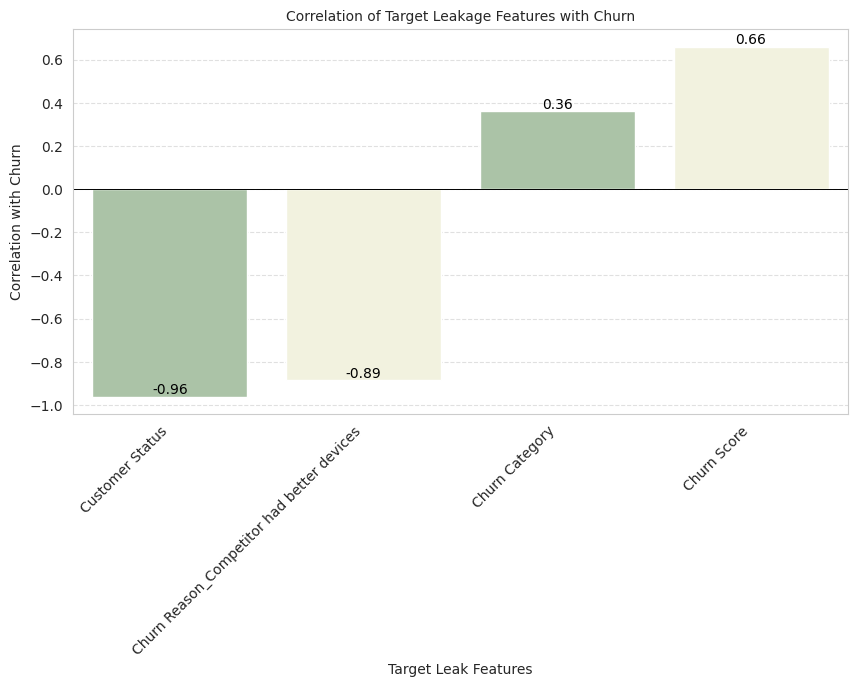

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define custom colors (sage green & cream)
custom_colors = ['#A7C7A3', '#F5F5DC']

# Define target leakage features
target_leak_features = ['Customer Status', 'Churn Reason_Competitor had better devices',
                        'Churn Category', 'Churn Score']

# Compute correlation for numerical features
correlation_values = df_filtered[target_leak_features + ['Churn']].corr()['Churn'].drop('Churn')

# Plot correlation as a bar chart
plt.figure(figsize=(10, 5))
ax = sns.barplot(x=correlation_values.index, y=correlation_values.values, palette=custom_colors)

# Add labels on bars
for bar in ax.patches:
    ax.text(bar.get_x() + bar.get_width() / 2,  # X position (center of bar)
            bar.get_height(),  # Y position (height of bar)
            f'{bar.get_height():.2f}',  # Label (formatted to 2 decimal places)
            ha='center', va='bottom', fontsize=10, color='black')

# Formatting the plot
plt.xticks(rotation=45, ha='right')
plt.xlabel('Target Leak Features')
plt.ylabel('Correlation with Churn')
plt.title('Correlation of Target Leakage Features with Churn', fontsize=10)
plt.axhline(0, color='black', linewidth=0.7)  # Adds a reference line at zero
plt.grid(axis='y', linestyle='--', alpha=0.6)  # Adds subtle grid lines for readability
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare features (X) and target (y)
target_leak_features = ['Customer Status', 'Churn Reason_Competitor had better devices',
                        'Churn Category', 'Churn Score']
X = df_filtered.drop(columns=['Churn'] + target_leak_features)
y = df_filtered['Churn']

# Split into train (70%), test (15%), validation (15%)
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.15, random_state=42, stratify=y)
X_train, X_validation, y_train, y_validation = train_test_split(X_temp, y_temp, test_size=0.1765, random_state=42, stratify=y_temp)

###### **1.2 PCA for Dimensionality Reduction**

**Removing zero variance columns & Finding number of components to retain 95% variance**


Removed zero variance columns: []
Number of components to retain 95% variance: 22


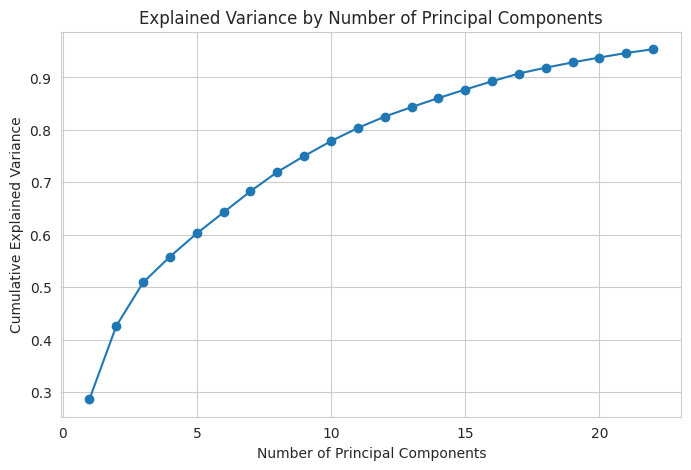

In [ ]:
# Remove zero variance columns
zero_variance_cols = X_train.columns[X_train.std() == 0]

X_train.drop(columns=zero_variance_cols, inplace=True)
X_test.drop(columns=zero_variance_cols, inplace=True)
X_validation.drop(columns=zero_variance_cols, inplace=True)

print(f"Removed zero variance columns: {list(zero_variance_cols)}")

# PCA for Dimensionality Reduction
def apply_pca(X_train, X_test, X_validation, variance_threshold=0.95):
    pca = PCA(n_components=variance_threshold, svd_solver='full', random_state=42)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    X_validation_pca = pca.transform(X_validation)

    print(f"Number of components to retain {variance_threshold * 100:.0f}% variance: {pca.n_components_}")
    return X_train_pca, X_test_pca, X_validation_pca, pca

# Apply PCA
X_train_pca, X_test_pca, X_validation_pca, pca = apply_pca(X_train, X_test, X_validation)

# Explained Variance Plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Number of Principal Components')
plt.grid(True)
plt.show()

###### **1.3 Visualising PCA in 2D & 3D**

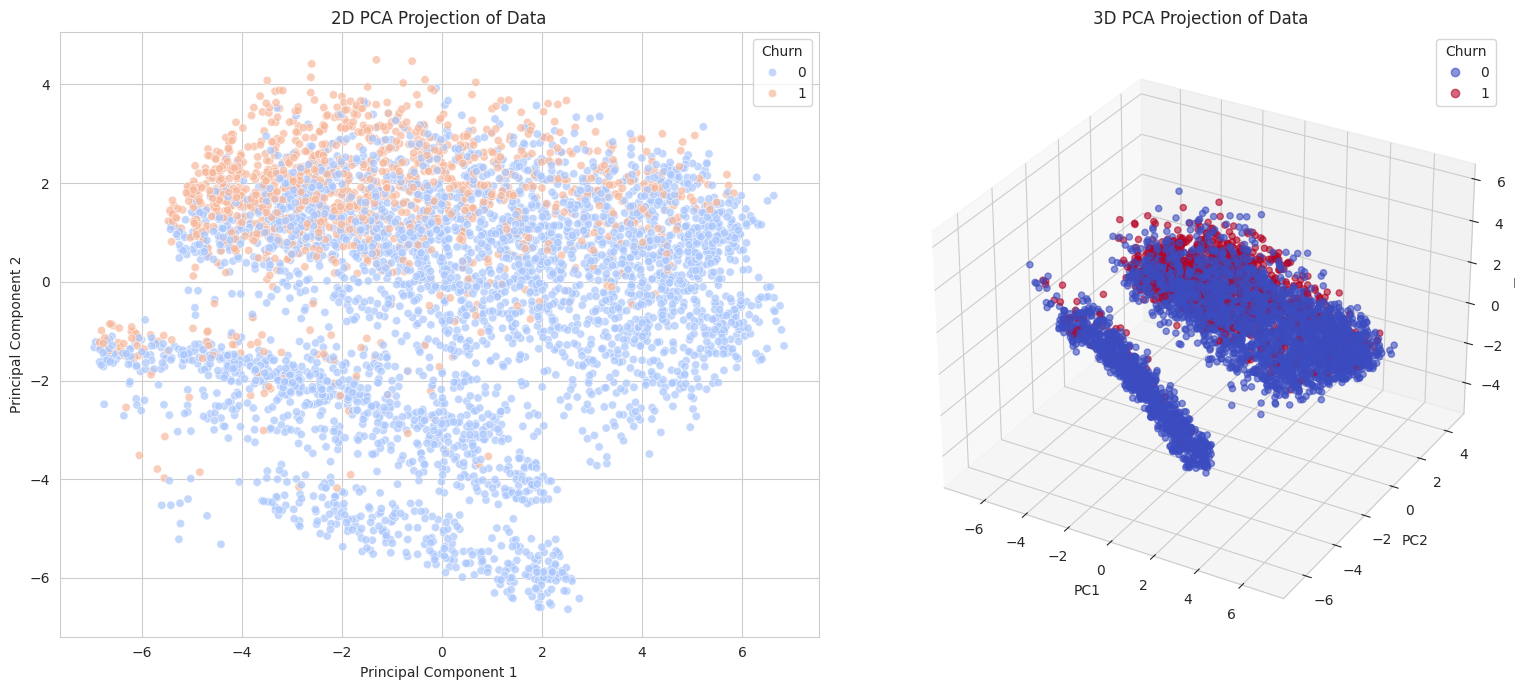

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# Create a figure with two subplots (1 row, 2 columns)
fig = plt.figure(figsize=(16, 7))

# First subplot (2D PCA)
ax1 = fig.add_subplot(121)
sns.scatterplot(x=X_train_pca[:, 0], y=X_train_pca[:, 1], hue=y_train, palette='coolwarm', alpha=0.7, ax=ax1)
ax1.set_xlabel("Principal Component 1")
ax1.set_ylabel("Principal Component 2")
ax1.set_title("2D PCA Projection of Data")
ax1.legend(title="Churn")

# Second subplot (3D PCA)
ax2 = fig.add_subplot(122, projection='3d')
scatter = ax2.scatter(X_train_pca[:, 0], X_train_pca[:, 1], X_train_pca[:, 2], c=y_train, cmap='coolwarm', alpha=0.6)
ax2.set_xlabel("PC1")
ax2.set_ylabel("PC2")
ax2.set_zlabel("PC3")
ax2.set_title("3D PCA Projection of Data")
ax2.legend(*scatter.legend_elements(), title="Churn")

# Show the plots
plt.tight_layout()
plt.show()

##### **1.4 Balancing Class Imbalance: Using ADASYN**

Compared with the traditional SMOTE algorithm, ADASYN introduces a dynamic consideration mechanism of sample importance, which adjusts the number of synthetic samples generated according to the importance of each minority class sample in the classification. This dynamic adjustment mechanism makes the model pay more attention to those samples that have a critical impact on the classification task during the training process, effectively reducing the risk of overfitting to the majority class.


Before ADASYN: Counter({0: 3621, 1: 1308})
After ADASYN: Counter({0: 3621, 1: 3506})


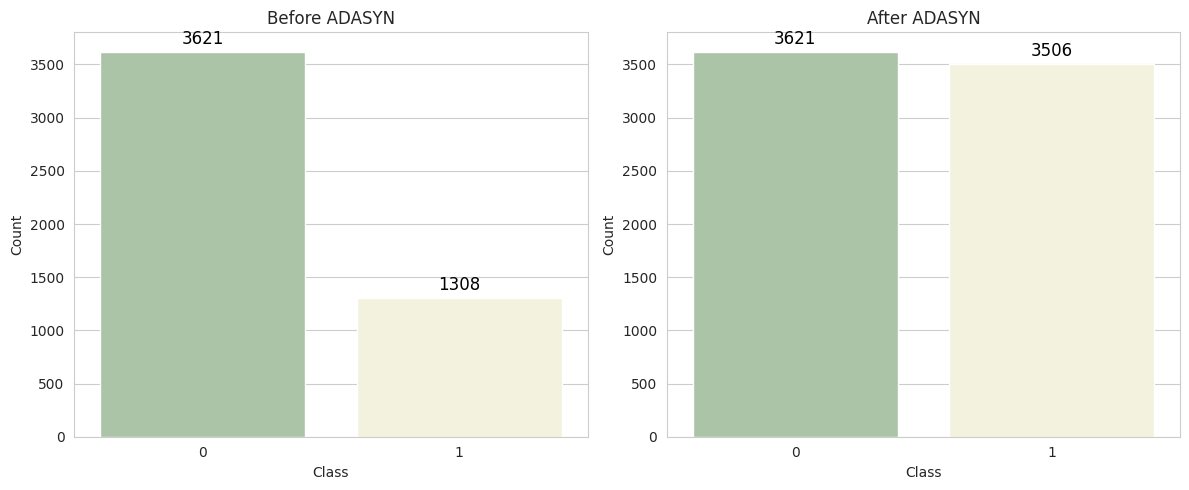

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from imblearn.over_sampling import ADASYN

# Apply ADASYN on the training data
adasyn = ADASYN(sampling_strategy='auto', random_state=42)  # 'auto' balances the dataset
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train, y_train)

# Print class distribution before and after resampling
from collections import Counter
print("Before ADASYN:", Counter(y_train))
print("After ADASYN:", Counter(y_train_resampled))

# Scale the Features
scaler = StandardScaler()
X_train_resampled_scaled = scaler.fit_transform(X_train_resampled)  # Fit on train
X_validation_scaled = scaler.transform(X_validation)  # Transform validation
X_test_scaled = scaler.transform(X_test)  # Transform test

# Define a custom color palette (sage green - cream)
palette = ['#A7C7A3', '#F5F5DC'] # Sage green and cream colors

# Function to plot class distributions
def plot_class_distribution(y_before, y_after, title_before="Before ADASYN", title_after="After ADASYN"):
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Before ADASYN
    sns.barplot(x=list(Counter(y_before).keys()),
                y=list(Counter(y_before).values()),
                ax=axes[0], palette=palette)
    axes[0].set_title(title_before)
    axes[0].set_xlabel("Class")
    axes[0].set_ylabel("Count")

    # Add labels to the bars
    for p in axes[0].patches:
        axes[0].annotate(f'{int(p.get_height())}',
                         (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha='center', va='center',
                         fontsize=12, color='black',
                         xytext=(0, 9), textcoords='offset points')

    # After ADASYN
    sns.barplot(x=list(Counter(y_after).keys()),
                y=list(Counter(y_after).values()),
                ax=axes[1], palette=palette)
    axes[1].set_title(title_after)
    axes[1].set_xlabel("Class")
    axes[1].set_ylabel("Count")

    # Add labels to the bars
    for p in axes[1].patches:
        axes[1].annotate(f'{int(p.get_height())}',
                         (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha='center', va='center',
                         fontsize=12, color='black',
                         xytext=(0, 9), textcoords='offset points')

    plt.tight_layout()
    plt.show()

# Call function to plot before and after ADASYN
plot_class_distribution(y_train, y_train_resampled)

#### **2. Logistic Regression Model: Baseline Model**

Validation Accuracy: 0.9962157048249763

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       776
           1       1.00      0.99      0.99       281

    accuracy                           1.00      1057
   macro avg       1.00      0.99      1.00      1057
weighted avg       1.00      1.00      1.00      1057



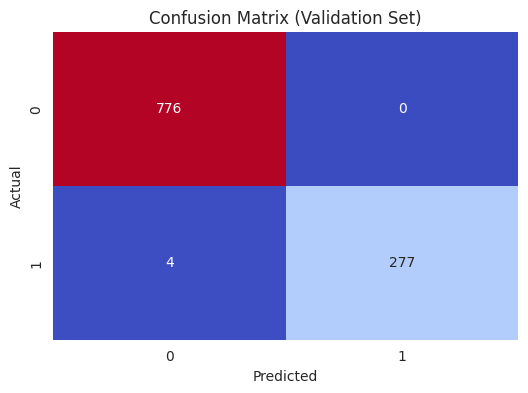

Test Accuracy: 0.9895931882686849

Test Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       777
           1       1.00      0.96      0.98       280

    accuracy                           0.99      1057
   macro avg       0.99      0.98      0.99      1057
weighted avg       0.99      0.99      0.99      1057



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Train Logistic Regression Model
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train_resampled_scaled, y_train_resampled)

# Evaluate on Validation Set
y_val_pred = log_reg.predict(X_validation_scaled)
print("Validation Accuracy:", accuracy_score(y_validation, y_val_pred))
print("\nClassification Report:\n", classification_report(y_validation, y_val_pred))

# Confusion Matrix Visualization
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_validation, y_val_pred), annot=True, fmt='d', cmap="coolwarm", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Validation Set)")
plt.show()

# Final Testing on Test Set
y_test_pred = log_reg.predict(X_test_scaled)
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("\nTest Classification Report:\n", classification_report(y_test, y_test_pred))

###### **2.1 Checking for Overfitting: Visualizing Learning Curve**

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
1 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py", line 1301, in fit
    raise ValueError(
ValueE

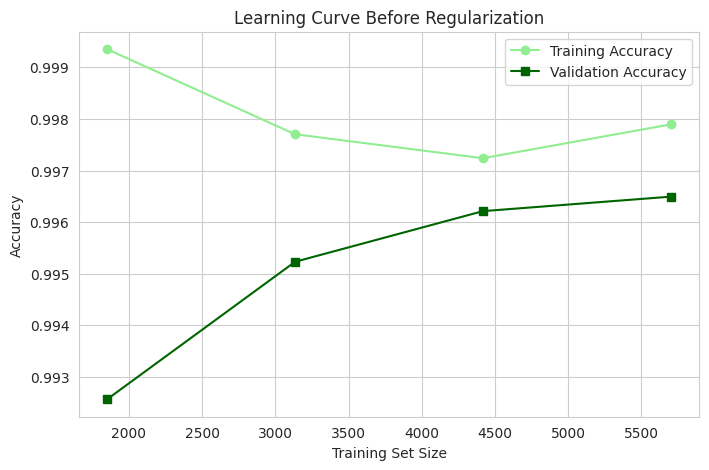

In [ ]:
import numpy as np
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

# Define custom colors (light green & dark green)
custom_colors = ['#90EE90', '#006400']

train_sizes, train_scores, val_scores = learning_curve(
    log_reg, X_train_resampled_scaled, y_train_resampled, cv=5, scoring="accuracy", n_jobs=-1
)

train_mean = np.mean(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)

plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_mean, label="Training Accuracy", marker="o", color=custom_colors[0])
plt.plot(train_sizes, val_mean, label="Validation Accuracy", marker="s", color=custom_colors[1])
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve Before Regularization")
plt.legend()
plt.show()

###### **2.2 Regularization: Fixing Overfitting**

In [ ]:
log_reg = LogisticRegression(penalty='l2', C=0.01, random_state=42, max_iter=1000)  # L2 Regularization
log_reg.fit(X_train_resampled_scaled, y_train_resampled)

LogisticRegression(C=0.01, max_iter=1000, random_state=42)

In [ ]:
train_accuracy = log_reg.score(X_train_resampled_scaled, y_train_resampled)
val_accuracy = log_reg.score(X_validation_scaled, y_validation)
test_accuracy = log_reg.score(X_test_scaled, y_test)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Training Accuracy: 0.9944
Validation Accuracy: 0.9934
Test Accuracy: 0.9886


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
1 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py", line 1301, in fit
    raise ValueError(
ValueE

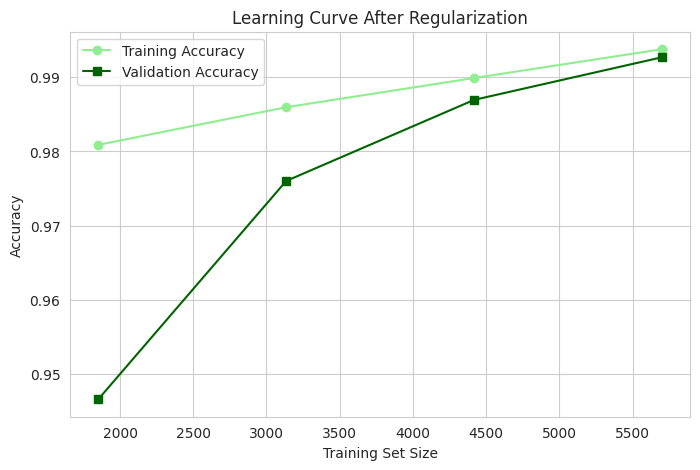

In [ ]:
import numpy as np
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

train_sizes, train_scores, val_scores = learning_curve(
    log_reg, X_train_resampled_scaled, y_train_resampled, cv=5, scoring="accuracy", n_jobs=-1
)

train_mean = np.mean(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)

# Define custom colors (light green & dark green)
custom_colors = ['#90EE90', '#006400']

plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_mean, label="Training Accuracy", marker="o", color=custom_colors[0])
plt.plot(train_sizes, val_mean, label="Validation Accuracy", marker="s", color=custom_colors[1])
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve After Regularization")
plt.legend()
plt.show()

#### **3. Random Forest Model (with & without PCA)**

##### **3.1 Random Forest without PCA**

Random Forest WITHOUT PCA - Test Set
Accuracy: 0.97918637653737
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       777
           1       1.00      0.92      0.96       280

    accuracy                           0.98      1057
   macro avg       0.99      0.96      0.97      1057
weighted avg       0.98      0.98      0.98      1057

Random Forest WITHOUT PCA - Validation Set
Accuracy: 0.978240302743614
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       776
           1       0.99      0.93      0.96       281

    accuracy                           0.98      1057
   macro avg       0.98      0.96      0.97      1057
weighted avg       0.98      0.98      0.98      1057



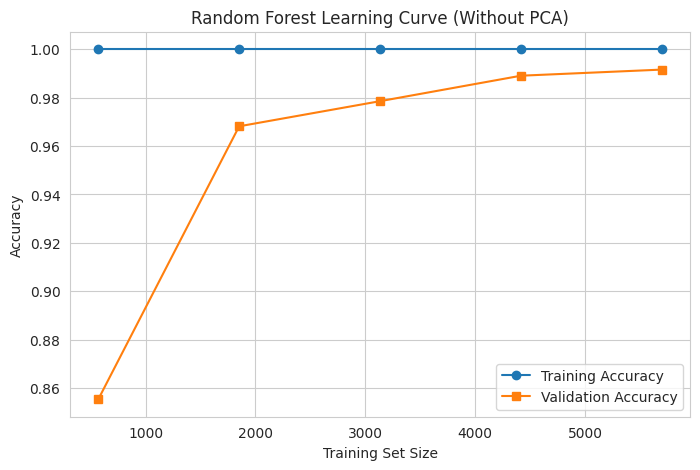

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

# Initialize the Random Forest Classifier
rf_no_pca = RandomForestClassifier(n_estimators=100, random_state=42)

# Train on resampled and scaled data
rf_no_pca.fit(X_train_resampled_scaled, y_train_resampled)

# Predictions
y_pred_test_no_pca = rf_no_pca.predict(X_test_scaled)
y_pred_val_no_pca = rf_no_pca.predict(X_validation_scaled)

# Evaluation
print("Random Forest WITHOUT PCA - Test Set")
print("Accuracy:", accuracy_score(y_test, y_pred_test_no_pca))
print(classification_report(y_test, y_pred_test_no_pca))

print("Random Forest WITHOUT PCA - Validation Set")
print("Accuracy:", accuracy_score(y_validation, y_pred_val_no_pca))
print(classification_report(y_validation, y_pred_val_no_pca))

# Plot Learning Curves
train_sizes, train_scores, val_scores = learning_curve(
    rf_no_pca, X_train_resampled_scaled, y_train_resampled, cv=5, scoring="accuracy", n_jobs=-1
)

train_mean = train_scores.mean(axis=1)
val_mean = val_scores.mean(axis=1)

plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_mean, label="Training Accuracy", marker="o")
plt.plot(train_sizes, val_mean, label="Validation Accuracy", marker="s")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("Random Forest Learning Curve (Without PCA)")
plt.legend()
plt.show()

###### **3.1.1 Regularization: Fixing Overfitting on Random Forest without PCA**

Random Forest WITHOUT PCA - Test Set
Accuracy: 0.9735099337748344
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       777
           1       1.00      0.90      0.95       280

    accuracy                           0.97      1057
   macro avg       0.98      0.95      0.96      1057
weighted avg       0.97      0.97      0.97      1057

Random Forest WITHOUT PCA - Validation Set
Accuracy: 0.978240302743614
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       776
           1       0.99      0.93      0.96       281

    accuracy                           0.98      1057
   macro avg       0.98      0.96      0.97      1057
weighted avg       0.98      0.98      0.98      1057



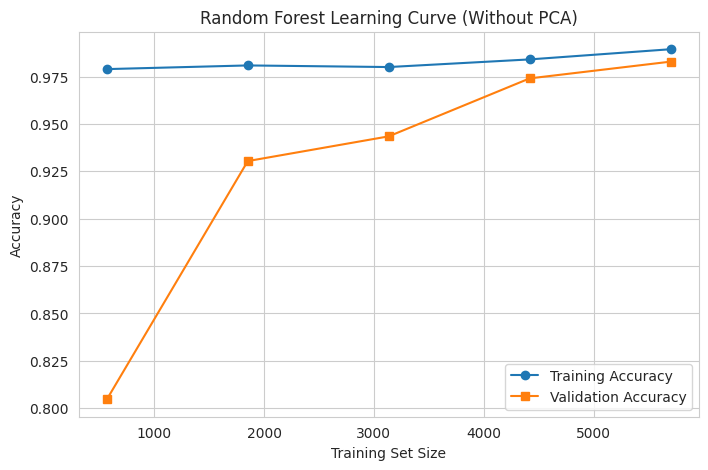

In [ ]:
rf_no_pca_fixed = RandomForestClassifier(
    n_estimators=100,       # Number of trees
    max_depth=10,           # Limit tree depth
    min_samples_split=10,   # Minimum samples to split
    min_samples_leaf=5,     # Minimum samples per leaf
    max_features='sqrt',    # Feature selection per split
    bootstrap=True,         # Random sampling
    random_state=42
)

rf_no_pca_fixed.fit(X_train_resampled_scaled, y_train_resampled)

# Predictions
y_pred_test_fixed = rf_no_pca_fixed.predict(X_test_scaled)
y_pred_val_fixed = rf_no_pca_fixed.predict(X_validation_scaled)

# Evaluation
print("Random Forest WITHOUT PCA - Test Set")
print("Accuracy:", accuracy_score(y_test, y_pred_test_fixed))
print(classification_report(y_test, y_pred_test_fixed))

print("Random Forest WITHOUT PCA - Validation Set")
print("Accuracy:", accuracy_score(y_validation, y_pred_val_fixed))
print(classification_report(y_validation, y_pred_val_fixed))

# Plot Learning Curves
train_sizes, train_scores, val_scores = learning_curve(
    rf_no_pca_fixed, X_train_resampled_scaled, y_train_resampled, cv=5, scoring="accuracy", n_jobs=-1
)

train_mean = train_scores.mean(axis=1)
val_mean = val_scores.mean(axis=1)

plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_mean, label="Training Accuracy", marker="o")
plt.plot(train_sizes, val_mean, label="Validation Accuracy", marker="s")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("Random Forest Learning Curve (Without PCA)")
plt.legend()
plt.show()

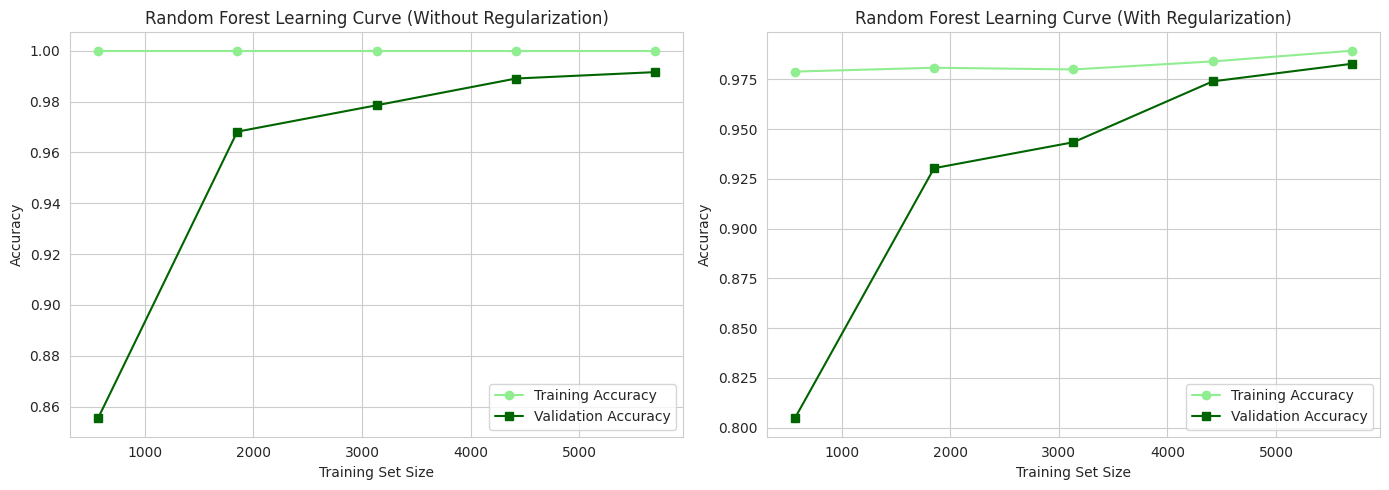

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Generate learning curve data for the model without regularization
train_sizes_no_reg, train_scores_no_reg, val_scores_no_reg = learning_curve(
    rf_no_pca, X_train_resampled_scaled, y_train_resampled, cv=5, scoring="accuracy", n_jobs=-1
)

# Generate learning curve data for the model with regularization
train_sizes_reg, train_scores_reg, val_scores_reg = learning_curve(
    rf_no_pca_fixed, X_train_resampled_scaled, y_train_resampled, cv=5, scoring="accuracy", n_jobs=-1
)

# Calculate mean scores for the model without regularization
train_mean_no_reg = train_scores_no_reg.mean(axis=1)
val_mean_no_reg = val_scores_no_reg.mean(axis=1)

# Calculate mean scores for the model with regularization
train_mean_reg = train_scores_reg.mean(axis=1)
val_mean_reg = val_scores_reg.mean(axis=1)

# Define custom colors (light green & dark green)
custom_colors = ['#90EE90', '#006400']

# Plot side by side
plt.figure(figsize=(14, 5))

# Plot for the model without regularization
plt.subplot(1, 2, 1)
plt.plot(train_sizes_no_reg, train_mean_no_reg, label="Training Accuracy", marker="o", color=custom_colors[0])
plt.plot(train_sizes_no_reg, val_mean_no_reg, label="Validation Accuracy", marker="s", color=custom_colors[1])
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("Random Forest Learning Curve (Without Regularization)")
plt.legend()

# Plot for the model with regularization
plt.subplot(1, 2, 2)
plt.plot(train_sizes_reg, train_mean_reg, label="Training Accuracy", marker="o", color=custom_colors[0])
plt.plot(train_sizes_reg, val_mean_reg, label="Validation Accuracy", marker="s", color=custom_colors[1])
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("Random Forest Learning Curve (With Regularization)")
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()

##### **3.2 Random Forest with PCA**

Random Forest WITH PCA - Test Set
Accuracy: 0.9612109744560076
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       777
           1       0.96      0.89      0.92       280

    accuracy                           0.96      1057
   macro avg       0.96      0.94      0.95      1057
weighted avg       0.96      0.96      0.96      1057

Random Forest WITH PCA - Validation Set
Accuracy: 0.9649952696310312
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       776
           1       0.95      0.92      0.93       281

    accuracy                           0.96      1057
   macro avg       0.96      0.95      0.95      1057
weighted avg       0.96      0.96      0.96      1057



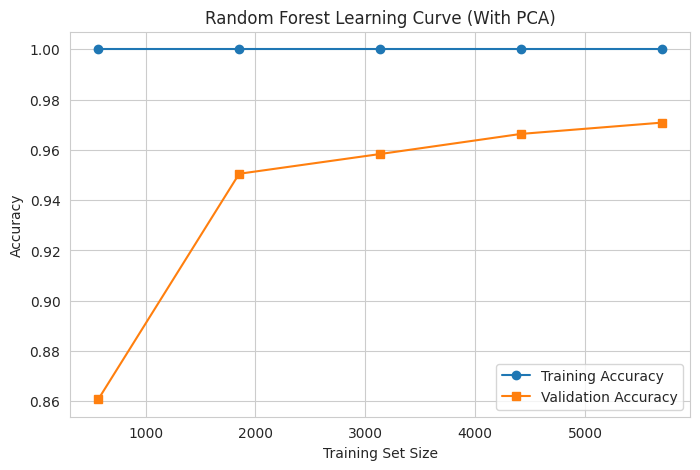

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)  # Adjust the components based on variance you want to retain
X_train_pca = pca.fit_transform(X_train_resampled_scaled)
X_validation_pca = pca.transform(X_validation_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Initialize the Random Forest Classifier
rf_with_pca = RandomForestClassifier(n_estimators=100, random_state=42)

# Train on resampled and scaled data (with PCA applied)
rf_with_pca.fit(X_train_pca, y_train_resampled)

# Predictions
y_pred_test_pca = rf_with_pca.predict(X_test_pca)
y_pred_val_pca = rf_with_pca.predict(X_validation_pca)

# Evaluation
print("Random Forest WITH PCA - Test Set")
print("Accuracy:", accuracy_score(y_test, y_pred_test_pca))
print(classification_report(y_test, y_pred_test_pca))

print("Random Forest WITH PCA - Validation Set")
print("Accuracy:", accuracy_score(y_validation, y_pred_val_pca))
print(classification_report(y_validation, y_pred_val_pca))

# Plot Learning Curves
train_sizes, train_scores, val_scores = learning_curve(
    rf_with_pca, X_train_pca, y_train_resampled, cv=5, scoring="accuracy", n_jobs=-1
)

train_mean = train_scores.mean(axis=1)
val_mean = val_scores.mean(axis=1)

plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_mean, label="Training Accuracy", marker="o")
plt.plot(train_sizes, val_mean, label="Validation Accuracy", marker="s")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("Random Forest Learning Curve (With PCA)")
plt.legend()
plt.show()

###### **3.2.1 Regularization: Fixing Overfitting on Random Forest with PCA**

Random Forest WITH PCA - Test Set
Accuracy: 0.9479659413434248
              precision    recall  f1-score   support

           0       0.94      0.99      0.97       777
           1       0.97      0.83      0.89       280

    accuracy                           0.95      1057
   macro avg       0.95      0.91      0.93      1057
weighted avg       0.95      0.95      0.95      1057

Random Forest WITH PCA - Validation Set
Accuracy: 0.9517502365184485
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       776
           1       0.97      0.85      0.90       281

    accuracy                           0.95      1057
   macro avg       0.96      0.92      0.94      1057
weighted avg       0.95      0.95      0.95      1057



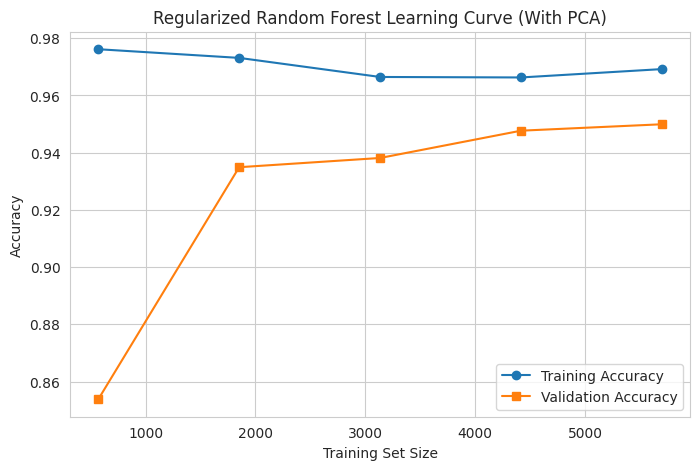

In [ ]:
# Define Regularized Random Forest Model
rf_with_pca_fixed = RandomForestClassifier(
    n_estimators=100,        # Number of trees
    max_depth=10,            # Limit tree depth
    min_samples_split=10,    # Minimum samples required to split
    min_samples_leaf=5,      # Minimum samples per leaf
    max_features='sqrt',     # Limit features at each split
    bootstrap=True,          # Use bootstrapping
    random_state=42
)

# Train on resampled and scaled data (with PCA applied)
rf_with_pca_fixed.fit(X_train_pca, y_train_resampled)

# Predictions
y_pred_test_pca = rf_with_pca_fixed.predict(X_test_pca)
y_pred_val_pca = rf_with_pca_fixed.predict(X_validation_pca)

# Evaluation
print("Random Forest WITH PCA - Test Set")
print("Accuracy:", accuracy_score(y_test, y_pred_test_pca))
print(classification_report(y_test, y_pred_test_pca))

print("Random Forest WITH PCA - Validation Set")
print("Accuracy:", accuracy_score(y_validation, y_pred_val_pca))
print(classification_report(y_validation, y_pred_val_pca))

# Plot Learning Curves
train_sizes, train_scores, val_scores = learning_curve(
    rf_with_pca_fixed, X_train_pca, y_train_resampled, cv=5, scoring="accuracy", n_jobs=-1
)

train_mean = train_scores.mean(axis=1)
val_mean = val_scores.mean(axis=1)

plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_mean, label="Training Accuracy", marker="o")
plt.plot(train_sizes, val_mean, label="Validation Accuracy", marker="s")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("Regularized Random Forest Learning Curve (With PCA)")
plt.legend()
plt.show()

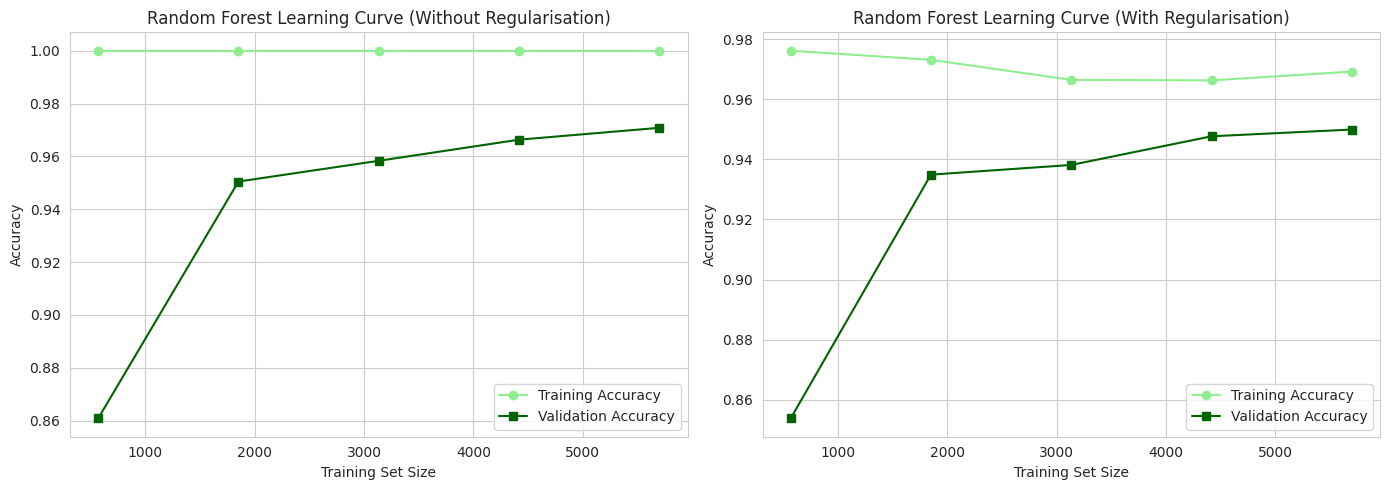

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Generate learning curve data for the model with PCA (without regularization)
train_sizes_pca, train_scores_pca, val_scores_pca = learning_curve(
    rf_with_pca, X_train_pca, y_train_resampled, cv=5, scoring="accuracy", n_jobs=-1
)

# Generate learning curve data for the model with PCA (with regularization)
train_sizes_pca_reg, train_scores_pca_reg, val_scores_pca_reg = learning_curve(
    rf_with_pca_fixed, X_train_pca, y_train_resampled, cv=5, scoring="accuracy", n_jobs=-1
)

# Calculate mean scores for the model with PCA (without regularization)
train_mean_pca = train_scores_pca.mean(axis=1)
val_mean_pca = val_scores_pca.mean(axis=1)

# Calculate mean scores for the model with PCA (with regularization)
train_mean_pca_reg = train_scores_pca_reg.mean(axis=1)
val_mean_pca_reg = val_scores_pca_reg.mean(axis=1)

# Plot side by side
plt.figure(figsize=(14, 5))

# Define custom colors (light green & dark green)
custom_colors = ['#90EE90', '#006400']

# Plot for the model with PCA (without regularization)
plt.subplot(1, 2, 1)
plt.plot(train_sizes_pca, train_mean_pca, label="Training Accuracy", marker="o", color=custom_colors[0])
plt.plot(train_sizes_pca, val_mean_pca, label="Validation Accuracy", marker="s", color=custom_colors[1])
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("Random Forest Learning Curve (Without Regularisation)")
plt.legend()

# Plot for the model with PCA (with regularization)
plt.subplot(1, 2, 2)
plt.plot(train_sizes_pca_reg, train_mean_pca_reg, label="Training Accuracy", marker="o", color=custom_colors[0])
plt.plot(train_sizes_pca_reg, val_mean_pca_reg, label="Validation Accuracy", marker="s", color=custom_colors[1])
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("Random Forest Learning Curve (With Regularisation)")
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()

##### **3.3 Comparison Summary**

Model Performance Comparison:-

Without PCA - Test Accuracy: 0.9792
With PCA    - Test Accuracy: 0.9480
Without PCA - Validation Accuracy: 0.9782
With PCA    - Validation Accuracy: 0.9518


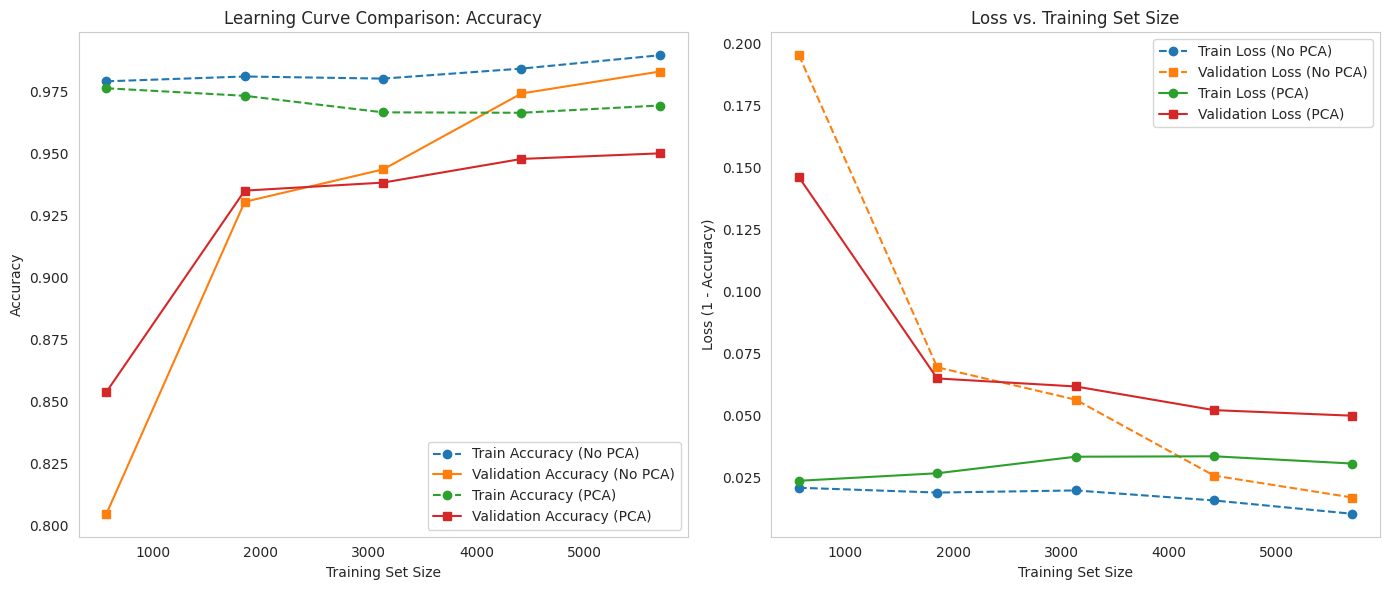

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import learning_curve
from sklearn.metrics import accuracy_score

# -----------------------
# Model Performance Comparison
# -----------------------
print("Model Performance Comparison:-\n")
print(f"Without PCA - Test Accuracy: {accuracy_score(y_test, y_pred_test_no_pca):.4f}")
print(f"With PCA    - Test Accuracy: {accuracy_score(y_test, y_pred_test_pca):.4f}")
print(f"Without PCA - Validation Accuracy: {accuracy_score(y_validation, y_pred_val_no_pca):.4f}")
print(f"With PCA    - Validation Accuracy: {accuracy_score(y_validation, y_pred_val_pca):.4f}")

# -----------------------
# Learning Curves (Accuracy vs Training Set Size)
# -----------------------
train_sizes, train_scores_no_pca, val_scores_no_pca = learning_curve(
    rf_no_pca_fixed, X_train_resampled_scaled, y_train_resampled, cv=5, scoring="accuracy", n_jobs=-1
)

train_sizes, train_scores_pca, val_scores_pca = learning_curve(
    rf_with_pca_fixed, X_train_pca, y_train_resampled, cv=5, scoring="accuracy", n_jobs=-1
)

train_mean_no_pca = train_scores_no_pca.mean(axis=1)
val_mean_no_pca = val_scores_no_pca.mean(axis=1)
train_mean_pca = train_scores_pca.mean(axis=1)
val_mean_pca = val_scores_pca.mean(axis=1)

train_loss_no_pca = 1 - train_mean_no_pca
val_loss_no_pca = 1 - val_mean_no_pca
train_loss_pca = 1 - train_mean_pca
val_loss_pca = 1 - val_mean_pca

# Create a figure with two subplots (side by side)
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Plot the accuracy curves on the first subplot
axs[0].plot(train_sizes, train_mean_no_pca, label="Train Accuracy (No PCA)", marker="o", linestyle="dashed")
axs[0].plot(train_sizes, val_mean_no_pca, label="Validation Accuracy (No PCA)", marker="s")
axs[0].plot(train_sizes, train_mean_pca, label="Train Accuracy (PCA)", marker="o", linestyle="dashed")
axs[0].plot(train_sizes, val_mean_pca, label="Validation Accuracy (PCA)", marker="s")
axs[0].set_xlabel("Training Set Size")
axs[0].set_ylabel("Accuracy")
axs[0].set_title("Learning Curve Comparison: Accuracy")
axs[0].legend()
axs[0].grid()

# Plot the loss curves on the second subplot
axs[1].plot(train_sizes, train_loss_no_pca, label="Train Loss (No PCA)", marker="o", linestyle="--")
axs[1].plot(train_sizes, val_loss_no_pca, label="Validation Loss (No PCA)", marker="s", linestyle="--")
axs[1].plot(train_sizes, train_loss_pca, label="Train Loss (PCA)", marker="o")
axs[1].plot(train_sizes, val_loss_pca, label="Validation Loss (PCA)", marker="s")
axs[1].set_xlabel("Training Set Size")
axs[1].set_ylabel("Loss (1 - Accuracy)")
axs[1].set_title("Loss vs. Training Set Size")
axs[1].legend()
axs[1].grid()

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

##### **3.4 Checking Feature Importance & Dropping Negligible Important Features**

                                                    Importance
Feature                                                       
Satisfaction Score                                       0.42%
Contract                                                 0.11%
Churn Reason_Attitude of support person                  0.05%
Churn Reason_Competitor made better offer                0.05%
Number of Referrals                                      0.05%
Revenue_per_Month                                        0.02%
Churn Reason_Competitor offered more data                0.02%
Number of Dependents                                     0.02%
Dependents                                               0.02%
Payment Method                                           0.02%
Churn Reason_Competitor offered higher download...       0.02%
Monthly Charge                                           0.01%
Churn Reason_Don't know                                  0.01%
Churn Reason_Long distance charges                     

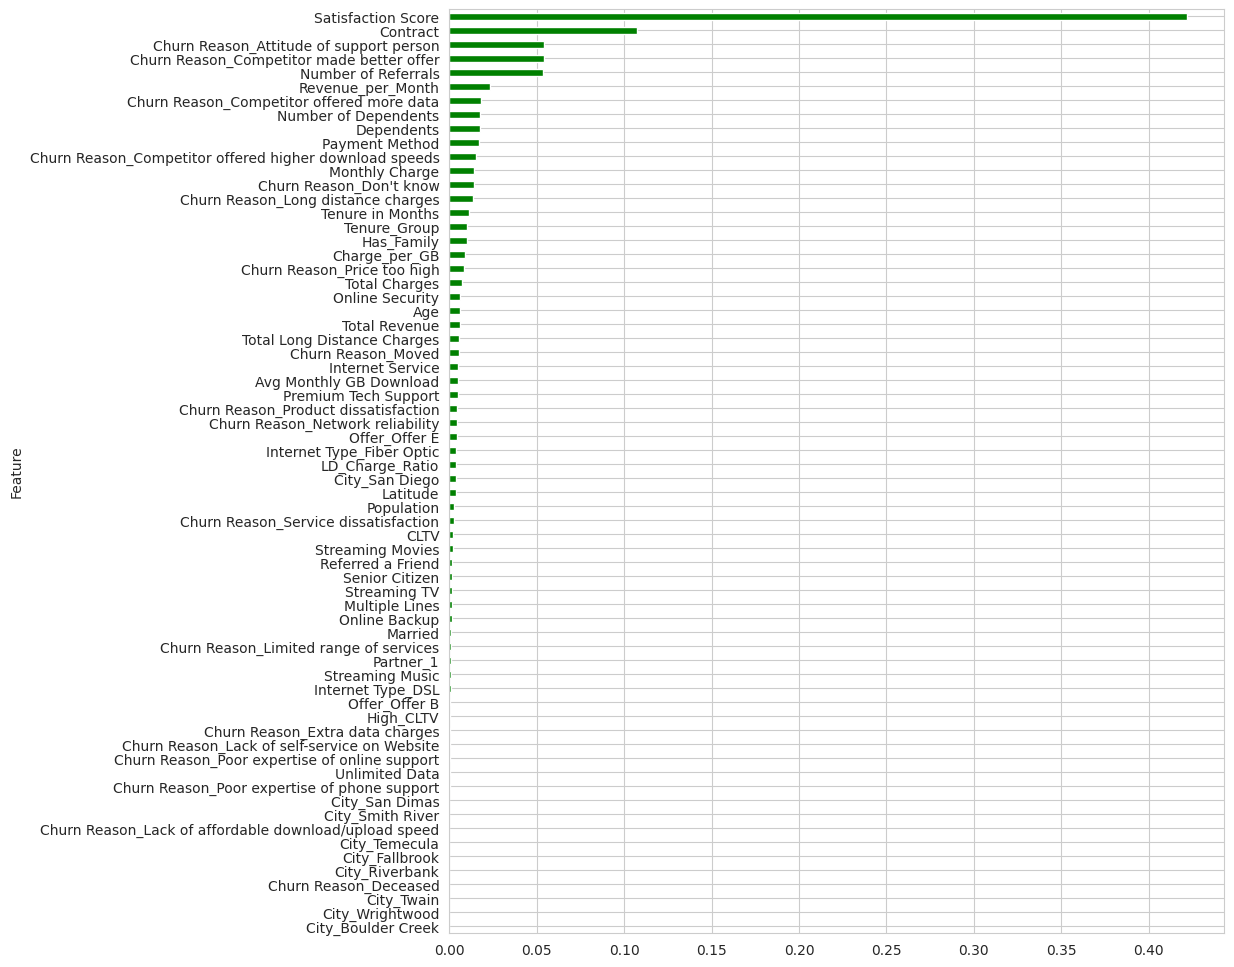

(7127, 38) (1057, 38) (1057, 38)


In [ ]:
# Before scaling, store feature names
feature_names = X_train_resampled.columns  # Original feature names before scaling

# Convert the scaled arrays back to DataFrames
X_train_resampled_scaled = pd.DataFrame(X_train_resampled_scaled, columns=feature_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=feature_names)
X_validation_scaled = pd.DataFrame(X_validation_scaled, columns=feature_names)

# Extract feature importances directly from the model
feature_importance = rf_no_pca_fixed.feature_importances_

# Create a DataFrame to match the feature importances with the feature names in X_train
feature_df = pd.DataFrame({
    'Feature': X_train_resampled_scaled.columns,  # Use X_train.columns to match the features used for training
    'Importance': feature_importance
})

# Sort by importance
feature_df = feature_df.sort_values(by='Importance', ascending=False)

# Set 'Feature' as the index for better visualization
feature_df.set_index('Feature', inplace=True)

# Show all rows in the output
pd.set_option("display.max_rows", None)

# Print the entire feature importance DataFrame
print(feature_df)

# Plot feature importances as a horizontal bar plot (features on the y-axis)
plt.figure(figsize=(10, 12))  # Adjust the figure size for better readability
feature_df['Importance'].plot(kind='barh', color='green')

# Invert the y-axis to have the most important features on top
plt.gca().invert_yaxis()

# Save the plot as a PNG file
plt.savefig("feature_importance.png", dpi=300)

# Show the plot
plt.show()

# List of features you want to remove manually (those with zero importance)
features_to_remove = ['CLTV', 'Streaming Movies', 'Referred a Friend', 'Senior Citizen', 'Streaming TV',
                      'Multiple Lines', 'Online Backup', 'Married', 'Churn Reason_Limited range of services',
                      'Partner_1', 'Streaming Music', 'Internet Type_DSL', 'Offer_Offer B', 'High_CLTV',
                      'Churn Reason_Extra data charges', 'Churn Reason_Lack of self-service on Website',
                      'Churn Reason_Poor expertise of online support', 'Unlimited Data',
                      'Churn Reason_Poor expertise of phone support', 'City_San Dimas', 'City_Smith River',
                      'Churn Reason_Lack of affordable download/upload', 'City_Temecula', 'City_Fallbrook',
                      'City_Riverbank', 'Churn Reason_Deceased', 'City_Twain', 'City_Wrightwood',
                      'City_Boulder Creek']

# Filter out the features to remove
features_to_keep = feature_df[~feature_df.index.isin(features_to_remove)].index

# Now filter the train, test, and validation sets
X_train_filtered = X_train_resampled_scaled[features_to_keep]
X_test_filtered = X_test_scaled[features_to_keep]
X_validation_filtered = X_validation_scaled[features_to_keep]

# Check the shapes of the filtered datasets
print(X_train_filtered.shape, X_test_filtered.shape, X_validation_filtered.shape)

#### **3. Gradient Boosting Model (XGBoost)**

XGBoost Model - Classification Report
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       777
           1       1.00      0.91      0.95       280

    accuracy                           0.98      1057
   macro avg       0.98      0.96      0.97      1057
weighted avg       0.98      0.98      0.98      1057



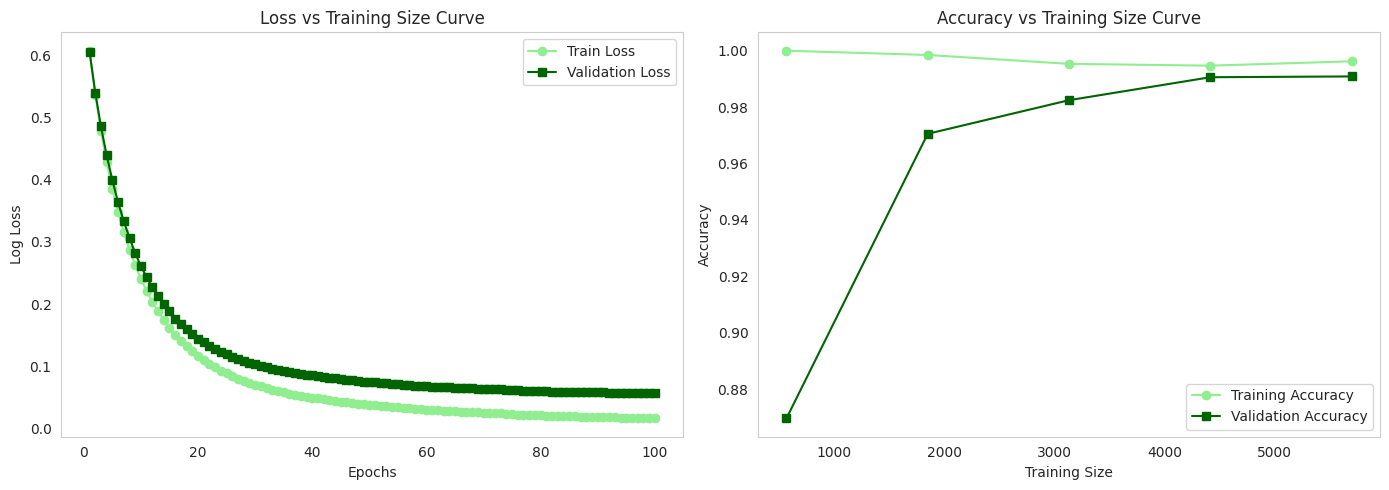

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import learning_curve

# Initialize XGBoost Classifier
xgb_model = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    random_state=42,
    eval_metric="logloss",
    use_label_encoder=False,
    verbosity=0
)

# Define evaluation set
eval_set = [(X_train_filtered, y_train_resampled), (X_test_filtered, y_test)]

# Train the model
xgb_model.fit(X_train_filtered, y_train_resampled, eval_set=eval_set, verbose=False)

# Retrieve training results
results = xgb_model.evals_result()

# Extract log loss values
train_loss = results['validation_0']['logloss']
val_loss = results['validation_1']['logloss']

# Generate Predictions
y_pred_xgb = xgb_model.predict(X_test_filtered)

# Print Classification Report
print("XGBoost Model - Classification Report")
print(classification_report(y_test, y_pred_xgb))

# Generate learning curve data
train_sizes, train_scores, val_scores = learning_curve(
    xgb_model, X_train_filtered, y_train_resampled, cv=5, scoring="accuracy", n_jobs=-1
)

# Compute mean accuracy scores
train_mean = np.mean(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)

# Create side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Define custom colors (light green & dark green)
custom_colors = ['#90EE90', '#006400']

# Plot Log Loss vs Training Size
axes[0].plot(range(1, len(train_loss) + 1), train_loss, label="Train Loss", marker='o', color=custom_colors[0])
axes[0].plot(range(1, len(val_loss) + 1), val_loss, label="Validation Loss", marker='s', color=custom_colors[1])
axes[0].set_xlabel("Epochs")
axes[0].set_ylabel("Log Loss")
axes[0].set_title("Loss vs Training Size Curve")
axes[0].legend()
axes[0].grid()

# Plot Accuracy vs Training Size
axes[1].plot(train_sizes, train_mean, label="Training Accuracy", marker="o", color=custom_colors[0])
axes[1].plot(train_sizes, val_mean, label="Validation Accuracy", marker="s", color=custom_colors[1])
axes[1].set_xlabel("Training Size")
axes[1].set_ylabel("Accuracy")
axes[1].set_title("Accuracy vs Training Size Curve")
axes[1].legend()
axes[1].grid()

plt.tight_layout()
plt.show()

#### **4. K-Means Clustering Model**

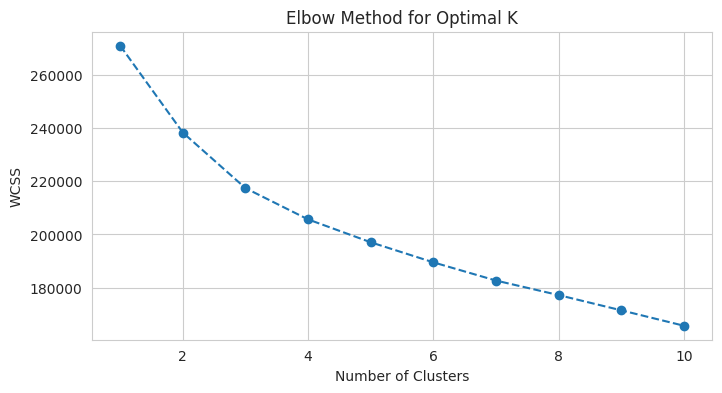

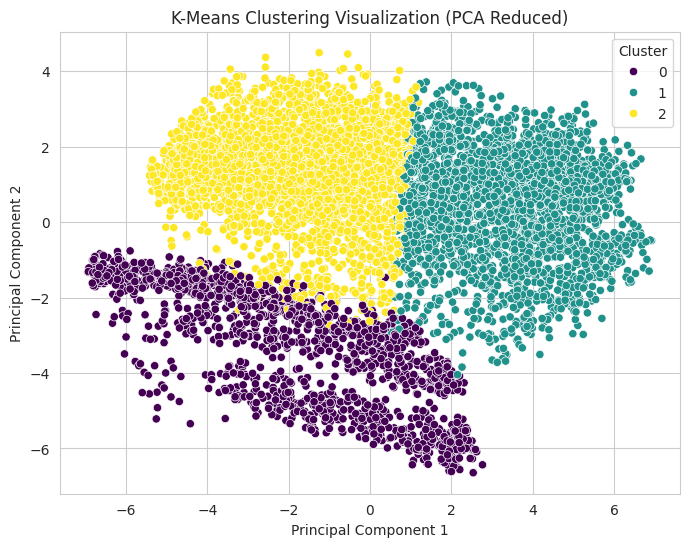

In [ ]:
from sklearn.cluster import KMeans

# Finding the optimal number of clusters using the elbow method
wcss = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_train_filtered)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(k_values, wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal K')
plt.show()

# Fit K-Means with optimal K
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X)

# Visualizing clusters using PCA for dimensionality reduction
pca_2d = PCA(n_components=2)
df_pca = pca_2d.fit_transform(X)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=df['Cluster'], palette='viridis')
plt.title('K-Means Clustering Visualization (PCA Reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(X, df['Cluster'])
print(f'Silhouette Score: {silhouette_avg:.3f}')

Silhouette Score: 0.177


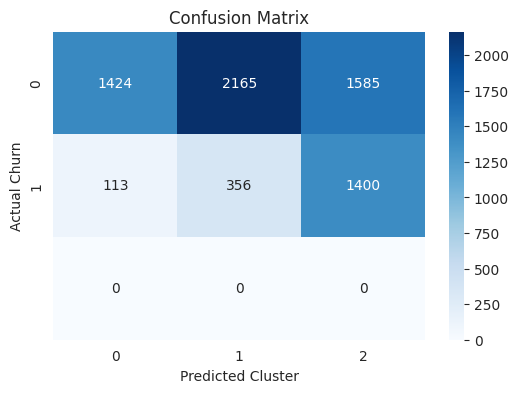

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Assuming 'Churn' is the actual target variable
cm = confusion_matrix(y, df['Cluster'])

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(df['Cluster']), yticklabels=np.unique(y))
plt.xlabel('Predicted Cluster')
plt.ylabel('Actual Churn')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
from scipy.stats import mode

# Map each cluster to the most frequent actual label
cluster_labels = np.zeros_like(df['Cluster'])

for cluster in np.unique(df['Cluster']):
    mask = df['Cluster'] == cluster
    cluster_labels[mask] = mode(y[mask])[0]  # Assign majority class in the cluster

# Classification report comparing assigned labels vs actual churn labels
print(classification_report(y, cluster_labels, zero_division=1))

              precision    recall  f1-score   support

           0       0.73      1.00      0.85      5174
           1       1.00      0.00      0.00      1869

    accuracy                           0.73      7043
   macro avg       0.87      0.50      0.42      7043
weighted avg       0.81      0.73      0.62      7043



#### **5.  Multilayer Perceptron Model (MLP)**

This feedforward neural network is suitable for classification tasks like churn prediction, where you want to predict binary outcomes (e.g., churn/no churn)

In [ ]:
pip install tensorflow-cpu

###### **5.1 Simple MLP Model**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import accuracy_score, classification_report

# Build a weaker Simple MLP model
mlp_model = Sequential([
    Dense(16, input_dim=X_train_filtered.shape[1], activation='relu'),  # Reduced neurons
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile with SGD and a lower learning rate
mlp_model.compile(optimizer=SGD(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model for fewer epochs
mlp_model.fit(X_train_filtered, y_train_resampled, epochs=5, batch_size=16, validation_data=(X_test_filtered, y_test))

# Predict on test set
y_pred = (mlp_model.predict(X_test_filtered) > 0.5).astype(int)

# Evaluate the model
print("MLP Model - Test Set Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
446/446 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6845 - loss: 0.5725 - val_accuracy: 0.8893 - val_loss: 0.3008
Epoch 2/5
446/446 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9365 - loss: 0.2183 - val_accuracy: 0.9489 - val_loss: 0.1686
Epoch 3/5
446/446 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9701 - loss: 0.1241 - val_accuracy: 0.9688 - val_loss: 0.1168
Epoch 4/5
446/446 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9795 - loss: 0.0845 - val_accuracy: 0.9745 - val_loss: 0.0920
Epoch 5/5
446/446 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9851 - loss: 0.0625 - val_accuracy: 0.9745 - val_loss: 0.0795
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
MLP Model - Test Set Accuracy: 0.9744560075685903
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       777
           1       0.99      0.91      0.95       280

    accuracy                           0.97      1057
   macro avg       0.98      0.96      0.97      1057
weig

###### **5.2 Deep MLP Model**

In [ ]:
# Build the Deep MLP model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
deep_mlp_model = Sequential([
    Dense(128, activation='relu', input_dim=X_train_filtered.shape[1]),
    BatchNormalization(),
    Dropout(0.3),

    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile model
deep_mlp_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train model
history = deep_mlp_model.fit(X_train_filtered, y_train_resampled, epochs=20, batch_size=32, validation_data=(X_test_filtered, y_test))

# Predictions
y_pred = (deep_mlp_model.predict(X_test_filtered) > 0.5).astype(int)

# Model evaluation
from sklearn.metrics import accuracy_score, classification_report

print("Test Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
223/223 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7768 - loss: 0.4480 - val_accuracy: 0.9782 - val_loss: 0.0706
Epoch 2/20
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9615 - loss: 0.1042 - val_accuracy: 0.9754 - val_loss: 0.0729
Epoch 3/20
223/223 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9773 - loss: 0.0706 - val_accuracy: 0.9773 - val_loss: 0.0570
Epoch 4/20
223/223 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9751 - loss: 0.0769 - val_accuracy: 0.9782 - val_loss: 0.0552
Epoch 5/20
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9824 - loss: 0.0551 - val_accuracy: 0.9801 - val_loss: 0.0582
Epoch 6/20
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9856 - loss: 0.0493 - val_accuracy: 0.9782 - val_loss: 0.0543
Epoch 7/20
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9842 - loss: 0.0477 - val_accuracy: 0.9792 - val_loss: 0.0636
Epoch 8/20
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9814 - loss: 0.0508 - val_accuracy: 0.

###### **5.3 Comparison: Simple MLP vs Deep MLP**

Epoch 1/10
446/446 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9843 - loss: 0.0539 - val_accuracy: 0.9754 - val_loss: 0.0723
Epoch 2/10
446/446 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9886 - loss: 0.0451 - val_accuracy: 0.9763 - val_loss: 0.0682
Epoch 3/10
446/446 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9890 - loss: 0.0410 - val_accuracy: 0.9763 - val_loss: 0.0645
Epoch 4/10
446/446 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9879 - loss: 0.0385 - val_accuracy: 0.9773 - val_loss: 0.0619
Epoch 5/10
446/446 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9915 - loss: 0.0312 - val_accuracy: 0.9782 - val_loss: 0.0593
Epoch 6/10
446/446 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9905 - loss: 0.0313 - val_accuracy: 0.9792 - val_loss: 0.0590
Epoch 7/10
446/446 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9912 - loss: 0.0298 - val_accuracy: 0.9792 - val_loss: 0.0569
Epoch 8/10
446/446 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9894 - loss: 0.0322 - val_accuracy: 0.

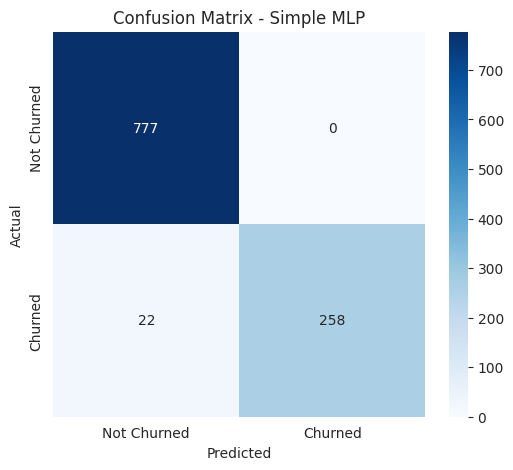

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
🔹 Deep MLP - Test Accuracy: 0.9849


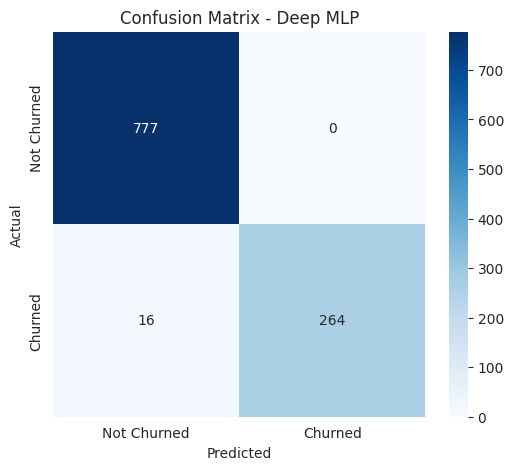

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


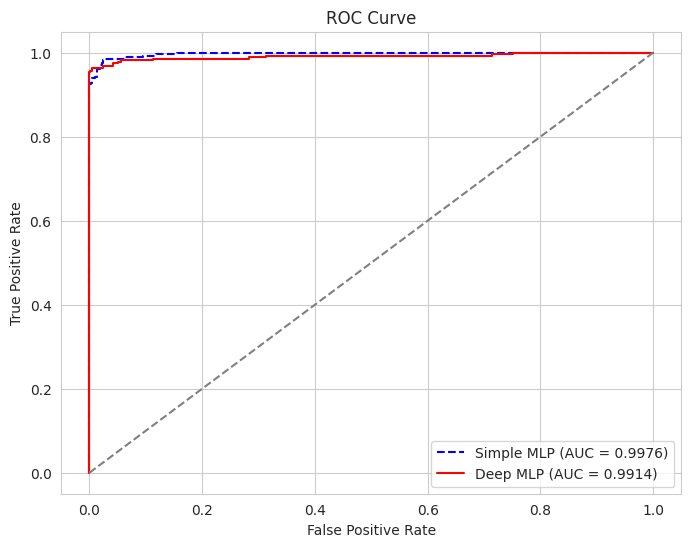

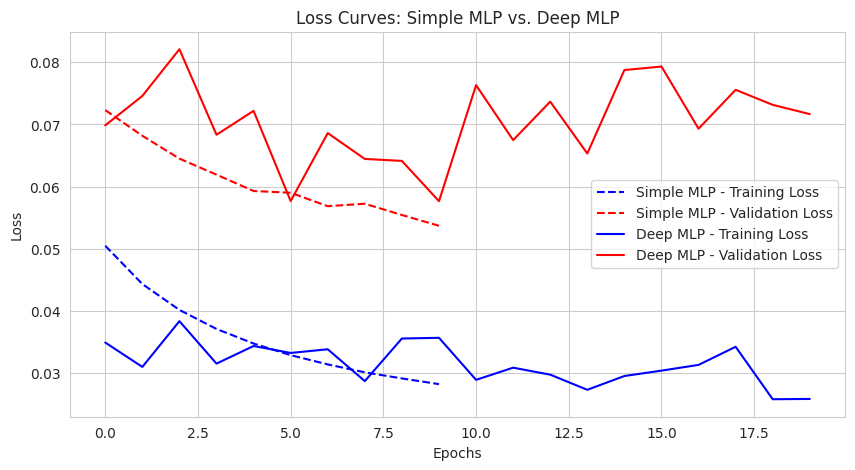

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc

# Train both models and store history
mlp_history = mlp_model.fit(X_train_filtered, y_train_resampled, epochs=10, batch_size=16, validation_data=(X_test_filtered, y_test))
deep_mlp_history = deep_mlp_model.fit(X_train_filtered, y_train_resampled, epochs=20, batch_size=32, validation_data=(X_test_filtered, y_test))

# Function to evaluate model and plot confusion matrix
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = (model.predict(X_test_filtered) > 0.5).astype(int)
    accuracy = accuracy_score(y_test, y_pred)

    print(f"🔹 {model_name} - Test Accuracy: {accuracy:.4f}")

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Churned', 'Churned'], yticklabels=['Not Churned', 'Churned'])
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Compute ROC curve
    y_prob = model.predict(X_test_filtered)
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    return accuracy, fpr, tpr, roc_auc

# Evaluate both models and plot confusion matrices
mlp_acc, mlp_fpr, mlp_tpr, mlp_auc = evaluate_model(mlp_model, X_test_filtered, y_test, "Simple MLP")
deep_acc, deep_fpr, deep_tpr, deep_auc = evaluate_model(deep_mlp_model, X_test_filtered, y_test, "Deep MLP")

# 🔹 Plot ROC Curves
plt.figure(figsize=(8, 6))
plt.plot(mlp_fpr, mlp_tpr, label=f'Simple MLP (AUC = {mlp_auc:.4f})', linestyle='--', color='blue')
plt.plot(deep_fpr, deep_tpr, label=f'Deep MLP (AUC = {deep_auc:.4f})', linestyle='-', color='red')
plt.plot([0, 1], [0, 1], linestyle='dashed', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# 🔹 Plot Loss Curves for both models
plt.figure(figsize=(10, 5))

# Plot Simple MLP Loss
plt.plot(mlp_history.history['loss'], label='Simple MLP - Training Loss', linestyle='dashed', color='blue')
plt.plot(mlp_history.history['val_loss'], label='Simple MLP - Validation Loss', linestyle='dashed', color='red')

# Plot Deep MLP Loss
plt.plot(deep_mlp_history.history['loss'], label='Deep MLP - Training Loss', color='blue')
plt.plot(deep_mlp_history.history['val_loss'], label='Deep MLP - Validation Loss', color='red')

plt.title('Loss Curves: Simple MLP vs. Deep MLP')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

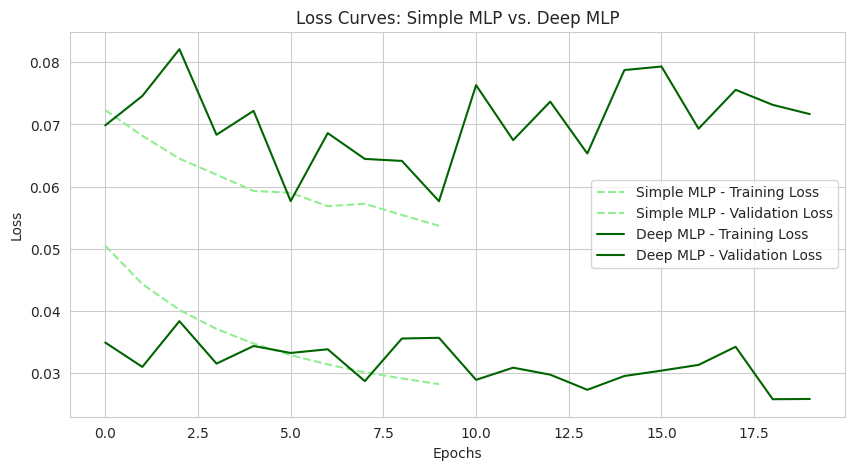

In [ ]:
# Plot Loss Curves for both models
plt.figure(figsize=(10, 5))

# Define custom colors (light green & dark green)
custom_colors = ['#90EE90', '#006400']

# Plot Simple MLP Loss
plt.plot(mlp_history.history['loss'], label='Simple MLP - Training Loss', linestyle='dashed', color=custom_colors[0])
plt.plot(mlp_history.history['val_loss'], label='Simple MLP - Validation Loss', linestyle='dashed', color=custom_colors[0])

# Plot Deep MLP Loss
plt.plot(deep_mlp_history.history['loss'], label='Deep MLP - Training Loss', color=custom_colors[1])
plt.plot(deep_mlp_history.history['val_loss'], label='Deep MLP - Validation Loss', color=custom_colors[1])

plt.title('Loss Curves: Simple MLP vs. Deep MLP')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

###### **5.4 Regularization: Fixing Overfitting of Deep MLP Model**

A high learning rate can cause the model to overshoot the optimal minima, leading to large fluctuations in the loss. Reducing the learning rate to allow the model to converge more smoothly.

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


223/223 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.5481 - loss: 2.7630 - val_accuracy: 0.8070 - val_loss: 2.3004
Epoch 2/20
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7809 - loss: 2.2722 - val_accuracy: 0.9319 - val_loss: 2.0037
Epoch 3/20
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8516 - loss: 2.0768 - val_accuracy: 0.9489 - val_loss: 1.8543
Epoch 4/20
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9057 - loss: 1.9032 - val_accuracy: 0.9603 - val_loss: 1.7343
Epoch 5/20
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9266 - loss: 1.7766 - val_accuracy: 0.9669 - val_loss: 1.6287
Epoch 6/20
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9450 - loss: 1.6543 - val_accuracy: 0.9726 - val_loss: 1.5273
Epoch 7/20
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9516 - loss: 1.5489 - val_accuracy: 0.9726 - val_loss: 1.4285
Epoch 8/20
223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9541 - loss: 1.4524 - val_accuracy: 0.9745 - val_

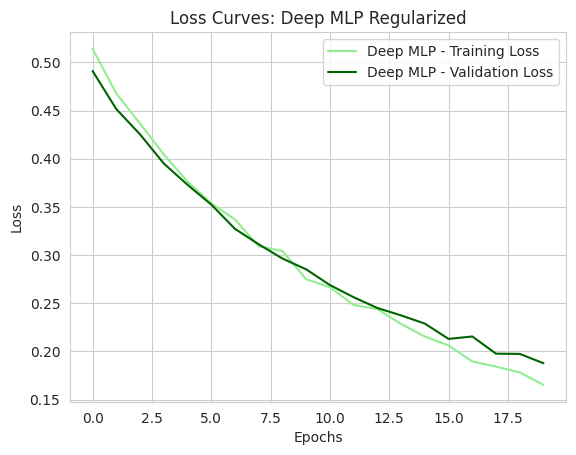

In [ ]:
from tensorflow.keras import regularizers

deep_mlp_model_regularized = Sequential([
    Dense(128, activation='relu', input_dim=X_train_filtered.shape[1],
          kernel_regularizer=regularizers.l2(0.01)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile model
deep_mlp_model_regularized.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Train model
history = deep_mlp_model_regularized.fit(X_train_filtered, y_train_resampled, epochs=20, batch_size=32, validation_data=(X_test_filtered, y_test))

# Predictions
y_pred_mlp = (deep_mlp_model_regularized.predict(X_test_filtered) > 0.5).astype(int)

# Model evaluation
from sklearn.metrics import accuracy_score, classification_report

print("Test Accuracy:", accuracy_score(y_test, y_pred_mlp))
print(classification_report(y_test, y_pred_mlp))

deep_mlp_history = deep_mlp_model_regularized.fit(X_train_filtered, y_train_resampled, epochs=20, batch_size=32, validation_data=(X_test_filtered, y_test))

# Define custom colors (light green & dark green)
custom_colors = ['#90EE90', '#006400']

# Plot Deep MLP Loss
plt.plot(deep_mlp_history.history['loss'], label='Deep MLP - Training Loss', color=custom_colors[0])
plt.plot(deep_mlp_history.history['val_loss'], label='Deep MLP - Validation Loss', color=custom_colors[1])

plt.title('Loss Curves: Deep MLP Regularized')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### **6. TabNet Model**

In [ ]:
!pip install pytorch-tabnet

In [ ]:
import torch
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# Assuming X_train_filtered and y_train_resampled are your preprocessed data
X_train = X_train_filtered
X_test = X_test_filtered
y_train = y_train_resampled
y_test = y_test

# Scale the data (TabNet benefits from scaling)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert to NumPy arrays
X_train = np.array(X_train, dtype=np.float32)
X_test = np.array(X_test, dtype=np.float32)

# If y_train and y_test are already NumPy arrays, no need for .values
y_train = np.array(y_train, dtype=np.float32)
y_test = np.array(y_test, dtype=np.float32)

# Initialize TabNet model
tabnet_model = TabNetClassifier(
    n_d=8,  # The number of decision steps
    n_a=8,  # The number of attention steps
    n_steps=3,  # The number of steps
    gamma=1.5,  # This is a regularization parameter
    lambda_sparse=1e-5,  # Sparsity regularization
    optimizer_fn=torch.optim.Adam,
    optimizer_params=dict(lr=2e-2),
    mask_type="sparsemax",  # Choose between "sparsemax" or "entmax"
)

# Train the model and log training metrics
tabnet_model.fit(
    X_train=X_train, y_train=y_train,
    eval_set=[(X_test, y_test)],
    max_epochs=100,
    patience=10,
    batch_size=256,
    virtual_batch_size=128,
    num_workers=1,
    drop_last=False,
)

# Make predictions
y_pred_tabnet = tabnet_model.predict(X_test)

# Convert predictions to binary labels (for binary classification)
y_pred_binary = (y_pred_tabnet > 0.5).astype(int)

# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report
print("Test Accuracy:", accuracy_score(y_test, y_pred_binary))
print(classification_report(y_test, y_pred_binary))

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.54156 | val_0_auc: 0.9367  |  0:00:03s
epoch 1  | loss: 0.17518 | val_0_auc: 0.97843 |  0:00:06s
epoch 2  | loss: 0.10562 | val_0_auc: 0.98272 |  0:00:07s
epoch 3  | loss: 0.09213 | val_0_auc: 0.99091 |  0:00:09s
epoch 4  | loss: 0.07555 | val_0_auc: 0.9914  |  0:00:11s
epoch 5  | loss: 0.06723 | val_0_auc: 0.99081 |  0:00:13s
epoch 6  | loss: 0.06034 | val_0_auc: 0.99086 |  0:00:16s
epoch 7  | loss: 0.04639 | val_0_auc: 0.99202 |  0:00:20s
epoch 8  | loss: 0.04981 | val_0_auc: 0.99129 |  0:00:22s
epoch 9  | loss: 0.04513 | val_0_auc: 0.99263 |  0:00:24s
epoch 10 | loss: 0.03796 | val_0_auc: 0.99485 |  0:00:26s
epoch 11 | loss: 0.03534 | val_0_auc: 0.99231 |  0:00:29s
epoch 12 | loss: 0.03719 | val_0_auc: 0.99552 |  0:00:32s
epoch 13 | loss: 0.04015 | val_0_auc: 0.9946  |  0:00:34s
epoch 14 | loss: 0.03342 | val_0_auc: 0.99589 |  0:00:35s
epoch 15 | loss: 0.03023 | val_0_auc: 0.99404 |  0:00:38s
epoch 16 | loss: 0.02843 | val_0_auc: 0.99334 |  0:00:40s
epoch 17 | los

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Test Accuracy: 0.978240302743614
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99       777
         1.0       1.00      0.92      0.96       280

    accuracy                           0.98      1057
   macro avg       0.99      0.96      0.97      1057
weighted avg       0.98      0.98      0.98      1057



###### **6.1 Visualizing Performance: Learning Curves**

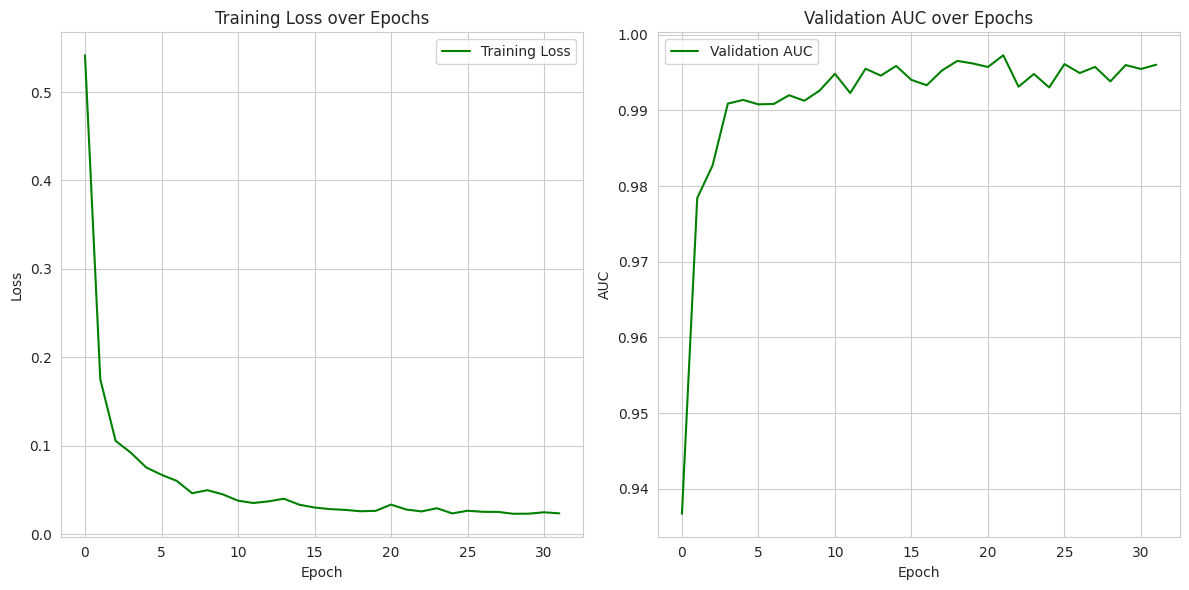

In [ ]:
# Plot Learning Curves for Loss and AUC

# Extract the metrics from the training history
train_loss = tabnet_model.history['loss']
valid_auc = tabnet_model.history['val_0_auc']

# Plot the Learning Curves
plt.figure(figsize=(12, 6))

# Plot Training and Validation Loss
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss', color='green')
plt.title('Training Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot Validation AUC
plt.subplot(1, 2, 2)
plt.plot(valid_auc, label='Validation AUC', color='green')
plt.title('Validation AUC over Epochs')
plt.xlabel('Epoch')
plt.ylabel('AUC')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()

###### **6.2 SHAP Visualization: Feature Importance**

  0%|          | 0/100 [00:00<?, ?it/s]

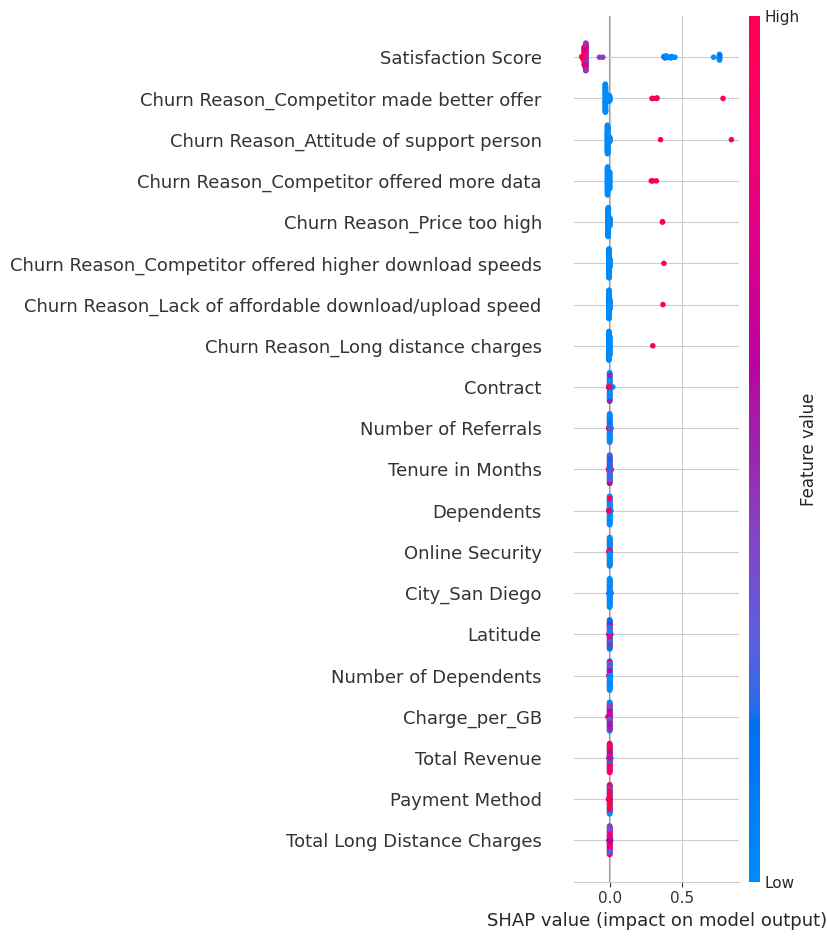

In [ ]:
import shap
import numpy as np

# Create a wrapper function to make predictions
def predict_fn(X):
    # Ensure your input is in the right format and use your trained TabNet model
    X_tensor = torch.tensor(X, dtype=torch.float32)
    return tabnet_model.predict(X_tensor)

# Define a list of feature names (ensure this matches your data)
feature_names = X_train_filtered.columns.tolist()

# Create a SHAP explainer using the wrapper function
explainer = shap.KernelExplainer(predict_fn, X_train[:100], feature_names=feature_names)  # You can use a subset of your data for efficiency

# Generate SHAP values
shap_values = explainer.shap_values(X_train[:100])  # Pass a sample subset of your data

# Visualize the SHAP values (example for a summary plot)
shap.summary_plot(shap_values, X_train[:100], feature_names=feature_names)

#### **7. Comparing Performance of Models**

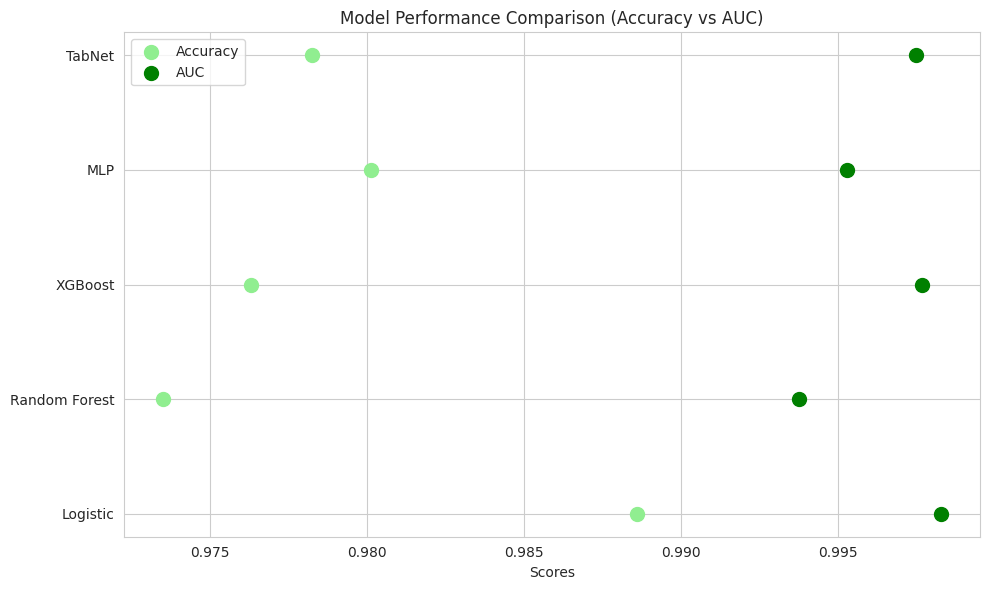

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data for models, accuracies, and AUC scores
models = ['Logistic', 'Random Forest', 'XGBoost', 'MLP', 'TabNet']
accuracies = [0.9886, 0.97350, 0.9763, 0.98013, 0.97824]  # Accuracy on Test Set
auc_scores = [0.9983, 0.99376, 0.9977, 0.99531, 0.99750]  # AUC scores

# Create figure
fig, ax = plt.subplots(figsize=(10, 6))

# Plot Accuracy as dots
ax.scatter(accuracies, models, label='Accuracy', color='lightgreen', s=100, zorder=5)

# Plot AUC scores as dots
ax.scatter(auc_scores, models, label='AUC', color='green', s=100, zorder=5)

# Add labels, title and axis settings
ax.set_xlabel('Scores')
ax.set_title('Model Performance Comparison (Accuracy vs AUC)')
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()

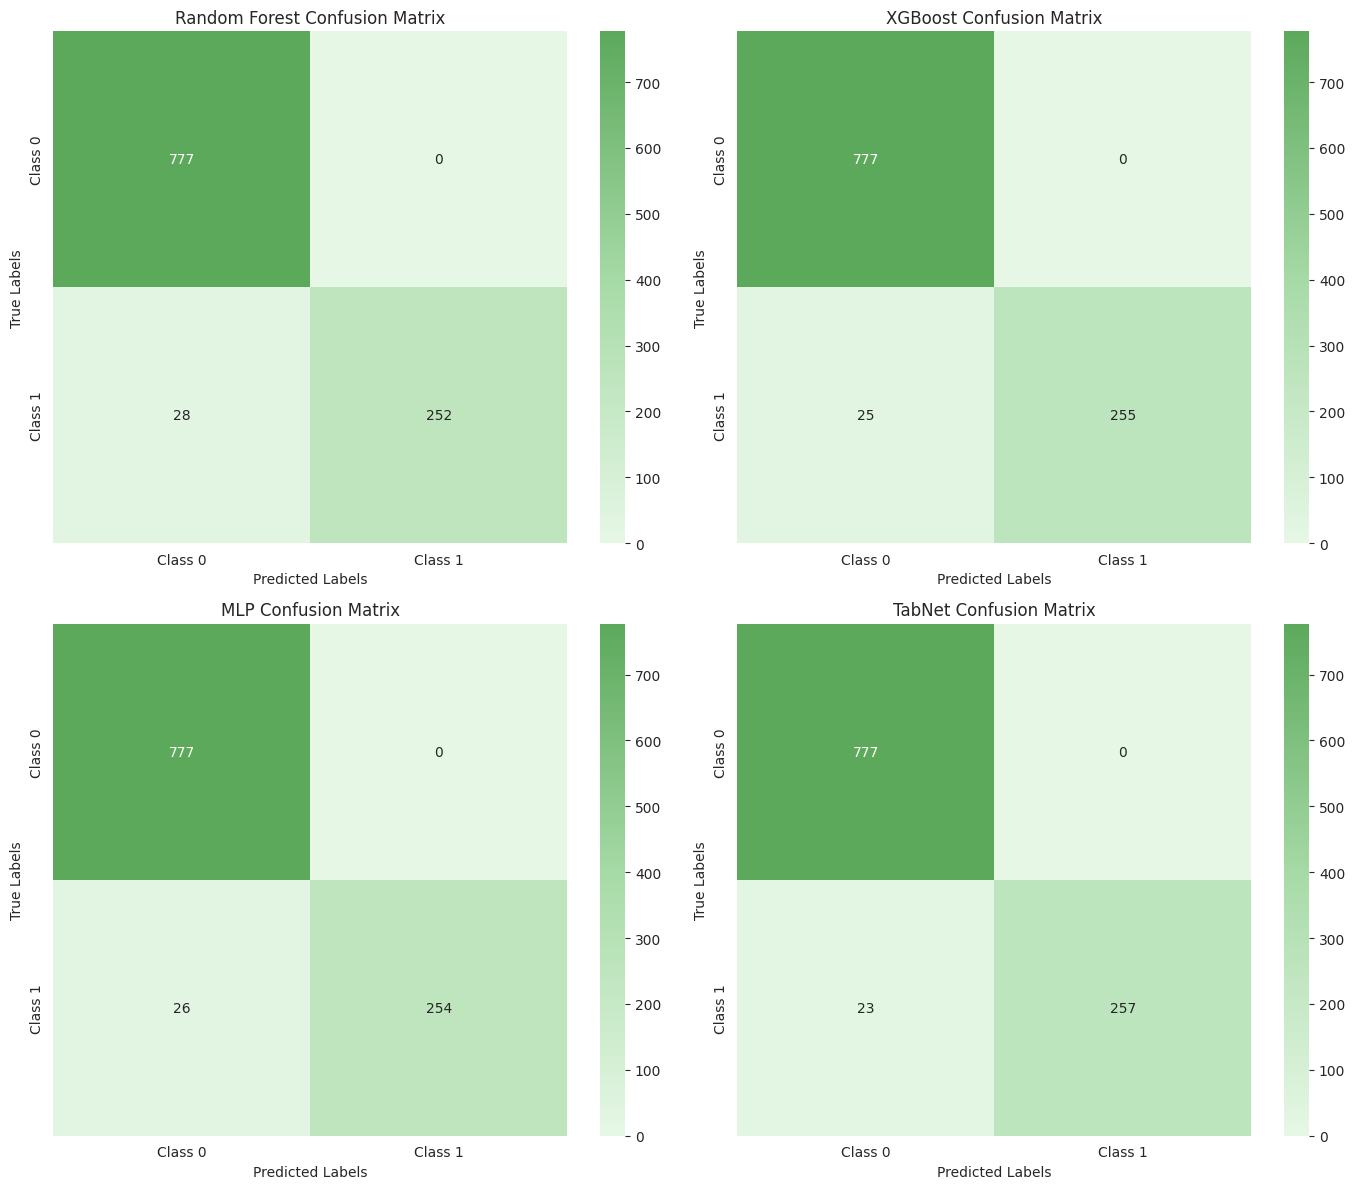

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from matplotlib.colors import LinearSegmentedColormap

# Custom colors for the heatmap
custom_colors = ['#e6f7e6', '#a8dba8', '#5ca95c']  # light pastel green, soft medium green, gentle dark green
custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", custom_colors)

# Generate confusion matrices for each model
cm_rf = confusion_matrix(y_test, y_pred_test_fixed)
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
cm_mlp = confusion_matrix(y_test, y_pred_mlp)
cm_tabnet = confusion_matrix(y_test, y_pred_tabnet)

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Plot confusion matrix for Random Forest
sns.heatmap(cm_rf, annot=True, fmt="d", cmap=custom_cmap, xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'], ax=axes[0, 0])
axes[0, 0].set_title("Random Forest Confusion Matrix")
axes[0, 0].set_xlabel('Predicted Labels')
axes[0, 0].set_ylabel('True Labels')

# Plot confusion matrix for XGBoost
sns.heatmap(cm_xgb, annot=True, fmt="d", cmap=custom_cmap, xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'], ax=axes[0, 1])
axes[0, 1].set_title("XGBoost Confusion Matrix")
axes[0, 1].set_xlabel('Predicted Labels')
axes[0, 1].set_ylabel('True Labels')

# Plot confusion matrix for MLP
sns.heatmap(cm_mlp, annot=True, fmt="d", cmap=custom_cmap, xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'], ax=axes[1, 0])
axes[1, 0].set_title("MLP Confusion Matrix")
axes[1, 0].set_xlabel('Predicted Labels')
axes[1, 0].set_ylabel('True Labels')

# Plot confusion matrix for TabNet
sns.heatmap(cm_tabnet, annot=True, fmt="d", cmap=custom_cmap, xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'], ax=axes[1, 1])
axes[1, 1].set_title("TabNet Confusion Matrix")
axes[1, 1].set_xlabel('Predicted Labels')
axes[1, 1].set_ylabel('True Labels')

# Adjust layout
plt.tight_layout()
plt.show()

#### **8. Ensemble Models**

###### **8.1 Stacking Classifier**

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.neural_network import MLPClassifier
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Define the base models
log_reg = LogisticRegression(max_iter=1000)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
xgboost = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
mlp = MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=500, random_state=42)

# Define the meta-model (final model)
meta_model = LogisticRegression()

# Define TabNet
tabnet_model = TabNetClassifier(n_d=8, n_a=8, n_steps=3, gamma=1.5, seed=0)

# Split your data
X_train, X_test, y_train, y_test = train_test_split(X_train_filtered.values, y_train_resampled.values, test_size=0.2, random_state=42)

# Stacking Classifier
stacking_model = StackingClassifier(
    estimators=[('lr', log_reg), ('rf', rf), ('xgb', xgboost), ('mlp', mlp), ('tabnet', tabnet_model)],
    final_estimator=meta_model
)

# Train the model
stacking_model.fit(X_train, y_train)

# Make predictions
stacking_preds = stacking_model.predict(X_test)

# Evaluate the model
print(f"Stacking Classifier Accuracy: {accuracy_score(y_test, stacking_preds)}")

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:27:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.73068 |  0:00:00s
epoch 1  | loss: 0.54709 |  0:00:00s
epoch 2  | loss: 0.4807  |  0:00:00s
epoch 3  | loss: 0.41132 |  0:00:00s
epoch 4  | loss: 0.3175  |  0:00:01s
epoch 5  | loss: 0.22866 |  0:00:01s
epoch 6  | loss: 0.16853 |  0:00:01s
epoch 7  | loss: 0.13259 |  0:00:01s
epoch 8  | loss: 0.1062  |  0:00:02s
epoch 9  | loss: 0.09476 |  0:00:02s
epoch 10 | loss: 0.08417 |  0:00:02s
epoch 11 | loss: 0.0857  |  0:00:02s
epoch 12 | loss: 0.08088 |  0:00:02s
epoch 13 | loss: 0.07149 |  0:00:03s
epoch 14 | loss: 0.06602 |  0:00:03s
epoch 15 | loss: 0.06319 |  0:00:03s
epoch 16 | loss: 0.05525 |  0:00:03s
epoch 17 | loss: 0.0534  |  0:00:03s
epoch 18 | loss: 0.05041 |  0:00:04s
epoch 19 | loss: 0.04229 |  0:00:04s
epoch 20 | loss: 0.04091 |  0:00:04s
epoch 21 | loss: 0.04174 |  0:00:04s
epoch 22 | loss: 0.03551 |  0:00:05s
epoch 23 | loss: 0.03634 |  0:00:05s
epoch 24 | loss: 0.03689 |  0:00:05s
epoch 25 | loss: 0.03256 |  0:00:06s
epoch 26 | loss: 0.04148 |  0:00:06s
e

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:28:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:28:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.76431 |  0:00:00s
epoch 1  | loss: 0.62409 |  0:00:00s
epoch 2  | loss: 0.53637 |  0:00:00s
epoch 3  | loss: 0.47897 |  0:00:00s
epoch 4  | loss: 0.42411 |  0:00:00s
epoch 5  | loss: 0.38772 |  0:00:01s
epoch 6  | loss: 0.36785 |  0:00:01s
epoch 7  | loss: 0.33276 |  0:00:01s
epoch 8  | loss: 0.30307 |  0:00:02s
epoch 9  | loss: 0.28398 |  0:00:02s
epoch 10 | loss: 0.24373 |  0:00:02s
epoch 11 | loss: 0.21029 |  0:00:02s
epoch 12 | loss: 0.18663 |  0:00:03s
epoch 13 | loss: 0.16107 |  0:00:03s
epoch 14 | loss: 0.13109 |  0:00:03s
epoch 15 | loss: 0.10918 |  0:00:03s
epoch 16 | loss: 0.07932 |  0:00:03s
epoch 17 | loss: 0.06818 |  0:00:04s
epoch 18 | loss: 0.05882 |  0:00:04s
epoch 19 | loss: 0.05933 |  0:00:04s
epoch 20 | loss: 0.05973 |  0:00:04s
epoch 21 | loss: 0.04552 |  0:00:04s
epoch 22 | loss: 0.04414 |  0:00:04s
epoch 23 | loss: 0.03952 |  0:00:05s
epoch 24 | loss: 0.04139 |  0:00:05s
epoch 25 | loss: 0.04456 |  0:00:05s
epoch 26 | loss: 0.03577 |  0:00:05s
e

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.75558 |  0:00:00s
epoch 1  | loss: 0.60238 |  0:00:00s
epoch 2  | loss: 0.54348 |  0:00:00s
epoch 3  | loss: 0.48646 |  0:00:00s
epoch 4  | loss: 0.44093 |  0:00:00s
epoch 5  | loss: 0.40304 |  0:00:01s
epoch 6  | loss: 0.35851 |  0:00:01s
epoch 7  | loss: 0.33005 |  0:00:01s
epoch 8  | loss: 0.29001 |  0:00:01s
epoch 9  | loss: 0.26358 |  0:00:01s
epoch 10 | loss: 0.23898 |  0:00:01s
epoch 11 | loss: 0.2132  |  0:00:02s
epoch 12 | loss: 0.18025 |  0:00:02s
epoch 13 | loss: 0.16299 |  0:00:02s
epoch 14 | loss: 0.14218 |  0:00:02s
epoch 15 | loss: 0.12806 |  0:00:02s
epoch 16 | loss: 0.10027 |  0:00:02s
epoch 17 | loss: 0.09505 |  0:00:03s
epoch 18 | loss: 0.08401 |  0:00:03s
epoch 19 | loss: 0.08161 |  0:00:03s
epoch 20 | loss: 0.07063 |  0:00:03s
epoch 21 | loss: 0.05883 |  0:00:03s
epoch 22 | loss: 0.06147 |  0:00:04s
epoch 23 | loss: 0.06612 |  0:00:04s
epoch 24 | loss: 0.05609 |  0:00:04s
epoch 25 | loss: 0.05153 |  0:00:04s
epoch 26 | loss: 0.04475 |  0:00:04s
e

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.78907 |  0:00:00s
epoch 1  | loss: 0.61036 |  0:00:00s
epoch 2  | loss: 0.5143  |  0:00:00s
epoch 3  | loss: 0.45058 |  0:00:01s
epoch 4  | loss: 0.38858 |  0:00:01s
epoch 5  | loss: 0.35412 |  0:00:01s
epoch 6  | loss: 0.30472 |  0:00:01s
epoch 7  | loss: 0.27145 |  0:00:01s
epoch 8  | loss: 0.23433 |  0:00:02s
epoch 9  | loss: 0.18787 |  0:00:02s
epoch 10 | loss: 0.13804 |  0:00:02s
epoch 11 | loss: 0.10438 |  0:00:02s
epoch 12 | loss: 0.08208 |  0:00:02s
epoch 13 | loss: 0.07485 |  0:00:02s
epoch 14 | loss: 0.07431 |  0:00:03s
epoch 15 | loss: 0.06984 |  0:00:03s
epoch 16 | loss: 0.0631  |  0:00:03s
epoch 17 | loss: 0.0622  |  0:00:03s
epoch 18 | loss: 0.0598  |  0:00:03s
epoch 19 | loss: 0.05971 |  0:00:03s
epoch 20 | loss: 0.05909 |  0:00:04s
epoch 21 | loss: 0.05477 |  0:00:04s
epoch 22 | loss: 0.04708 |  0:00:04s
epoch 23 | loss: 0.04663 |  0:00:04s
epoch 24 | loss: 0.04442 |  0:00:04s
epoch 25 | loss: 0.04025 |  0:00:05s
epoch 26 | loss: 0.03967 |  0:00:05s
e

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.75291 |  0:00:00s
epoch 1  | loss: 0.55975 |  0:00:00s
epoch 2  | loss: 0.46869 |  0:00:00s
epoch 3  | loss: 0.39579 |  0:00:00s
epoch 4  | loss: 0.33302 |  0:00:00s
epoch 5  | loss: 0.25813 |  0:00:01s
epoch 6  | loss: 0.19376 |  0:00:01s
epoch 7  | loss: 0.1342  |  0:00:01s
epoch 8  | loss: 0.1158  |  0:00:01s
epoch 9  | loss: 0.09326 |  0:00:01s
epoch 10 | loss: 0.08224 |  0:00:01s
epoch 11 | loss: 0.07464 |  0:00:02s
epoch 12 | loss: 0.07233 |  0:00:02s
epoch 13 | loss: 0.06564 |  0:00:02s
epoch 14 | loss: 0.06229 |  0:00:02s
epoch 15 | loss: 0.05521 |  0:00:02s
epoch 16 | loss: 0.04924 |  0:00:03s
epoch 17 | loss: 0.05647 |  0:00:03s
epoch 18 | loss: 0.04821 |  0:00:03s
epoch 19 | loss: 0.04917 |  0:00:03s
epoch 20 | loss: 0.04663 |  0:00:03s
epoch 21 | loss: 0.04868 |  0:00:03s
epoch 22 | loss: 0.04708 |  0:00:04s
epoch 23 | loss: 0.04113 |  0:00:04s
epoch 24 | loss: 0.03657 |  0:00:04s
epoch 25 | loss: 0.03621 |  0:00:04s
epoch 26 | loss: 0.04167 |  0:00:05s
e

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.77514 |  0:00:00s
epoch 1  | loss: 0.61192 |  0:00:00s
epoch 2  | loss: 0.51858 |  0:00:00s
epoch 3  | loss: 0.45719 |  0:00:00s
epoch 4  | loss: 0.39437 |  0:00:00s
epoch 5  | loss: 0.32835 |  0:00:01s
epoch 6  | loss: 0.26101 |  0:00:01s
epoch 7  | loss: 0.18705 |  0:00:01s
epoch 8  | loss: 0.14425 |  0:00:01s
epoch 9  | loss: 0.11003 |  0:00:01s
epoch 10 | loss: 0.0993  |  0:00:01s
epoch 11 | loss: 0.08958 |  0:00:02s
epoch 12 | loss: 0.07892 |  0:00:02s
epoch 13 | loss: 0.07744 |  0:00:02s
epoch 14 | loss: 0.07242 |  0:00:02s
epoch 15 | loss: 0.06327 |  0:00:02s
epoch 16 | loss: 0.05365 |  0:00:03s
epoch 17 | loss: 0.05113 |  0:00:03s
epoch 18 | loss: 0.05793 |  0:00:03s
epoch 19 | loss: 0.054   |  0:00:03s
epoch 20 | loss: 0.04681 |  0:00:03s
epoch 21 | loss: 0.04485 |  0:00:03s
epoch 22 | loss: 0.03986 |  0:00:04s
epoch 23 | loss: 0.03724 |  0:00:04s
epoch 24 | loss: 0.0347  |  0:00:04s
epoch 25 | loss: 0.03647 |  0:00:04s
epoch 26 | loss: 0.03875 |  0:00:04s
e

###### **8.2 Voting Models**

In [ ]:
from sklearn.ensemble import VotingClassifier

# Define base models
log_reg = LogisticRegression(max_iter=1000)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
xgboost = xgb.XGBClassifier(eval_metric='logloss', random_state=42, use_label_encoder=False)
mlp = MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=500, random_state=42)

# Convert data to NumPy arrays (if not already converted)
X_train, X_test, y_train, y_test = train_test_split(
    X_train_filtered.values, y_train_resampled.values, test_size=0.2, random_state=42
)

# Voting Classifier (Soft Voting since all models support predict_proba)
voting_model = VotingClassifier(
    estimators=[('lr', log_reg), ('rf', rf), ('xgb', xgboost), ('mlp', mlp)],
    voting='soft'  # Change to 'hard' for majority voting
)

# Train the model
voting_model.fit(X_train, y_train)

# Make predictions
voting_preds = voting_model.predict(X_test)

# Evaluate the model
print(f"Voting Classifier Accuracy: {accuracy_score(y_test, voting_preds)}")

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:30:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Voting Classifier Accuracy: 0.9936886395511921


###### **8.3 Comparison: Stacking vs Voting**

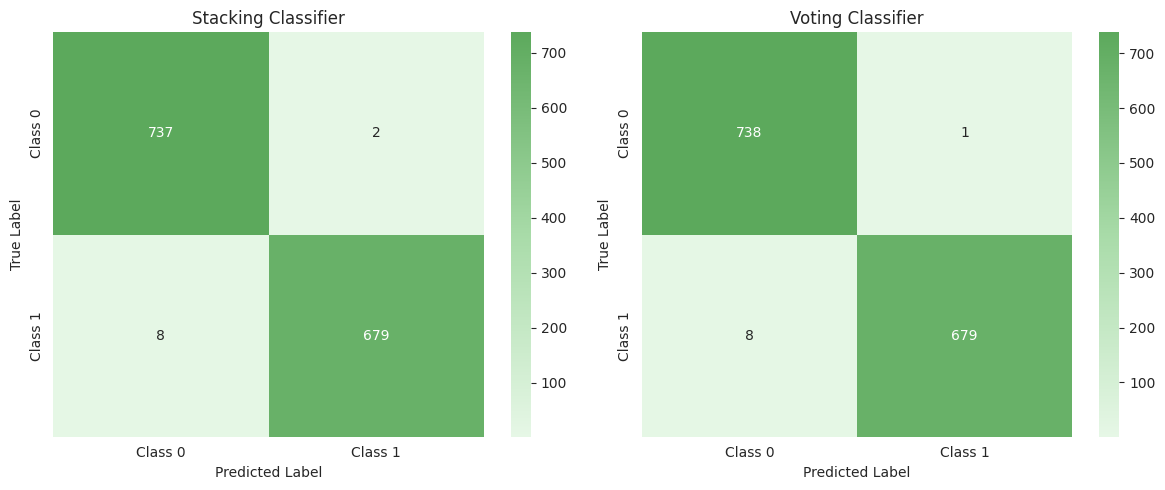

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from matplotlib.colors import LinearSegmentedColormap

# Custom colors for the heatmap
custom_colors = ['#e6f7e6', '#a8dba8', '#5ca95c']  # light pastel green, soft medium green, gentle dark green
custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", custom_colors)

# Function to plot confusion matrices in subplots
def plot_confusion_matrix(ax, y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap=custom_cmap, xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"], ax=ax)
    ax.set_xlabel("Predicted Label")
    ax.set_ylabel("True Label")
    ax.set_title(title)

# Create side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot confusion matrix for Stacking Classifier
plot_confusion_matrix(axes[0], y_test, stacking_preds, "Stacking Classifier")

# Plot confusion matrix for Voting Classifier
plot_confusion_matrix(axes[1], y_test, voting_preds, "Voting Classifier")

# Adjust layout
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:30:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.76431 |  0:00:00s
epoch 1  | loss: 0.62409 |  0:00:00s
epoch 2  | loss: 0.53637 |  0:00:00s
epoch 3  | loss: 0.47897 |  0:00:01s
epoch 4  | loss: 0.42411 |  0:00:01s
epoch 5  | loss: 0.38772 |  0:00:01s
epoch 6  | loss: 0.36785 |  0:00:01s
epoch 7  | loss: 0.33276 |  0:00:01s
epoch 8  | loss: 0.30307 |  0:00:02s
epoch 9  | loss: 0.28398 |  0:00:02s
epoch 10 | loss: 0.24373 |  0:00:02s
epoch 11 | loss: 0.21029 |  0:00:02s
epoch 12 | loss: 0.18663 |  0:00:02s
epoch 13 | loss: 0.16107 |  0:00:03s
epoch 14 | loss: 0.13109 |  0:00:03s
epoch 15 | loss: 0.10918 |  0:00:03s
epoch 16 | loss: 0.07932 |  0:00:03s
epoch 17 | loss: 0.06818 |  0:00:03s
epoch 18 | loss: 0.05882 |  0:00:03s
epoch 19 | loss: 0.05933 |  0:00:04s
epoch 20 | loss: 0.05973 |  0:00:04s
epoch 21 | loss: 0.04552 |  0:00:04s
epoch 22 | loss: 0.04414 |  0:00:04s
epoch 23 | loss: 0.03952 |  0:00:04s
epoch 24 | loss: 0.04139 |  0:00:05s
epoch 25 | loss: 0.04456 |  0:00:05s
epoch 26 | loss: 0.03577 |  0:00:05s
e

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:31:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.78586 |  0:00:00s
epoch 1  | loss: 0.65135 |  0:00:00s
epoch 2  | loss: 0.56789 |  0:00:00s
epoch 3  | loss: 0.4869  |  0:00:00s
epoch 4  | loss: 0.42691 |  0:00:00s
epoch 5  | loss: 0.37536 |  0:00:00s
epoch 6  | loss: 0.33118 |  0:00:00s
epoch 7  | loss: 0.29224 |  0:00:01s
epoch 8  | loss: 0.27078 |  0:00:01s
epoch 9  | loss: 0.23273 |  0:00:01s
epoch 10 | loss: 0.20673 |  0:00:01s
epoch 11 | loss: 0.1944  |  0:00:01s
epoch 12 | loss: 0.16799 |  0:00:01s
epoch 13 | loss: 0.14078 |  0:00:01s
epoch 14 | loss: 0.11719 |  0:00:02s
epoch 15 | loss: 0.1028  |  0:00:02s
epoch 16 | loss: 0.09347 |  0:00:02s
epoch 17 | loss: 0.07389 |  0:00:02s
epoch 18 | loss: 0.07388 |  0:00:02s
epoch 19 | loss: 0.06247 |  0:00:02s
epoch 20 | loss: 0.06094 |  0:00:02s
epoch 21 | loss: 0.05521 |  0:00:03s
epoch 22 | loss: 0.05497 |  0:00:03s
epoch 23 | loss: 0.05813 |  0:00:03s
epoch 24 | loss: 0.04787 |  0:00:03s
epoch 25 | loss: 0.04674 |  0:00:03s
epoch 26 | loss: 0.04718 |  0:00:03s
e

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.78388 |  0:00:00s
epoch 1  | loss: 0.5966  |  0:00:00s
epoch 2  | loss: 0.51695 |  0:00:00s
epoch 3  | loss: 0.47407 |  0:00:00s
epoch 4  | loss: 0.41633 |  0:00:00s
epoch 5  | loss: 0.36929 |  0:00:00s
epoch 6  | loss: 0.34925 |  0:00:00s
epoch 7  | loss: 0.31144 |  0:00:01s
epoch 8  | loss: 0.28574 |  0:00:01s
epoch 9  | loss: 0.256   |  0:00:01s
epoch 10 | loss: 0.24493 |  0:00:01s
epoch 11 | loss: 0.23864 |  0:00:01s
epoch 12 | loss: 0.20484 |  0:00:01s
epoch 13 | loss: 0.17558 |  0:00:02s
epoch 14 | loss: 0.16283 |  0:00:02s
epoch 15 | loss: 0.13994 |  0:00:02s
epoch 16 | loss: 0.11089 |  0:00:02s
epoch 17 | loss: 0.09885 |  0:00:02s
epoch 18 | loss: 0.08117 |  0:00:03s
epoch 19 | loss: 0.06808 |  0:00:03s
epoch 20 | loss: 0.06931 |  0:00:03s
epoch 21 | loss: 0.06817 |  0:00:03s
epoch 22 | loss: 0.05955 |  0:00:03s
epoch 23 | loss: 0.05801 |  0:00:04s
epoch 24 | loss: 0.06501 |  0:00:04s
epoch 25 | loss: 0.06474 |  0:00:04s
epoch 26 | loss: 0.05495 |  0:00:04s
e

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.7866  |  0:00:00s
epoch 1  | loss: 0.62546 |  0:00:00s
epoch 2  | loss: 0.54695 |  0:00:00s
epoch 3  | loss: 0.50784 |  0:00:00s
epoch 4  | loss: 0.45958 |  0:00:00s
epoch 5  | loss: 0.42374 |  0:00:01s
epoch 6  | loss: 0.36972 |  0:00:01s
epoch 7  | loss: 0.32929 |  0:00:01s
epoch 8  | loss: 0.28618 |  0:00:02s
epoch 9  | loss: 0.24352 |  0:00:02s
epoch 10 | loss: 0.20475 |  0:00:02s
epoch 11 | loss: 0.15028 |  0:00:02s
epoch 12 | loss: 0.11247 |  0:00:02s
epoch 13 | loss: 0.09446 |  0:00:02s
epoch 14 | loss: 0.08147 |  0:00:02s
epoch 15 | loss: 0.07095 |  0:00:03s
epoch 16 | loss: 0.06667 |  0:00:03s
epoch 17 | loss: 0.06439 |  0:00:03s
epoch 18 | loss: 0.05224 |  0:00:03s
epoch 19 | loss: 0.04528 |  0:00:03s
epoch 20 | loss: 0.05257 |  0:00:03s
epoch 21 | loss: 0.0463  |  0:00:03s
epoch 22 | loss: 0.05398 |  0:00:04s
epoch 23 | loss: 0.04439 |  0:00:04s
epoch 24 | loss: 0.05181 |  0:00:04s
epoch 25 | loss: 0.04284 |  0:00:04s
epoch 26 | loss: 0.04677 |  0:00:04s
e

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.82794 |  0:00:00s
epoch 1  | loss: 0.64939 |  0:00:00s
epoch 2  | loss: 0.55949 |  0:00:00s
epoch 3  | loss: 0.49903 |  0:00:00s
epoch 4  | loss: 0.43986 |  0:00:00s
epoch 5  | loss: 0.38111 |  0:00:00s
epoch 6  | loss: 0.33177 |  0:00:00s
epoch 7  | loss: 0.2841  |  0:00:01s
epoch 8  | loss: 0.25759 |  0:00:01s
epoch 9  | loss: 0.22244 |  0:00:01s
epoch 10 | loss: 0.18602 |  0:00:01s
epoch 11 | loss: 0.16191 |  0:00:01s
epoch 12 | loss: 0.15428 |  0:00:01s
epoch 13 | loss: 0.12199 |  0:00:01s
epoch 14 | loss: 0.1108  |  0:00:02s
epoch 15 | loss: 0.10189 |  0:00:02s
epoch 16 | loss: 0.09351 |  0:00:02s
epoch 17 | loss: 0.09147 |  0:00:02s
epoch 18 | loss: 0.07746 |  0:00:02s
epoch 19 | loss: 0.07665 |  0:00:02s
epoch 20 | loss: 0.07893 |  0:00:02s
epoch 21 | loss: 0.06047 |  0:00:02s
epoch 22 | loss: 0.05992 |  0:00:03s
epoch 23 | loss: 0.0587  |  0:00:03s
epoch 24 | loss: 0.06402 |  0:00:03s
epoch 25 | loss: 0.04423 |  0:00:03s
epoch 26 | loss: 0.04876 |  0:00:03s
e

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.83056 |  0:00:00s
epoch 1  | loss: 0.64412 |  0:00:00s
epoch 2  | loss: 0.56516 |  0:00:00s
epoch 3  | loss: 0.48595 |  0:00:00s
epoch 4  | loss: 0.43947 |  0:00:00s
epoch 5  | loss: 0.38562 |  0:00:00s
epoch 6  | loss: 0.33421 |  0:00:00s
epoch 7  | loss: 0.25856 |  0:00:01s
epoch 8  | loss: 0.20402 |  0:00:01s
epoch 9  | loss: 0.18611 |  0:00:01s
epoch 10 | loss: 0.15127 |  0:00:01s
epoch 11 | loss: 0.14078 |  0:00:01s
epoch 12 | loss: 0.13513 |  0:00:01s
epoch 13 | loss: 0.10905 |  0:00:01s
epoch 14 | loss: 0.10674 |  0:00:02s
epoch 15 | loss: 0.10186 |  0:00:02s
epoch 16 | loss: 0.10662 |  0:00:02s
epoch 17 | loss: 0.10194 |  0:00:02s
epoch 18 | loss: 0.08731 |  0:00:02s
epoch 19 | loss: 0.08623 |  0:00:02s
epoch 20 | loss: 0.08621 |  0:00:02s
epoch 21 | loss: 0.07194 |  0:00:02s
epoch 22 | loss: 0.07164 |  0:00:03s
epoch 23 | loss: 0.0677  |  0:00:03s
epoch 24 | loss: 0.07259 |  0:00:03s
epoch 25 | loss: 0.06466 |  0:00:03s
epoch 26 | loss: 0.05915 |  0:00:03s
e

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:32:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.75558 |  0:00:00s
epoch 1  | loss: 0.60238 |  0:00:00s
epoch 2  | loss: 0.54348 |  0:00:00s
epoch 3  | loss: 0.48646 |  0:00:00s
epoch 4  | loss: 0.44093 |  0:00:00s
epoch 5  | loss: 0.40304 |  0:00:01s
epoch 6  | loss: 0.35851 |  0:00:01s
epoch 7  | loss: 0.33005 |  0:00:01s
epoch 8  | loss: 0.29001 |  0:00:01s
epoch 9  | loss: 0.26358 |  0:00:01s
epoch 10 | loss: 0.23898 |  0:00:01s
epoch 11 | loss: 0.2132  |  0:00:02s
epoch 12 | loss: 0.18025 |  0:00:02s
epoch 13 | loss: 0.16299 |  0:00:02s
epoch 14 | loss: 0.14218 |  0:00:02s
epoch 15 | loss: 0.12806 |  0:00:02s
epoch 16 | loss: 0.10027 |  0:00:03s
epoch 17 | loss: 0.09505 |  0:00:03s
epoch 18 | loss: 0.08401 |  0:00:03s
epoch 19 | loss: 0.08161 |  0:00:03s
epoch 20 | loss: 0.07063 |  0:00:03s
epoch 21 | loss: 0.05883 |  0:00:03s
epoch 22 | loss: 0.06147 |  0:00:04s
epoch 23 | loss: 0.06612 |  0:00:04s
epoch 24 | loss: 0.05609 |  0:00:04s
epoch 25 | loss: 0.05153 |  0:00:04s
epoch 26 | loss: 0.04475 |  0:00:04s
e

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:33:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:33:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:33:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
/usr/local/lib/python3.11/dist-packages/pytorch_ta

epoch 0  | loss: 0.80253 |  0:00:00s
epoch 1  | loss: 0.62051 |  0:00:00s
epoch 2  | loss: 0.56597 |  0:00:00s
epoch 3  | loss: 0.49567 |  0:00:00s
epoch 4  | loss: 0.43476 |  0:00:00s
epoch 5  | loss: 0.36737 |  0:00:00s
epoch 6  | loss: 0.32922 |  0:00:00s
epoch 7  | loss: 0.29139 |  0:00:01s
epoch 8  | loss: 0.2567  |  0:00:01s
epoch 9  | loss: 0.21778 |  0:00:01s
epoch 10 | loss: 0.17837 |  0:00:01s
epoch 11 | loss: 0.15045 |  0:00:01s
epoch 12 | loss: 0.1226  |  0:00:01s
epoch 13 | loss: 0.10555 |  0:00:01s
epoch 14 | loss: 0.09651 |  0:00:02s
epoch 15 | loss: 0.08591 |  0:00:02s
epoch 16 | loss: 0.08148 |  0:00:02s
epoch 17 | loss: 0.074   |  0:00:02s
epoch 18 | loss: 0.07087 |  0:00:02s
epoch 19 | loss: 0.06294 |  0:00:02s
epoch 20 | loss: 0.06127 |  0:00:02s
epoch 21 | loss: 0.05523 |  0:00:02s
epoch 22 | loss: 0.05743 |  0:00:03s
epoch 23 | loss: 0.05731 |  0:00:03s
epoch 24 | loss: 0.05518 |  0:00:03s
epoch 25 | loss: 0.05528 |  0:00:03s
epoch 26 | loss: 0.05964 |  0:00:03s
e

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.80683 |  0:00:00s
epoch 1  | loss: 0.6003  |  0:00:00s
epoch 2  | loss: 0.52582 |  0:00:00s
epoch 3  | loss: 0.46501 |  0:00:00s
epoch 4  | loss: 0.40851 |  0:00:00s
epoch 5  | loss: 0.36351 |  0:00:00s
epoch 6  | loss: 0.31315 |  0:00:00s
epoch 7  | loss: 0.28731 |  0:00:01s
epoch 8  | loss: 0.25006 |  0:00:01s
epoch 9  | loss: 0.21104 |  0:00:01s
epoch 10 | loss: 0.16228 |  0:00:01s
epoch 11 | loss: 0.13857 |  0:00:01s
epoch 12 | loss: 0.11252 |  0:00:01s
epoch 13 | loss: 0.09776 |  0:00:01s
epoch 14 | loss: 0.08873 |  0:00:02s
epoch 15 | loss: 0.08803 |  0:00:02s
epoch 16 | loss: 0.07297 |  0:00:02s
epoch 17 | loss: 0.07764 |  0:00:02s
epoch 18 | loss: 0.07521 |  0:00:02s
epoch 19 | loss: 0.06812 |  0:00:02s
epoch 20 | loss: 0.06663 |  0:00:03s
epoch 21 | loss: 0.05762 |  0:00:03s
epoch 22 | loss: 0.06125 |  0:00:03s
epoch 23 | loss: 0.05287 |  0:00:03s
epoch 24 | loss: 0.05602 |  0:00:03s
epoch 25 | loss: 0.04795 |  0:00:04s
epoch 26 | loss: 0.05617 |  0:00:04s
e

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.80556 |  0:00:00s
epoch 1  | loss: 0.62323 |  0:00:00s
epoch 2  | loss: 0.54762 |  0:00:00s
epoch 3  | loss: 0.47608 |  0:00:00s
epoch 4  | loss: 0.42748 |  0:00:01s
epoch 5  | loss: 0.37947 |  0:00:01s
epoch 6  | loss: 0.32711 |  0:00:01s
epoch 7  | loss: 0.27277 |  0:00:01s
epoch 8  | loss: 0.22109 |  0:00:01s
epoch 9  | loss: 0.17207 |  0:00:01s
epoch 10 | loss: 0.14983 |  0:00:01s
epoch 11 | loss: 0.12951 |  0:00:02s
epoch 12 | loss: 0.11494 |  0:00:02s
epoch 13 | loss: 0.0965  |  0:00:02s
epoch 14 | loss: 0.0864  |  0:00:02s
epoch 15 | loss: 0.08374 |  0:00:02s
epoch 16 | loss: 0.08157 |  0:00:02s
epoch 17 | loss: 0.0741  |  0:00:02s
epoch 18 | loss: 0.0771  |  0:00:03s
epoch 19 | loss: 0.06753 |  0:00:03s
epoch 20 | loss: 0.06349 |  0:00:03s
epoch 21 | loss: 0.05767 |  0:00:03s
epoch 22 | loss: 0.0598  |  0:00:03s
epoch 23 | loss: 0.05344 |  0:00:03s
epoch 24 | loss: 0.05003 |  0:00:03s
epoch 25 | loss: 0.05514 |  0:00:03s
epoch 26 | loss: 0.04938 |  0:00:04s
e

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.81971 |  0:00:00s
epoch 1  | loss: 0.65081 |  0:00:00s
epoch 2  | loss: 0.57705 |  0:00:00s
epoch 3  | loss: 0.52144 |  0:00:00s
epoch 4  | loss: 0.46267 |  0:00:00s
epoch 5  | loss: 0.41048 |  0:00:00s
epoch 6  | loss: 0.38157 |  0:00:00s
epoch 7  | loss: 0.33293 |  0:00:01s
epoch 8  | loss: 0.29719 |  0:00:01s
epoch 9  | loss: 0.25178 |  0:00:01s
epoch 10 | loss: 0.20061 |  0:00:01s
epoch 11 | loss: 0.16403 |  0:00:01s
epoch 12 | loss: 0.13772 |  0:00:01s
epoch 13 | loss: 0.12489 |  0:00:01s
epoch 14 | loss: 0.11176 |  0:00:02s
epoch 15 | loss: 0.10297 |  0:00:02s
epoch 16 | loss: 0.09728 |  0:00:02s
epoch 17 | loss: 0.07873 |  0:00:02s
epoch 18 | loss: 0.08102 |  0:00:02s
epoch 19 | loss: 0.0839  |  0:00:02s
epoch 20 | loss: 0.08101 |  0:00:02s
epoch 21 | loss: 0.06688 |  0:00:02s
epoch 22 | loss: 0.06061 |  0:00:03s
epoch 23 | loss: 0.06479 |  0:00:03s
epoch 24 | loss: 0.0585  |  0:00:03s
epoch 25 | loss: 0.05518 |  0:00:03s
epoch 26 | loss: 0.05188 |  0:00:03s
e

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.78133 |  0:00:00s
epoch 1  | loss: 0.58364 |  0:00:00s
epoch 2  | loss: 0.50045 |  0:00:00s
epoch 3  | loss: 0.43137 |  0:00:00s
epoch 4  | loss: 0.36074 |  0:00:00s
epoch 5  | loss: 0.31524 |  0:00:00s
epoch 6  | loss: 0.25194 |  0:00:00s
epoch 7  | loss: 0.17914 |  0:00:01s
epoch 8  | loss: 0.15065 |  0:00:01s
epoch 9  | loss: 0.13708 |  0:00:01s
epoch 10 | loss: 0.13222 |  0:00:01s
epoch 11 | loss: 0.12117 |  0:00:01s
epoch 12 | loss: 0.10938 |  0:00:01s
epoch 13 | loss: 0.10977 |  0:00:01s
epoch 14 | loss: 0.09613 |  0:00:02s
epoch 15 | loss: 0.09538 |  0:00:02s
epoch 16 | loss: 0.09173 |  0:00:02s
epoch 17 | loss: 0.07753 |  0:00:02s
epoch 18 | loss: 0.0887  |  0:00:02s
epoch 19 | loss: 0.08186 |  0:00:02s
epoch 20 | loss: 0.07485 |  0:00:02s
epoch 21 | loss: 0.07385 |  0:00:03s
epoch 22 | loss: 0.07264 |  0:00:03s
epoch 23 | loss: 0.06353 |  0:00:03s
epoch 24 | loss: 0.06459 |  0:00:03s
epoch 25 | loss: 0.06834 |  0:00:03s
epoch 26 | loss: 0.05616 |  0:00:03s
e

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:34:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.78907 |  0:00:00s
epoch 1  | loss: 0.61036 |  0:00:00s
epoch 2  | loss: 0.5143  |  0:00:00s
epoch 3  | loss: 0.45058 |  0:00:00s
epoch 4  | loss: 0.38858 |  0:00:00s
epoch 5  | loss: 0.35412 |  0:00:01s
epoch 6  | loss: 0.30472 |  0:00:01s
epoch 7  | loss: 0.27145 |  0:00:01s
epoch 8  | loss: 0.23433 |  0:00:01s
epoch 9  | loss: 0.18787 |  0:00:01s
epoch 10 | loss: 0.13804 |  0:00:01s
epoch 11 | loss: 0.10438 |  0:00:02s
epoch 12 | loss: 0.08208 |  0:00:02s
epoch 13 | loss: 0.07485 |  0:00:02s
epoch 14 | loss: 0.07431 |  0:00:02s
epoch 15 | loss: 0.06984 |  0:00:02s
epoch 16 | loss: 0.0631  |  0:00:03s
epoch 17 | loss: 0.0622  |  0:00:03s
epoch 18 | loss: 0.0598  |  0:00:03s
epoch 19 | loss: 0.05971 |  0:00:03s
epoch 20 | loss: 0.05909 |  0:00:03s
epoch 21 | loss: 0.05477 |  0:00:03s
epoch 22 | loss: 0.04708 |  0:00:04s
epoch 23 | loss: 0.04663 |  0:00:04s
epoch 24 | loss: 0.04442 |  0:00:04s
epoch 25 | loss: 0.04025 |  0:00:04s
epoch 26 | loss: 0.03967 |  0:00:04s
e

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:35:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:35:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:35:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
/usr/local/lib/python3.11/dist-packages/pytorch_ta

epoch 0  | loss: 0.81395 |  0:00:00s
epoch 1  | loss: 0.61467 |  0:00:00s
epoch 2  | loss: 0.52032 |  0:00:00s
epoch 3  | loss: 0.46774 |  0:00:00s
epoch 4  | loss: 0.42559 |  0:00:00s
epoch 5  | loss: 0.37518 |  0:00:00s
epoch 6  | loss: 0.33632 |  0:00:00s
epoch 7  | loss: 0.26839 |  0:00:01s
epoch 8  | loss: 0.21318 |  0:00:01s
epoch 9  | loss: 0.14656 |  0:00:01s
epoch 10 | loss: 0.13863 |  0:00:01s
epoch 11 | loss: 0.10863 |  0:00:01s
epoch 12 | loss: 0.09907 |  0:00:01s
epoch 13 | loss: 0.08815 |  0:00:01s
epoch 14 | loss: 0.07786 |  0:00:02s
epoch 15 | loss: 0.07489 |  0:00:02s
epoch 16 | loss: 0.06976 |  0:00:02s
epoch 17 | loss: 0.06772 |  0:00:02s
epoch 18 | loss: 0.06428 |  0:00:02s
epoch 19 | loss: 0.05328 |  0:00:02s
epoch 20 | loss: 0.05044 |  0:00:02s
epoch 21 | loss: 0.05018 |  0:00:03s
epoch 22 | loss: 0.04981 |  0:00:03s
epoch 23 | loss: 0.04574 |  0:00:03s
epoch 24 | loss: 0.05726 |  0:00:03s
epoch 25 | loss: 0.04518 |  0:00:03s
epoch 26 | loss: 0.04328 |  0:00:03s
e

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.82584 |  0:00:00s
epoch 1  | loss: 0.62892 |  0:00:00s
epoch 2  | loss: 0.5287  |  0:00:00s
epoch 3  | loss: 0.44451 |  0:00:01s
epoch 4  | loss: 0.3815  |  0:00:01s
epoch 5  | loss: 0.32066 |  0:00:01s
epoch 6  | loss: 0.27295 |  0:00:01s
epoch 7  | loss: 0.23631 |  0:00:01s
epoch 8  | loss: 0.17152 |  0:00:02s
epoch 9  | loss: 0.1264  |  0:00:02s
epoch 10 | loss: 0.10572 |  0:00:02s
epoch 11 | loss: 0.09515 |  0:00:02s
epoch 12 | loss: 0.08118 |  0:00:02s
epoch 13 | loss: 0.07846 |  0:00:03s
epoch 14 | loss: 0.07339 |  0:00:03s
epoch 15 | loss: 0.06478 |  0:00:03s
epoch 16 | loss: 0.05927 |  0:00:03s
epoch 17 | loss: 0.059   |  0:00:03s
epoch 18 | loss: 0.05464 |  0:00:03s
epoch 19 | loss: 0.05586 |  0:00:03s
epoch 20 | loss: 0.05601 |  0:00:04s
epoch 21 | loss: 0.04801 |  0:00:04s
epoch 22 | loss: 0.06281 |  0:00:04s
epoch 23 | loss: 0.04867 |  0:00:04s
epoch 24 | loss: 0.05291 |  0:00:04s
epoch 25 | loss: 0.05578 |  0:00:04s
epoch 26 | loss: 0.05045 |  0:00:04s
e

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.8239  |  0:00:00s
epoch 1  | loss: 0.61781 |  0:00:00s
epoch 2  | loss: 0.54194 |  0:00:00s
epoch 3  | loss: 0.47903 |  0:00:00s
epoch 4  | loss: 0.45395 |  0:00:00s
epoch 5  | loss: 0.41211 |  0:00:00s
epoch 6  | loss: 0.3875  |  0:00:00s
epoch 7  | loss: 0.35242 |  0:00:01s
epoch 8  | loss: 0.32288 |  0:00:01s
epoch 9  | loss: 0.28595 |  0:00:01s
epoch 10 | loss: 0.25902 |  0:00:01s
epoch 11 | loss: 0.19928 |  0:00:01s
epoch 12 | loss: 0.14107 |  0:00:01s
epoch 13 | loss: 0.12505 |  0:00:01s
epoch 14 | loss: 0.10368 |  0:00:02s
epoch 15 | loss: 0.08831 |  0:00:02s
epoch 16 | loss: 0.08434 |  0:00:02s
epoch 17 | loss: 0.07635 |  0:00:02s
epoch 18 | loss: 0.07019 |  0:00:02s
epoch 19 | loss: 0.07389 |  0:00:02s
epoch 20 | loss: 0.07226 |  0:00:02s
epoch 21 | loss: 0.0652  |  0:00:03s
epoch 22 | loss: 0.06128 |  0:00:03s
epoch 23 | loss: 0.06005 |  0:00:03s
epoch 24 | loss: 0.05556 |  0:00:03s
epoch 25 | loss: 0.0551  |  0:00:03s
epoch 26 | loss: 0.0498  |  0:00:03s
e

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.85101 |  0:00:00s
epoch 1  | loss: 0.62537 |  0:00:00s
epoch 2  | loss: 0.55237 |  0:00:00s
epoch 3  | loss: 0.49458 |  0:00:00s
epoch 4  | loss: 0.42468 |  0:00:00s
epoch 5  | loss: 0.36135 |  0:00:00s
epoch 6  | loss: 0.3076  |  0:00:00s
epoch 7  | loss: 0.24984 |  0:00:01s
epoch 8  | loss: 0.21675 |  0:00:01s
epoch 9  | loss: 0.16243 |  0:00:01s
epoch 10 | loss: 0.14418 |  0:00:01s
epoch 11 | loss: 0.11745 |  0:00:01s
epoch 12 | loss: 0.10532 |  0:00:01s
epoch 13 | loss: 0.10493 |  0:00:01s
epoch 14 | loss: 0.09919 |  0:00:02s
epoch 15 | loss: 0.0927  |  0:00:02s
epoch 16 | loss: 0.09069 |  0:00:02s
epoch 17 | loss: 0.07791 |  0:00:02s
epoch 18 | loss: 0.0756  |  0:00:02s
epoch 19 | loss: 0.06939 |  0:00:02s
epoch 20 | loss: 0.06843 |  0:00:02s
epoch 21 | loss: 0.06647 |  0:00:02s
epoch 22 | loss: 0.06249 |  0:00:03s
epoch 23 | loss: 0.06164 |  0:00:03s
epoch 24 | loss: 0.06357 |  0:00:03s
epoch 25 | loss: 0.06088 |  0:00:03s
epoch 26 | loss: 0.05783 |  0:00:03s
e

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.79453 |  0:00:00s
epoch 1  | loss: 0.62049 |  0:00:00s
epoch 2  | loss: 0.53958 |  0:00:00s
epoch 3  | loss: 0.45705 |  0:00:00s
epoch 4  | loss: 0.39013 |  0:00:00s
epoch 5  | loss: 0.32533 |  0:00:00s
epoch 6  | loss: 0.25641 |  0:00:00s
epoch 7  | loss: 0.21467 |  0:00:01s
epoch 8  | loss: 0.19145 |  0:00:01s
epoch 9  | loss: 0.15904 |  0:00:01s
epoch 10 | loss: 0.14036 |  0:00:01s
epoch 11 | loss: 0.13248 |  0:00:01s
epoch 12 | loss: 0.12445 |  0:00:01s
epoch 13 | loss: 0.12372 |  0:00:01s
epoch 14 | loss: 0.10766 |  0:00:02s
epoch 15 | loss: 0.09665 |  0:00:02s
epoch 16 | loss: 0.10251 |  0:00:02s
epoch 17 | loss: 0.08412 |  0:00:02s
epoch 18 | loss: 0.08915 |  0:00:02s
epoch 19 | loss: 0.08143 |  0:00:02s
epoch 20 | loss: 0.07284 |  0:00:02s
epoch 21 | loss: 0.06664 |  0:00:02s
epoch 22 | loss: 0.07062 |  0:00:03s
epoch 23 | loss: 0.05248 |  0:00:03s
epoch 24 | loss: 0.05477 |  0:00:03s
epoch 25 | loss: 0.04811 |  0:00:03s
epoch 26 | loss: 0.04009 |  0:00:03s
e

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:37:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.75291 |  0:00:00s
epoch 1  | loss: 0.55975 |  0:00:00s
epoch 2  | loss: 0.46869 |  0:00:00s
epoch 3  | loss: 0.39579 |  0:00:00s
epoch 4  | loss: 0.33302 |  0:00:00s
epoch 5  | loss: 0.25813 |  0:00:01s
epoch 6  | loss: 0.19376 |  0:00:01s
epoch 7  | loss: 0.1342  |  0:00:01s
epoch 8  | loss: 0.1158  |  0:00:01s
epoch 9  | loss: 0.09326 |  0:00:01s
epoch 10 | loss: 0.08224 |  0:00:01s
epoch 11 | loss: 0.07464 |  0:00:02s
epoch 12 | loss: 0.07233 |  0:00:02s
epoch 13 | loss: 0.06564 |  0:00:02s
epoch 14 | loss: 0.06229 |  0:00:02s
epoch 15 | loss: 0.05521 |  0:00:02s
epoch 16 | loss: 0.04924 |  0:00:03s
epoch 17 | loss: 0.05647 |  0:00:03s
epoch 18 | loss: 0.04821 |  0:00:03s
epoch 19 | loss: 0.04917 |  0:00:03s
epoch 20 | loss: 0.04663 |  0:00:03s
epoch 21 | loss: 0.04868 |  0:00:03s
epoch 22 | loss: 0.04708 |  0:00:04s
epoch 23 | loss: 0.04113 |  0:00:04s
epoch 24 | loss: 0.03657 |  0:00:04s
epoch 25 | loss: 0.03621 |  0:00:04s
epoch 26 | loss: 0.04167 |  0:00:04s
e

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:37:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:37:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.81549 |  0:00:00s
epoch 1  | loss: 0.63509 |  0:00:00s
epoch 2  | loss: 0.55035 |  0:00:00s
epoch 3  | loss: 0.48541 |  0:00:00s
epoch 4  | loss: 0.4329  |  0:00:00s
epoch 5  | loss: 0.37899 |  0:00:00s
epoch 6  | loss: 0.34337 |  0:00:00s
epoch 7  | loss: 0.2825  |  0:00:01s
epoch 8  | loss: 0.23449 |  0:00:01s
epoch 9  | loss: 0.18798 |  0:00:01s
epoch 10 | loss: 0.15629 |  0:00:01s
epoch 11 | loss: 0.1304  |  0:00:01s
epoch 12 | loss: 0.12153 |  0:00:01s
epoch 13 | loss: 0.11084 |  0:00:01s
epoch 14 | loss: 0.1051  |  0:00:02s
epoch 15 | loss: 0.09913 |  0:00:02s
epoch 16 | loss: 0.0889  |  0:00:02s
epoch 17 | loss: 0.08555 |  0:00:02s
epoch 18 | loss: 0.07567 |  0:00:02s
epoch 19 | loss: 0.07651 |  0:00:02s
epoch 20 | loss: 0.07569 |  0:00:02s
epoch 21 | loss: 0.07812 |  0:00:02s
epoch 22 | loss: 0.0687  |  0:00:03s
epoch 23 | loss: 0.06495 |  0:00:03s
epoch 24 | loss: 0.06926 |  0:00:03s
epoch 25 | loss: 0.06043 |  0:00:03s
epoch 26 | loss: 0.05755 |  0:00:03s
e

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.80207 |  0:00:00s
epoch 1  | loss: 0.61092 |  0:00:00s
epoch 2  | loss: 0.52321 |  0:00:00s
epoch 3  | loss: 0.46261 |  0:00:00s
epoch 4  | loss: 0.40391 |  0:00:00s
epoch 5  | loss: 0.34043 |  0:00:00s
epoch 6  | loss: 0.2864  |  0:00:00s
epoch 7  | loss: 0.25366 |  0:00:01s
epoch 8  | loss: 0.1962  |  0:00:01s
epoch 9  | loss: 0.16568 |  0:00:01s
epoch 10 | loss: 0.13402 |  0:00:01s
epoch 11 | loss: 0.11773 |  0:00:01s
epoch 12 | loss: 0.1004  |  0:00:01s
epoch 13 | loss: 0.0921  |  0:00:01s
epoch 14 | loss: 0.08289 |  0:00:02s
epoch 15 | loss: 0.07452 |  0:00:02s
epoch 16 | loss: 0.06581 |  0:00:02s
epoch 17 | loss: 0.06468 |  0:00:02s
epoch 18 | loss: 0.05842 |  0:00:02s
epoch 19 | loss: 0.05777 |  0:00:02s
epoch 20 | loss: 0.05235 |  0:00:03s
epoch 21 | loss: 0.05266 |  0:00:03s
epoch 22 | loss: 0.04667 |  0:00:03s
epoch 23 | loss: 0.04604 |  0:00:03s
epoch 24 | loss: 0.0423  |  0:00:03s
epoch 25 | loss: 0.04505 |  0:00:04s
epoch 26 | loss: 0.03855 |  0:00:04s
e

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.80118 |  0:00:00s
epoch 1  | loss: 0.65014 |  0:00:00s
epoch 2  | loss: 0.55797 |  0:00:00s
epoch 3  | loss: 0.5006  |  0:00:00s
epoch 4  | loss: 0.43931 |  0:00:01s
epoch 5  | loss: 0.35835 |  0:00:01s
epoch 6  | loss: 0.30564 |  0:00:01s
epoch 7  | loss: 0.25802 |  0:00:01s
epoch 8  | loss: 0.2185  |  0:00:01s
epoch 9  | loss: 0.18645 |  0:00:02s
epoch 10 | loss: 0.16131 |  0:00:02s
epoch 11 | loss: 0.1482  |  0:00:02s
epoch 12 | loss: 0.14155 |  0:00:02s
epoch 13 | loss: 0.12463 |  0:00:02s
epoch 14 | loss: 0.10619 |  0:00:02s
epoch 15 | loss: 0.10861 |  0:00:02s
epoch 16 | loss: 0.10251 |  0:00:03s
epoch 17 | loss: 0.10017 |  0:00:03s
epoch 18 | loss: 0.09027 |  0:00:03s
epoch 19 | loss: 0.08843 |  0:00:03s
epoch 20 | loss: 0.07793 |  0:00:03s
epoch 21 | loss: 0.08642 |  0:00:03s
epoch 22 | loss: 0.07855 |  0:00:03s
epoch 23 | loss: 0.07111 |  0:00:03s
epoch 24 | loss: 0.07096 |  0:00:04s
epoch 25 | loss: 0.06883 |  0:00:04s
epoch 26 | loss: 0.06384 |  0:00:04s
e

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.83285 |  0:00:00s
epoch 1  | loss: 0.6768  |  0:00:00s
epoch 2  | loss: 0.60364 |  0:00:00s
epoch 3  | loss: 0.56937 |  0:00:00s
epoch 4  | loss: 0.51982 |  0:00:00s
epoch 5  | loss: 0.48807 |  0:00:00s
epoch 6  | loss: 0.47161 |  0:00:00s
epoch 7  | loss: 0.41831 |  0:00:01s
epoch 8  | loss: 0.37688 |  0:00:01s
epoch 9  | loss: 0.32489 |  0:00:01s
epoch 10 | loss: 0.24672 |  0:00:01s
epoch 11 | loss: 0.18664 |  0:00:01s
epoch 12 | loss: 0.16583 |  0:00:01s
epoch 13 | loss: 0.14464 |  0:00:01s
epoch 14 | loss: 0.1265  |  0:00:02s
epoch 15 | loss: 0.10969 |  0:00:02s
epoch 16 | loss: 0.09456 |  0:00:02s
epoch 17 | loss: 0.08786 |  0:00:02s
epoch 18 | loss: 0.08027 |  0:00:02s
epoch 19 | loss: 0.06663 |  0:00:02s
epoch 20 | loss: 0.0651  |  0:00:02s
epoch 21 | loss: 0.0625  |  0:00:02s
epoch 22 | loss: 0.05918 |  0:00:03s
epoch 23 | loss: 0.05682 |  0:00:03s
epoch 24 | loss: 0.04974 |  0:00:03s
epoch 25 | loss: 0.04513 |  0:00:03s
epoch 26 | loss: 0.04414 |  0:00:03s
e

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.84014 |  0:00:00s
epoch 1  | loss: 0.68499 |  0:00:00s
epoch 2  | loss: 0.59384 |  0:00:00s
epoch 3  | loss: 0.52921 |  0:00:00s
epoch 4  | loss: 0.49447 |  0:00:00s
epoch 5  | loss: 0.45632 |  0:00:00s
epoch 6  | loss: 0.43565 |  0:00:00s
epoch 7  | loss: 0.40338 |  0:00:01s
epoch 8  | loss: 0.37643 |  0:00:01s
epoch 9  | loss: 0.34436 |  0:00:01s
epoch 10 | loss: 0.29407 |  0:00:01s
epoch 11 | loss: 0.24026 |  0:00:01s
epoch 12 | loss: 0.18407 |  0:00:01s
epoch 13 | loss: 0.14732 |  0:00:01s
epoch 14 | loss: 0.13781 |  0:00:02s
epoch 15 | loss: 0.12833 |  0:00:02s
epoch 16 | loss: 0.11257 |  0:00:02s
epoch 17 | loss: 0.10953 |  0:00:02s
epoch 18 | loss: 0.10903 |  0:00:02s
epoch 19 | loss: 0.09752 |  0:00:02s
epoch 20 | loss: 0.08447 |  0:00:02s
epoch 21 | loss: 0.08316 |  0:00:02s
epoch 22 | loss: 0.08492 |  0:00:03s
epoch 23 | loss: 0.0696  |  0:00:03s
epoch 24 | loss: 0.06801 |  0:00:03s
epoch 25 | loss: 0.06324 |  0:00:03s
epoch 26 | loss: 0.05553 |  0:00:03s
e

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:39:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.77514 |  0:00:00s
epoch 1  | loss: 0.61192 |  0:00:00s
epoch 2  | loss: 0.51858 |  0:00:00s
epoch 3  | loss: 0.45719 |  0:00:00s
epoch 4  | loss: 0.39437 |  0:00:01s
epoch 5  | loss: 0.32835 |  0:00:01s
epoch 6  | loss: 0.26101 |  0:00:01s
epoch 7  | loss: 0.18705 |  0:00:01s
epoch 8  | loss: 0.14425 |  0:00:01s
epoch 9  | loss: 0.11003 |  0:00:01s
epoch 10 | loss: 0.0993  |  0:00:02s
epoch 11 | loss: 0.08958 |  0:00:02s
epoch 12 | loss: 0.07892 |  0:00:02s
epoch 13 | loss: 0.07744 |  0:00:02s
epoch 14 | loss: 0.07242 |  0:00:02s
epoch 15 | loss: 0.06327 |  0:00:03s
epoch 16 | loss: 0.05365 |  0:00:03s
epoch 17 | loss: 0.05113 |  0:00:03s
epoch 18 | loss: 0.05793 |  0:00:03s
epoch 19 | loss: 0.054   |  0:00:03s
epoch 20 | loss: 0.04681 |  0:00:03s
epoch 21 | loss: 0.04485 |  0:00:04s
epoch 22 | loss: 0.03986 |  0:00:04s
epoch 23 | loss: 0.03724 |  0:00:04s
epoch 24 | loss: 0.0347  |  0:00:04s
epoch 25 | loss: 0.03647 |  0:00:04s
epoch 26 | loss: 0.03875 |  0:00:05s
e

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:39:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:39:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:39:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
/usr/local/lib/python3.11/dist-packages/pytorch_ta

epoch 0  | loss: 0.78675 |  0:00:00s
epoch 1  | loss: 0.65438 |  0:00:00s
epoch 2  | loss: 0.58968 |  0:00:00s
epoch 3  | loss: 0.52473 |  0:00:00s
epoch 4  | loss: 0.46866 |  0:00:00s
epoch 5  | loss: 0.43736 |  0:00:00s
epoch 6  | loss: 0.39038 |  0:00:00s
epoch 7  | loss: 0.3394  |  0:00:01s
epoch 8  | loss: 0.25977 |  0:00:01s
epoch 9  | loss: 0.21022 |  0:00:01s
epoch 10 | loss: 0.18451 |  0:00:01s
epoch 11 | loss: 0.16811 |  0:00:01s
epoch 12 | loss: 0.13743 |  0:00:01s
epoch 13 | loss: 0.12557 |  0:00:01s
epoch 14 | loss: 0.11336 |  0:00:02s
epoch 15 | loss: 0.1217  |  0:00:02s
epoch 16 | loss: 0.0996  |  0:00:02s
epoch 17 | loss: 0.10248 |  0:00:02s
epoch 18 | loss: 0.1063  |  0:00:02s
epoch 19 | loss: 0.09873 |  0:00:02s
epoch 20 | loss: 0.09358 |  0:00:02s
epoch 21 | loss: 0.09331 |  0:00:03s
epoch 22 | loss: 0.08709 |  0:00:03s
epoch 23 | loss: 0.08561 |  0:00:03s
epoch 24 | loss: 0.07716 |  0:00:03s
epoch 25 | loss: 0.07681 |  0:00:03s
epoch 26 | loss: 0.07687 |  0:00:04s
e

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.79778 |  0:00:00s
epoch 1  | loss: 0.64637 |  0:00:00s
epoch 2  | loss: 0.5875  |  0:00:00s
epoch 3  | loss: 0.53097 |  0:00:00s
epoch 4  | loss: 0.49051 |  0:00:00s
epoch 5  | loss: 0.43637 |  0:00:00s
epoch 6  | loss: 0.40621 |  0:00:01s
epoch 7  | loss: 0.37059 |  0:00:01s
epoch 8  | loss: 0.33861 |  0:00:01s
epoch 9  | loss: 0.3088  |  0:00:01s
epoch 10 | loss: 0.27925 |  0:00:01s
epoch 11 | loss: 0.22827 |  0:00:02s
epoch 12 | loss: 0.19703 |  0:00:02s
epoch 13 | loss: 0.15661 |  0:00:02s
epoch 14 | loss: 0.13959 |  0:00:02s
epoch 15 | loss: 0.12636 |  0:00:02s
epoch 16 | loss: 0.11281 |  0:00:03s
epoch 17 | loss: 0.10563 |  0:00:03s
epoch 18 | loss: 0.09892 |  0:00:03s
epoch 19 | loss: 0.09086 |  0:00:03s
epoch 20 | loss: 0.09008 |  0:00:03s
epoch 21 | loss: 0.07776 |  0:00:03s
epoch 22 | loss: 0.07214 |  0:00:03s
epoch 23 | loss: 0.07502 |  0:00:03s
epoch 24 | loss: 0.07076 |  0:00:04s
epoch 25 | loss: 0.06708 |  0:00:04s
epoch 26 | loss: 0.06144 |  0:00:04s
e

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.8156  |  0:00:00s
epoch 1  | loss: 0.64433 |  0:00:00s
epoch 2  | loss: 0.56581 |  0:00:00s
epoch 3  | loss: 0.4963  |  0:00:00s
epoch 4  | loss: 0.44079 |  0:00:00s
epoch 5  | loss: 0.40272 |  0:00:00s
epoch 6  | loss: 0.36768 |  0:00:00s
epoch 7  | loss: 0.34714 |  0:00:01s
epoch 8  | loss: 0.3069  |  0:00:01s
epoch 9  | loss: 0.28234 |  0:00:01s
epoch 10 | loss: 0.26284 |  0:00:01s
epoch 11 | loss: 0.23479 |  0:00:01s
epoch 12 | loss: 0.23498 |  0:00:01s
epoch 13 | loss: 0.21533 |  0:00:01s
epoch 14 | loss: 0.19606 |  0:00:02s
epoch 15 | loss: 0.17673 |  0:00:02s
epoch 16 | loss: 0.15549 |  0:00:02s
epoch 17 | loss: 0.14957 |  0:00:02s
epoch 18 | loss: 0.13511 |  0:00:02s
epoch 19 | loss: 0.12727 |  0:00:02s
epoch 20 | loss: 0.11218 |  0:00:02s
epoch 21 | loss: 0.08077 |  0:00:02s
epoch 22 | loss: 0.07807 |  0:00:03s
epoch 23 | loss: 0.07291 |  0:00:03s
epoch 24 | loss: 0.07182 |  0:00:03s
epoch 25 | loss: 0.07604 |  0:00:03s
epoch 26 | loss: 0.06319 |  0:00:03s
e

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.81955 |  0:00:00s
epoch 1  | loss: 0.64672 |  0:00:00s
epoch 2  | loss: 0.57642 |  0:00:00s
epoch 3  | loss: 0.532   |  0:00:00s
epoch 4  | loss: 0.49689 |  0:00:00s
epoch 5  | loss: 0.46389 |  0:00:00s
epoch 6  | loss: 0.42732 |  0:00:00s
epoch 7  | loss: 0.3875  |  0:00:01s
epoch 8  | loss: 0.34821 |  0:00:01s
epoch 9  | loss: 0.29506 |  0:00:01s
epoch 10 | loss: 0.262   |  0:00:01s
epoch 11 | loss: 0.22233 |  0:00:01s
epoch 12 | loss: 0.17176 |  0:00:01s
epoch 13 | loss: 0.14259 |  0:00:02s
epoch 14 | loss: 0.11867 |  0:00:02s
epoch 15 | loss: 0.11101 |  0:00:02s
epoch 16 | loss: 0.09956 |  0:00:02s
epoch 17 | loss: 0.10914 |  0:00:02s
epoch 18 | loss: 0.09516 |  0:00:02s
epoch 19 | loss: 0.08653 |  0:00:02s
epoch 20 | loss: 0.08017 |  0:00:02s
epoch 21 | loss: 0.07307 |  0:00:03s
epoch 22 | loss: 0.08055 |  0:00:03s
epoch 23 | loss: 0.0698  |  0:00:03s
epoch 24 | loss: 0.06953 |  0:00:03s
epoch 25 | loss: 0.06274 |  0:00:03s
epoch 26 | loss: 0.05841 |  0:00:03s
e

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.82872 |  0:00:00s
epoch 1  | loss: 0.67642 |  0:00:00s
epoch 2  | loss: 0.57231 |  0:00:00s
epoch 3  | loss: 0.47867 |  0:00:00s
epoch 4  | loss: 0.42015 |  0:00:00s
epoch 5  | loss: 0.35638 |  0:00:00s
epoch 6  | loss: 0.30337 |  0:00:00s
epoch 7  | loss: 0.27567 |  0:00:01s
epoch 8  | loss: 0.22348 |  0:00:01s
epoch 9  | loss: 0.17505 |  0:00:01s
epoch 10 | loss: 0.11776 |  0:00:01s
epoch 11 | loss: 0.09832 |  0:00:01s
epoch 12 | loss: 0.08931 |  0:00:01s
epoch 13 | loss: 0.07569 |  0:00:01s
epoch 14 | loss: 0.07802 |  0:00:02s
epoch 15 | loss: 0.0633  |  0:00:02s
epoch 16 | loss: 0.05874 |  0:00:02s
epoch 17 | loss: 0.05877 |  0:00:02s
epoch 18 | loss: 0.05252 |  0:00:02s
epoch 19 | loss: 0.05303 |  0:00:02s
epoch 20 | loss: 0.03995 |  0:00:02s
epoch 21 | loss: 0.04802 |  0:00:02s
epoch 22 | loss: 0.04929 |  0:00:03s
epoch 23 | loss: 0.03677 |  0:00:03s
epoch 24 | loss: 0.03906 |  0:00:03s
epoch 25 | loss: 0.03995 |  0:00:03s
epoch 26 | loss: 0.03448 |  0:00:03s
e

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:41:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:41:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:41:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:41:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:41:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

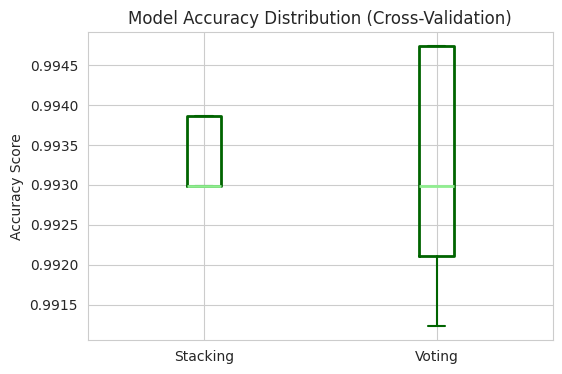

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

# Custom colors for the boxplot
custom_colors = ['#90EE90', '#006400']

# Perform 5-fold cross-validation
stacking_scores = cross_val_score(stacking_model, X_train, y_train, cv=5, scoring='accuracy')
voting_scores = cross_val_score(voting_model, X_train, y_train, cv=5, scoring='accuracy')

# Boxplot comparison
plt.figure(figsize=(6, 4))
boxprops = dict(color=custom_colors[1], linewidth=2)  # Color and thickness for the box lines
medianprops = dict(color=custom_colors[0], linewidth=2)  # Color and thickness for the median line
whiskerprops = dict(color=custom_colors[1], linewidth=1.5)  # Whisker line color
capprops = dict(color=custom_colors[1], linewidth=1.5)  # Cap line color

plt.boxplot(
    [stacking_scores, voting_scores],
    labels=['Stacking', 'Voting'],
    boxprops=boxprops,
    medianprops=medianprops,
    whiskerprops=whiskerprops,
    capprops=capprops
)

plt.ylabel("Accuracy Score")
plt.title("Model Accuracy Distribution (Cross-Validation)")
plt.show()

**Key observations from this graph:-**

Both methods achieve very high accuracy scores, with all values above 0.991 (or 99.1%).

**For the Stacking method:**

The median accuracy (orange line) is around 0.993
It has a smaller interquartile range (height of the box)
The overall range from minimum to maximum is narrower


**For the Voting method:**

The median accuracy is also around 0.993
It has a larger interquartile range, indicating more variability in performance
The overall range from minimum to maximum is wider, with a lower minimum value of approximately 0.9913


**Comparison insights:-**

Both methods have similar median performance
Stacking appears more consistent (less variance in accuracy scores)
Voting shows more variable performance across cross-validation folds
Voting has a slightly higher maximum value, but also a lower minimum

This suggests that while both ensemble methods perform exceptionally well, the Stacking approach might be preferable if consistency across different data subsets is important, whereas Voting might occasionally produce slightly better results but with less reliability





**Stacking model for churn prediction for these reasons:-**

1.   **Consistency is critical for churn prediction** -
The
Stacking model shows less variability across cross-validation folds, which means it's likely to perform more reliably across different customer segments and time periods.

2.   **Risk management** - When predicting churn, false negatives (missing customers who will actually churn) can be very costly. The Stacking model's narrower distribution and higher minimum accuracy suggests it's less likely to have significant performance drops.

3. **Operational implementation** - For churn prediction that feeds into business processes (like targeting retention campaigns), consistent model performance makes resource allocation and campaign planning more reliable.

4. **Similar median performance** - Since both models have nearly identical median accuracy (~0.993), you're not sacrificing typical performance by choosing the more consistent model.

While the Voting model occasionally reaches slightly higher maximum accuracy, the stability of the Stacking model is generally more valuable for ongoing churn prediction systems, especially if you'll be using this model to inform business decisions and customer interventions.

#### **9. Diving Deeper into Stacked Ensemble Model**

###### **9.1 Weight Analysis: Base Model Contribution**

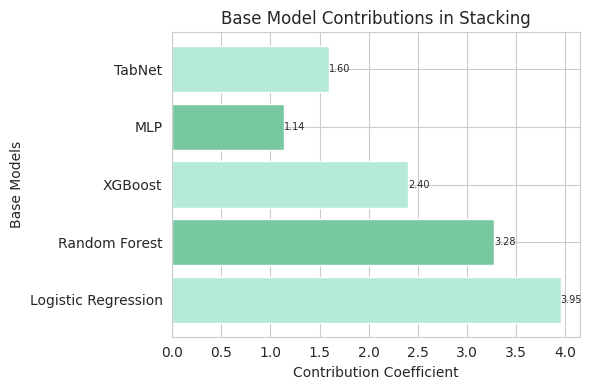

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Custom pastel color palette
custom_colors = ['#B5EAD7', '#77C8A1']  # Light pastel green and soft green

# Extract meta-model coefficients
meta_coefficients = stacking_model.final_estimator_.coef_.flatten()
model_names = ['Logistic Regression', 'Random Forest', 'XGBoost', 'MLP', 'TabNet']

# Plot coefficients
plt.figure(figsize=(6, 4))

# Set the color of each bar using the custom color palette
colors = [custom_colors[i % len(custom_colors)] for i in range(len(model_names))]

bars = plt.barh(model_names, meta_coefficients, color=colors)  # Applying the custom pastel colors

# Add labels on the bars (contribution coefficients)
for bar in bars:
    plt.text(
        bar.get_width(),             # X-coordinate (bar width)
        bar.get_y() + bar.get_height()/2,  # Y-coordinate (bar center)
        f'{bar.get_width():.2f}',    # Text label (formatted to 2 decimal places)
        va='center',                 # Align vertically centered
        ha='left',                   # Align text to the left of the bar (for better readability)
        fontsize=7                  # Font size
    )

plt.xlabel("Contribution Coefficient")
plt.ylabel("Base Models")
plt.title("Base Model Contributions in Stacking")
plt.tight_layout()  # Adjust layout for better display
plt.show()

###### **9.2 SHAP Visualization**

The plot shows features each contributing to push the model output from the base value (the average model output over the training dataset we passed) to the model output. Features pushing the prediction higher are shown in red, those pushing the prediction lower are in blue.

PermutationExplainer explainer: 101it [02:02,  1.26s/it]


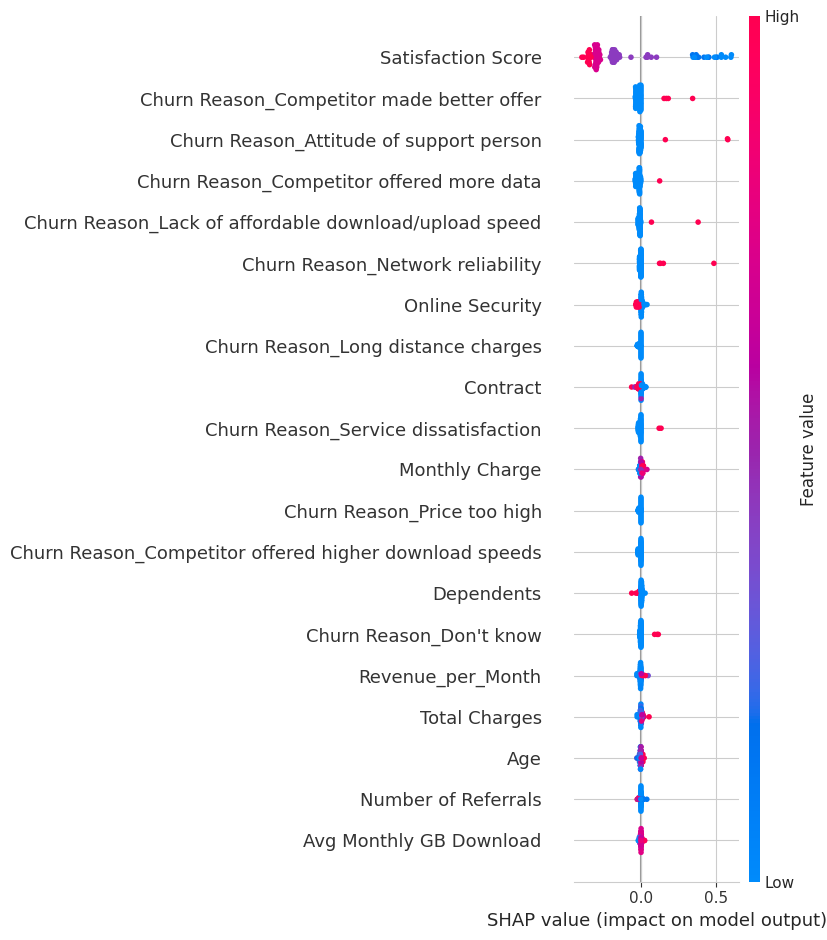

In [ ]:
import shap
import numpy as np

# Convert dataset to NumPy arrays
X_train_np = np.array(X_train_filtered).astype(np.float32)
X_test_np = np.array(X_test_filtered).astype(np.float32)

# Take a small subset of training data for SHAP reference
sample_data = X_train_np[np.random.choice(X_train_np.shape[0], 50, replace=False)]

# Feature names
feature_names = X_train_filtered.columns.tolist()

# Define a prediction function for SHAP
def model_predict(X):
    return stacking_model.predict_proba(X)[:, 1]  # Probability of the positive class

# Initialize SHAP Explainer (TreeExplainer is better for ensemble models)
explainer = shap.Explainer(model_predict, sample_data, feature_names=feature_names)

# Compute SHAP values for 100 test samples (limiting to improve speed)
shap_values = explainer(X_test_np[:100])

# Summary Plot
shap.summary_plot(shap_values, X_test_np[:100], feature_names=feature_names)

###### **9.3 Visualizing ROC & Precision-Recall**

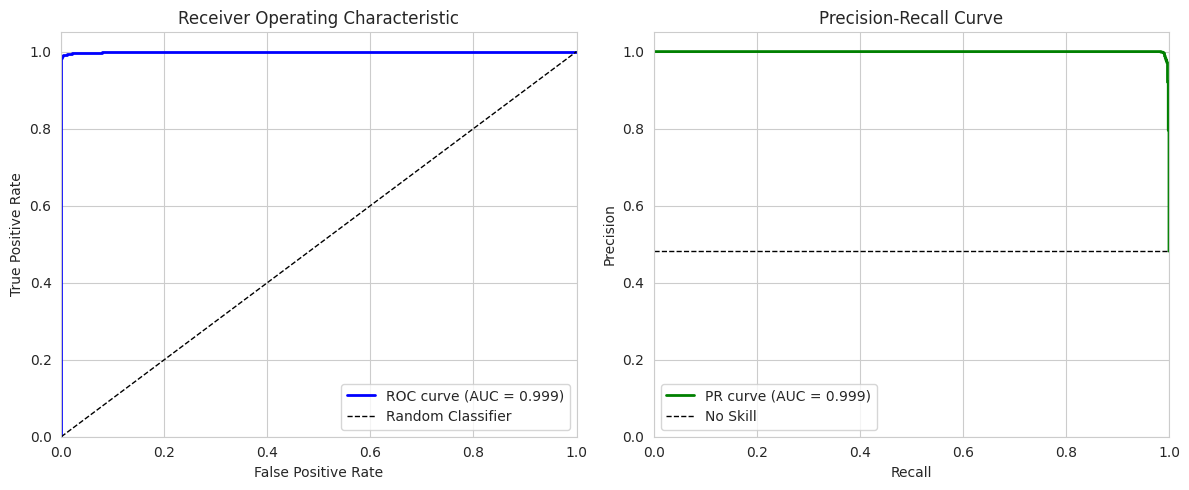

{'roc_auc': 0.9994110614091587, 'pr_auc': 0.999453864660262}

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, precision_recall_curve, auc

def plot_roc_pr_curves(model, X_test, y_test):
    """Plot ROC and Precision-Recall curves for Stacking Model."""

    # Get predicted probabilities from the meta-model
    y_pred_proba = model.predict_proba(X_test)[:, 1]  # Select probability of the positive class

    # Compute ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    # Compute Precision-Recall Curve
    precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
    pr_auc = auc(recall, precision)

    plt.figure(figsize=(12, 5))

    # Plot ROC Curve
    plt.subplot(1, 2, 1)
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
    plt.plot([0, 1], [0, 1], 'k--', lw=1, label='Random Classifier')  # Random baseline
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")

    # Plot Precision-Recall Curve
    plt.subplot(1, 2, 2)
    plt.plot(recall, precision, color='green', lw=2, label=f'PR curve (AUC = {pr_auc:.3f})')
    plt.axhline(y=np.mean(y_test), color='k', linestyle='--', lw=1, label='No Skill')  # Baseline precision
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc="lower left")

    plt.tight_layout()
    plt.show()

    return {'roc_auc': roc_auc, 'pr_auc': pr_auc}

# Call the function with your trained stacking model
plot_roc_pr_curves(stacking_model, X_test, y_test)

###### **9.4 Gradient Analysis on Meta Model of the Stacked Model**

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic

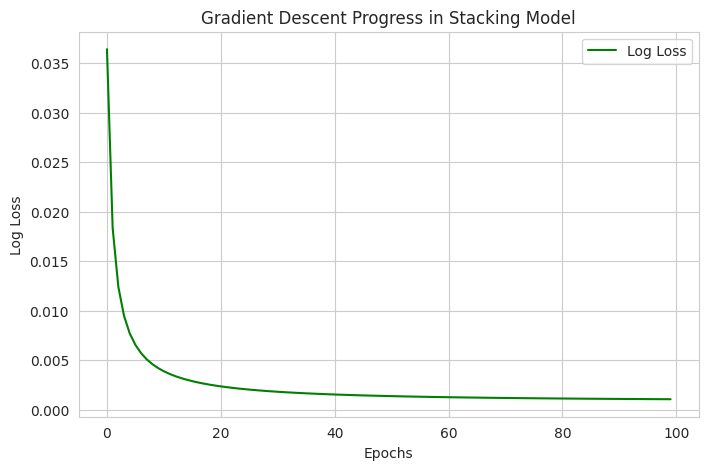

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss

# Convert stacking meta-model to SGD-based Logistic Regression
sgd_meta_model = SGDClassifier(loss="log_loss", max_iter=1, warm_start=True, learning_rate="constant", eta0=0.01)

# Track loss reduction over iterations
loss_history = []

# Train the SGD meta-model manually to capture gradient descent behavior
for epoch in range(100):  # Run for 100 iterations
    sgd_meta_model.fit(stacking_model.transform(X_train), y_train)  # Transform inputs using base models
    y_pred_proba = sgd_meta_model.predict_proba(stacking_model.transform(X_train))[:, 1]  # Probability predictions
    loss = log_loss(y_train, y_pred_proba)  # Compute log loss
    loss_history.append(loss)

# Plot loss reduction over iterations
plt.figure(figsize=(8, 5))
plt.plot(loss_history, label="Log Loss", color='green')
plt.xlabel("Epochs")
plt.ylabel("Log Loss")
plt.title("Gradient Descent Progress in Stacking Model")
plt.legend()
plt.show()